In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unidecode
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
import warnings
warnings.filterwarnings('ignore')

In [37]:
df_2014 = pd.read_csv('dadosCompletos/Dados_completos_2014.csv', index_col=0)
df_2015 = pd.read_csv('dadosCompletos/Dados_completos_2015.csv', index_col=0)
df_2016 = pd.read_csv('dadosCompletos/Dados_completos_2016.csv', index_col=0)
df_2017 = pd.read_csv('dadosCompletos/Dados_completos_2017.csv', index_col=0)
df_2018 = pd.read_csv('dadosCompletos/Dados_completos_2018.csv', index_col=0)

In [38]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018])
df['Time'] =  pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M')
# df = df.drop(['Municipio'], axis=1)

df['Município'] = df['Município'].replace(np.nan, '', regex=True)
df['Bairro'] = df['Bairro'].replace(np.nan, '', regex=True)
df['Logradouro'] = df['Logradouro'].replace(np.nan, '', regex=True)

df['Município'] = df['Município'].map(str.upper)
df['Município'] = df['Município'].map(unidecode.unidecode)

df['Bairro'] = df['Bairro'].map(str.upper)
df['Bairro'] = df['Bairro'].map(unidecode.unidecode)

# df.columns = ['index','Municipio', 'Fato', 'Data', 'Hora', 'Bairro', 'Logradouro', 'Número', 'Marca Veículo', 'Ano Fabricação']
df.columns = ["Ano Fabricação", "Bairro", "CEP", "Endereço", "Estado", "Fato", "index", "Latitude", "Logradouro", "Longitude", "Marca Veículo", "Municipio", "Município", "Número", "País", "Time", "geocode"]

## df['Data'] = pd.to_datetime(df['Data'], format="%Y-%m-%d")
## df['Hora'] = pd.to_datetime(df['Hora'], format="%H:%M")

#df['Data'] = df.Data.dt.strftime('%Y-%m-%d')
#df['Time'] = df['Data'] + ' ' + df['Hora']


#df = df.drop(['Data', 'Hora'], axis=1)
#display(len(df))
# display(len(df[(df['Bairro'] == '') & (df['Município'] == 'PORTO ALEGRE')])/len(df))
# display(df[(df['Bairro'] == '') & (df['Município'] == 'PORTO ALEGRE')])

# display(df[(df['Endereço'].str.contains('GRAVATAI'))&(df['Município']=='PORTO ALEGRE')])

#discard ocurrences that google not found properly
df = df[df['Municipio'] == df['Município']]
# display(len(df[df['Municipio'] != df['Município']])/len(df))

# display(df[df['Municipio'] != df['Município']])
display(df.head())

,Ano Fabricação,Bairro,CEP,Endereço,Estado,Fato,index,Latitude,Logradouro,Longitude,Marca Veículo,Municipio,Município,Número,País,Time,geocode
0,2007,,NaN,ACEGUA RS SN ACEGUA Brasil,Cerro Largo Department,Furto,1,-31.871147,ACEGUA RS,-54.162197,HONDA/CG 125 FAN,ACEGUA,ACEGUA,SN,Uruguay,2014-09-21 01:00:00,[{'address_components': [{'long_name': 'Aceguá...
1,1995,,99965-000,PINHEIRINHOS AGUA SANTA Brasil,Rio Grande do Sul,Furto,2,-28.259109,PINHEIRINHOS,-52.100731,GM/S10,AGUA SANTA,AGUA SANTA,,Brazil,2014-12-02 21:00:00,[{'address_components': [{'long_name': 'Santo ...
2,2013,,99965-000,RUA JOAO FAEDO 521 CENTRO AGUA SANTA Brasil,Rio Grande do Sul,Roubo,3,-28.180732,RUA JOAO FAEDO,-52.036750,VW/NOVA SAVEIRO CE,AGUA SANTA,AGUA SANTA,521,Brazil,2014-07-25 23:30:00,[{'address_components': [{'long_name': 'Rua Jo...
3,2013,,99965-000,RUA JOAO FAEDO 521 CENTRO AGUA SANTA Brasil,Rio Grande do Sul,Roubo,4,-28.180732,RUA JOAO FAEDO,-52.036750,VW/NOVA SAVEIRO CE,AGUA SANTA,AGUA SANTA,521,Brazil,2014-07-25 23:30:00,[{'address_components': [{'long_name': 'Rua Jo...
4,2003,,99965-000,SANTO ANTONIO PINHEIRINHOS AGUA SANTA ...,Rio Grande do Sul,Furto,5,-28.259109,SANTO ANTONIO PINHEIRINHOS,-52.100731,HONDA/NXR150 BROS ESD,AGUA SANTA,AGUA SANTA,,Brazil,2014-11-14 17:00:00,[{'address_components': [{'long_name': 'Santo ...


## Dados por Região

In [39]:
#Ocorrências de Porto Alegre
POA = df[df['Municipio'] == 'PORTO ALEGRE']

#Ocorrências Região Metropolitana
RMP_cidades = ['ALVORADA', 'ARARICÁ', 'ARROIO DOS RATOS', 'CACHOEIRINHA', 'CAMPO BOM', 'CANOAS', 'CAPELA DE SANTANA', 'CHARQUEADAS', 'DOIS IRMÃOS', 'ELDORADO DO SUL', 'ESTEIO','ESTÂNCIA VELHA', 'GLORINHA', \
'GRAVATAÍ', 'GUAÍBA', 'IGREJINHA', 'IVOTI', 'MONTENEGRO', 'NOVA HARTZ', 'NOVA SANTA RITA', 'NOVO HAMBURGO', 'PAROBÉ', 'PORTÃO', 'ROLANTE', 'SANTO ANTÔNIO DA PATRULHA', 'SAPIRANGA', 'SAPUCAIA DO SUL',\
'SÃO JERÔNIMO', 'SÃO LEOPOLDO', 'SÃO SEBASTIÃO DO CAÍ', 'TAQUARA', 'TRIUNFO', 'VIAMÃO']

RMP_cidades = list(map(lambda x: unidecode.unidecode(x), RMP_cidades))
RMP = df[df['Municipio'].isin(RMP_cidades)]

Interior = df[(~df['Municipio'].isin(RMP_cidades)) & (df['Municipio'] != 'PORTO ALEGRE')]

POA['year'] = POA['Time'].dt.year
RMP['year'] = RMP['Time'].dt.year
Interior['year'] = Interior['Time'].dt.year

## Dados por Categoria

In [40]:
Motos = df[((df['Marca Veículo'].str.contains('HONDA')) & ~ ((df['Marca Veículo'].str.contains('CITY')) | df['Marca Veículo'].str.contains('CIVIC') \
                 | df['Marca Veículo'].str.contains('CR-V')  | df['Marca Veículo'].str.contains('FIT')  | df['Marca Veículo'].str.contains('ACCORD') \
                 | df['Marca Veículo'].str.contains('HR-V')  | df['Marca Veículo'].str.contains('WR-V') )) \
                 | (df['Marca Veículo'].str.contains('YAMAHA')) \
                 | (df['Marca Veículo'].str.contains('TITAN')) \
                 | (df['Marca Veículo'].str.contains('SUNDOWN')) \
                 | (df['Marca Veículo'].str.contains('TRAXX')) \
                 | (df['Marca Veículo'].str.contains('WUYANG')) \
                 | (df['Marca Veículo'].str.contains('DAYANG')) \
                 | (df['Marca Veículo'].str.contains('FYM')) \
                 | (df['Marca Veículo'].str.contains('KASINSKI')) \
                 | ((df['Marca Veículo'].str.contains('SHINERAY')) & ~ (df['Marca Veículo'].str.contains('DTRUCK')) )\
                 | (df['Marca Veículo'].str.contains('XINLING')) \
                 | (df['Marca Veículo'].str.contains('DAELIM')) \
                 | (df['Marca Veículo'].str.contains('IROS')) \
                 | (df['Marca Veículo'].str.contains('KAWASAKI')) \
                 | (df['Marca Veículo'].str.contains('KTM/200 DUKE')) \
                 | (df['Marca Veículo'].str.contains('JTZ/DK150C')) \
                 | (df['Marca Veículo'].str.contains('HARLEY DAVIDSON')) \
                 | (df['Marca Veículo'].str.contains('HYOSUNG')) \
                 | (df['Marca Veículo'].str.contains('KIN MOTORS/EL')) \
                 | (df['Marca Veículo'].str.contains('DUCATI 1198'))\
                 | (df['Marca Veículo'].str.contains('TRIUMPH/')) \
                 | (df['Marca Veículo'].str.contains('DAFRA/')) \
                 | (df['Marca Veículo'].str.contains('DAYUN')) \
                 | (df['Marca Veículo'].str.contains('AGRALE/')) \
                 | (df['Marca Veículo'].str.contains('BRAMONT')) \
                 | (df['Marca Veículo'].str.contains('BMW/F')) \
                 | (df['Marca Veículo'].str.contains('BMW S1000')) \
                 | (df['Marca Veículo'].str.contains('BMW K')) \
                 | (df['Marca Veículo'].str.contains('BMW R')) \
                 | (df['Marca Veículo'].str.contains('BMW/R')) \
                 | (df['Marca Veículo'].str.contains('BMW/S')) \
                 | (df['Marca Veículo'].str.contains('KTM/')) \
                 | (df['Marca Veículo'].str.contains('IMP/PGO')) \
                 | (df['Marca Veículo'].str.contains('ZONGSHEN')) \
                 | (df['Marca Veículo'].str.contains('HAOBAO')) \
                 | (df['Marca Veículo'].str.contains('FBM/')) \
                 | (df['Marca Veículo'].str.contains('AVA/')) \
                 | (df['Marca Veículo'].str.contains('WINNER FAIR')) \
                 | (df['Marca Veículo'].str.contains('MV AGUSTA/')) \
                 | (df['Marca Veículo'].str.contains('DAVIDSON')) \
                 | (df['Marca Veículo'].str.contains('SC/')) \
                 | (df['Marca Veículo'].str.contains('F.SILVA/F.PROPRIA MOTO')) \
                 | ( (df['Marca Veículo'].str.contains('SUZUKI')) & ~ ((df['Marca Veículo'].str.contains('VITARA')) | (df['Marca Veículo'].str.contains('SX4')) ))]

# display(Motos['Marca Veículo'].unique())

#Caminhoes e Onibus
Caminhoes = df[ (df['Marca Veículo'].str.contains('SCANIA')) \
               | (df['Marca Veículo'].str.contains('CHANA')) \
               | (df['Marca Veículo'].str.contains('MAN/')) \
               | (df['Marca Veículo'].str.contains('IVECO')) \
               | (df['Marca Veículo'].str.contains('FORD/F4')) \
               | (df['Marca Veículo'].str.contains('FORD/F2000')) \
               | (df['Marca Veículo'].str.contains('FORD/F14000')) \
               | (df['Marca Veículo'].str.contains('VW/BMB 24.250')) \
               |( (df['Marca Veículo'].str.contains('M.BENZ/'))\
                 & ~(df['Marca Veículo'].str.contains('C250')) \
                 & ~(df['Marca Veículo'].str.contains('A 160')) \
                 & ~(df['Marca Veículo'].str.contains('A 190')) ) \
               | (df['Marca Veículo'].str.contains('HAFEI RUIYI PICKUP')) \
               | (df['Marca Veículo'].str.contains('FORD/CARGO')) \
               | (df['Marca Veículo'].str.contains('FORD/C2')) \
               | (df['Marca Veículo'].str.contains('FORD/7000')) \
               | (df['Marca Veículo'].str.contains('FORD/F600')) \
               | (df['Marca Veículo'].str.contains('HYUNDAI HR HDLWBSC')) \
               | (df['Marca Veículo'].str.contains('HYUNDAI/HR HDB')) \
               | (df['Marca Veículo'].str.contains('HYUNDAI/HD 78')) \
               | (df['Marca Veículo'].str.contains('HYUNDAI/HR LDB')) \
               | (df['Marca Veículo'].str.contains('VOLVO/FH')) \
               | (df['Marca Veículo'].str.contains('VOLVO/N')) \
               | (df['Marca Veículo'].str.contains('VOLVO/VM')) \
               | (df['Marca Veículo'].str.contains('VOLVO/FM 370 4X2T')) \
               | (df['Marca Veículo'].str.contains('HAFEI START PICK UP L')) \
               | (df['Marca Veículo'].str.contains('N12 INTERCOOLER II')) \
               | (df['Marca Veículo'].str.contains('6X4')) \
               | (df['Marca Veículo'].str.contains('6x4')) \
               |  (df['Marca Veículo'].str.contains('FORD/1')) \
               |  (df['Marca Veículo'].str.contains('GMC')) \
               |  (df['Marca Veículo'].str.contains('VOLVO/B')) \
               |  (df['Marca Veículo'].str.contains('VOLVO/FM12 340 4X2T')) \
               |  (df['Marca Veículo'].str.contains('KIA K2')) \
               |  (df['Marca Veículo'].str.contains('KIA UK')) \
               |  (df['Marca Veículo'].str.contains('FORD/F1200')) \
               |  (df['Marca Veículo'].str.contains('IMP/M.BENZ OF 1620')) \
               |  (df['Marca Veículo'].str.contains('MPOLO/VOLARE')) \
               |  (df['Marca Veículo'].str.contains('I/JMC')) \
               |  (df['Marca Veículo'].str.contains('ITAPEMIRIM/')) \
               |  (df['Marca Veículo'].str.contains('FOTON')) \
               |  (df['Marca Veículo'].str.contains('VW/1')) \
               |  (df['Marca Veículo'].str.contains('VW/2')) \
               |  (df['Marca Veículo'].str.contains('VW/3')) \
               |  (df['Marca Veículo'].str.contains('VW/4')) \
               |  (df['Marca Veículo'].str.contains('VW/5')) \
               |  (df['Marca Veículo'].str.contains('VW/6')) \
               |  (df['Marca Veículo'].str.contains('VW/7')) \
               |  (df['Marca Veículo'].str.contains('VW/8')) \
               |  (df['Marca Veículo'].str.contains('VW/9')) \
               |  (df['Marca Veículo'].str.contains('8x2')) \
               |  (df['Marca Veículo'].str.contains('8X2')) \
               |  (df['Marca Veículo'].str.contains('FORD F4000')) \
               |  (df['Marca Veículo'].str.contains('8x4')) \
               |  (df['Marca Veículo'].str.contains('8X4')) \
               |  (df['Marca Veículo'].str.contains('MARCO M.BUS')) \
               |  (df['Marca Veículo'].str.contains('MOTOR-CASA/ONIBUS')) \
               |  (df['Marca Veículo'].str.contains('MPOLO/')) \
               |  (df['Marca Veículo'].str.contains('SINOTRUK')) \
               |  (df['Marca Veículo'].str.contains('VIAGGIO')) \
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET 11000')) \
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET 13000')) \
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET 12000 CUSTO'))\
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET 14000 CUSTO'))\
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET D65'))\
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET D60'))\
               |  (df['Marca Veículo'].str.contains('VOLKS/COMIL SVELTO U'))\
               |  (df['Marca Veículo'].str.contains('VW/INDUSCAR MIL U OT'))\
               |  (df['Marca Veículo'].str.contains('VW/CHAPEMEC TRATOR'))\
               |  (df['Marca Veículo'].str.contains('CHEVROLET C65'))\
               |  (df['Marca Veículo'].str.contains('GM/CHEVROLET 60'))\
               |  (df['Marca Veículo'].str.contains('FIAT/70'))\
               |  (df['Marca Veículo'].str.contains('FIAT/80'))\
               |  (df['Marca Veículo'].str.contains('FIAT/120'))\
               |  (df['Marca Veículo'].str.contains('FIAT/140'))\
               |  (df['Marca Veículo'].str.contains(' FIAT/FNM 180'))\
               |  (df['Marca Veículo'].str.contains('XF105')) \
               |  (df['Marca Veículo'].str.contains('MARCOPOLO/')) \
               |  (df['Marca Veículo'].str.contains('GM/6000 CUSTOM')) \
               | ((df['Marca Veículo'].str.contains('SHINERAY')) & (df['Marca Veículo'].str.contains('DTRUCK')) )]

#Máquina Agricola, Reboques, Cases, Prototipos
Outros = df[(df['Marca Veículo'].str.contains('REB/TOSIN')) \
               | (df['Marca Veículo'].str.contains('R/ISIDOC CIA 501')) \
               | (df['Marca Veículo'].str.contains('M.A./CASE')) \
               | (df['Marca Veículo'].str.contains('REB/M.AMARAL AMB 1E')) \
               | (df['Marca Veículo'].str.contains('REB/REK CM2')) \
               | (df['Marca Veículo'].str.contains('REB/SML 0125')) \
               | (df['Marca Veículo'].str.contains('R/FEDERAL JET')) \
               | (df['Marca Veículo'].str.contains('RANDON/RK')) \
               | (df['Marca Veículo'].str.contains('REB/RANDON')) \
               | (df['Marca Veículo'].str.contains('REB/REBOQUE'))\
               | (df['Marca Veículo'].str.contains('REB/REBOX RBX-CS')) \
               | (df['Marca Veículo'].str.contains('MO/')) \
               | (df['Marca Veículo'].str.contains('REB/')) \
               | (df['Marca Veículo'].str.contains('CASE/')) \
               | (df['Marca Veículo'].str.contains('M.A./')) \
               | (df['Marca Veículo'].str.contains('MON/PROTOTIPO')) \
               | (df['Marca Veículo'].str.contains('MOTOR-CASA/CAMINHONETE')) \
               | (df['Marca Veículo'].str.contains('MOTOR-CASA/CAMINHAO')) \
               | (df['Marca Veículo'].str.contains('M.A./RANDON')) \
               | ( (df['Marca Veículo'].str.contains('R/')) \
                  & ~(df['Marca Veículo'].str.contains('EVOQUE')) \
                  & ~(df['Marca Veículo'].str.contains('TROLLER')) \
                  & ~(df['Marca Veículo'].str.contains('DODGE'))\
                  & ~(df['Marca Veículo'].str.contains('LROVER/'))\
                  & ~(df['Marca Veículo'].str.contains('LR/'))) \
               | (df['Marca Veículo'].str.contains('SR/'))]


Carros = df[(~df['index'].isin(Motos['index'])) \
           & (~df['index'].isin(Caminhoes['index'])) \
           & (~df['index'].isin(Outros['index']))]
# # Carros = df[~df['index'].isin(df['index'])]
# display(Caminhoes['Marca Veículo'].unique())
# display(Outros['Marca Veículo'].unique())
# # display(Motos)
# for marca in Carros['Marca Veículo'].unique():
#       print("%s\n" % marca)

display(Carros.head())

,Ano Fabricação,Bairro,CEP,Endereço,Estado,Fato,index,Latitude,Logradouro,Longitude,Marca Veículo,Municipio,Município,Número,País,Time,geocode
1,1995,,99965-000,PINHEIRINHOS AGUA SANTA Brasil,Rio Grande do Sul,Furto,2,-28.259109,PINHEIRINHOS,-52.100731,GM/S10,AGUA SANTA,AGUA SANTA,,Brazil,2014-12-02 21:00:00,[{'address_components': [{'long_name': 'Santo ...
2,2013,,99965-000,RUA JOAO FAEDO 521 CENTRO AGUA SANTA Brasil,Rio Grande do Sul,Roubo,3,-28.180732,RUA JOAO FAEDO,-52.036750,VW/NOVA SAVEIRO CE,AGUA SANTA,AGUA SANTA,521,Brazil,2014-07-25 23:30:00,[{'address_components': [{'long_name': 'Rua Jo...
3,2013,,99965-000,RUA JOAO FAEDO 521 CENTRO AGUA SANTA Brasil,Rio Grande do Sul,Roubo,4,-28.180732,RUA JOAO FAEDO,-52.036750,VW/NOVA SAVEIRO CE,AGUA SANTA,AGUA SANTA,521,Brazil,2014-07-25 23:30:00,[{'address_components': [{'long_name': 'Rua Jo...
5,1986,,98750-000,RUA CASSIANO ALEGRETTE 778 AJURICABA Brasil,Rio Grande do Sul,Furto,6,-28.238369,RUA CASSIANO ALEGRETTE,-53.767641,FORD/DEL REY ESCALA GLX,AJURICABA,AJURICABA,778,Brazil,2014-02-28 18:30:00,"[{'address_components': [{'long_name': '778', ..."
6,1981,,NaN,AJURICABA RS AJURICABA Brasil,State of Rio Grande do Sul,Furto,7,-28.241291,AJURICABA RS,-53.770660,FORD/DEL REY,AJURICABA,AJURICABA,,Brazil,2014-11-01 20:00:00,[{'address_components': [{'long_name': 'Ajuric...


In [41]:
def autolabel(rects, number):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax[number].text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

# Análises com números total de ocorrências'

In [42]:
#Ocorrências por Municipio
FreqMunicipio = df.Municipio.value_counts()
Municipio = FreqMunicipio.to_frame(name='Ocorrencias')
Municipio['Freq'] = Municipio['Ocorrencias']/(1.0*Municipio['Ocorrencias'].sum())
Municipio['Cum_Freq'] = Municipio['Freq'].cumsum()
# display(Municipio)

,Ocorrencias,Freq,Cum_Freq
index,,,
PORTO ALEGRE,58555,0.333369,0.333369
CAXIAS DO SUL,15445,0.087933,0.421302
NOVO HAMBURGO,8765,0.049902,0.471203
CANOAS,8460,0.048165,0.519369
SAO LEOPOLDO,6837,0.038925,0.558293
VIAMAO,5746,0.032714,0.591007
GRAVATAI,5280,0.030060,0.621067
ALVORADA,4853,0.027629,0.648697
PASSO FUNDO,4731,0.026935,0.675632


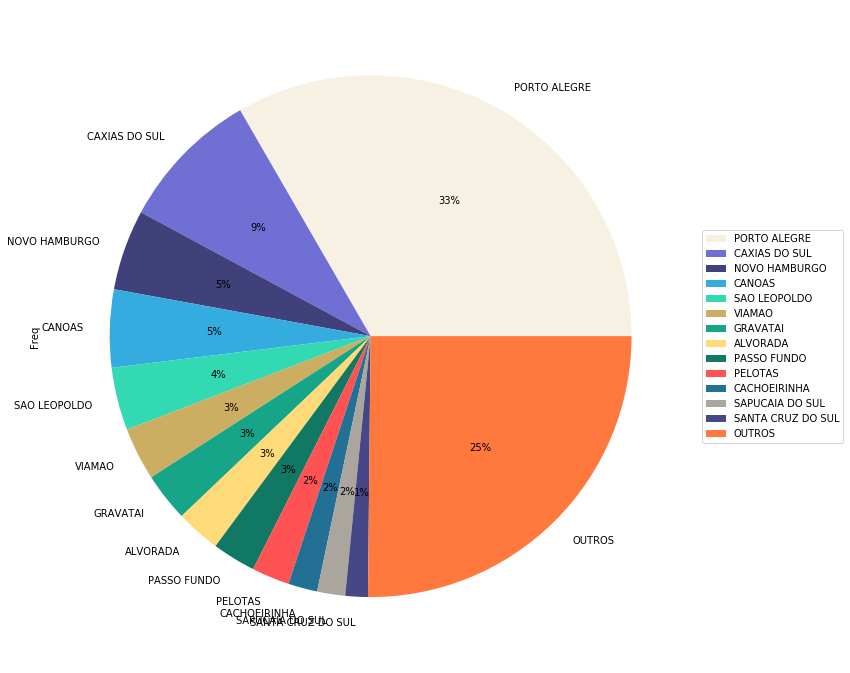

In [43]:
#Aggregate all occurrences after 70% cumulative frequency
Municipio_pie = Municipio[Municipio['Cum_Freq']<0.75]
Outros_Pie = Municipio[Municipio['Cum_Freq']>=0.75]
#display(Outros['Ocorrencias'].sum())

#Pie plot for frequency of ocurrences
Municipio_pie=Municipio_pie.reset_index()
Municipio_pie=Municipio_pie.append({'index':'OUTROS','Ocorrencias':Outros_Pie['Ocorrencias'].sum(), 'Freq':Outros_Pie['Freq'].sum(), 'Cum_Freq':1 - Municipio_pie.loc[Municipio_pie.index[-1], 'Cum_Freq']}, ignore_index=True)
Municipio_pie = Municipio_pie.set_index('index')
display(Municipio_pie)
colors = ['#f7f1e3', '#706fd3', '#40407a', '#34ace0', '#33d9b2', '#ccae62', '#17a589',
          '#ffda79', '#117864', '#ff5252', '#227093', '#aaa69d','#474787', '#ff793f']


plot = Municipio_pie.plot.pie(y='Freq', figsize=(12, 12), colors = colors, autopct='%1.0f%%')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# print(type(plot))
fig = plot.get_figure()
fig.savefig("Graficos/Municipio_Ocorrencias_PieChart.png",bbox_inches="tight")

In [44]:
# num_bars = len(Tipo)
# index = np.arange(num_bars)
# idx = 0

# # this is for plotting purpose
# index = np.arange(len(Tipo))
# colors = ['#ec7063', '#5dade2']

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.bar(index, Tipo['Freq'],color=colors)
# plt.xlabel('Tipo da Ocorrência', fontsize=10)
# plt.ylabel('Perc. of Total', fontsize=10)
# plt.xticks(index, Tipo.index, fontsize=10, rotation=30)

# # for i, v in enumerate(Tipo.index):
# #     plt.text(i-.25, 
# #               v/Tipo.loc[i,'Freq']+100, 
# #               Tipo.index[i], 
# #               fontsize=18, 
# #               color=colors[i])
    
# #     plt.title('Market Share for Each Genre 1995-2017')
# plt.show()

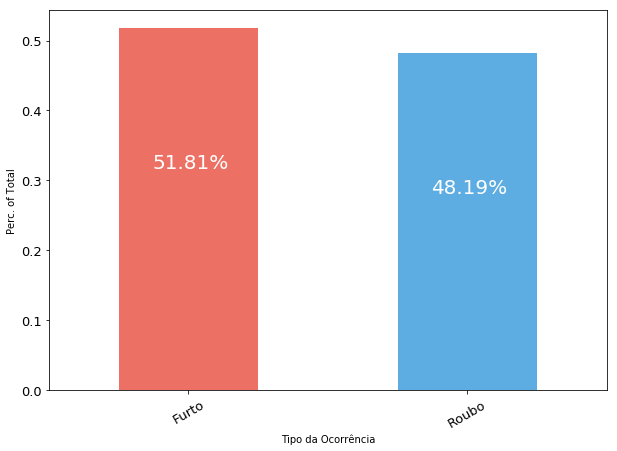

In [45]:
# #Frequencia por tipo de ocorrência
FreqTipo = df.Fato.value_counts()
Tipo = FreqTipo.to_frame(name='Ocorrencias')
Tipo['Freq'] = Tipo['Ocorrencias']/(1.0*Tipo['Ocorrencias'].sum())

fig = plt.figure()
colors = ['#ec7063', '#5dade2']
ax = Tipo['Freq'].plot(kind='bar', figsize=(10,7), color=colors, fontsize=13);
ax.set_alpha(0.8)
ax.set_xticklabels(Tipo.index, rotation=30)
ax.set_ylabel("Perc. of Total")
ax.set_xlabel("Tipo da Ocorrência")
# ax.set_yticks([0, 5, 10, 15, 20,])
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-0.2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=20, color='white')

fig.savefig('Graficos/Tipo_Ocorrencias_barChart.png',dpi=400)

In [46]:
#Annual time series occurrences
Roubo  = df[df['Fato'] == 'Roubo']
Furto  = df[df['Fato'] == 'Furto']

Roubo['Hora'] = Roubo['Time'].dt.hour
Furto['Hora'] = Furto['Time'].dt.hour

# display(Roubo)
def year_series(my_df):
    my_df['year'] = my_df['Time'].dt.year
    return my_df.year.value_counts()

Roubo_year = year_series(Roubo)
Furto_year = year_series(Furto)

Roubo_year = Roubo_year.to_frame('Roubo').sort_index()
Furto_year = Furto_year.to_frame('Furto').sort_index()
display(Furto_year)

,Furto
2014,18773
2015,20441
2016,19887
2017,17230
2018,14663


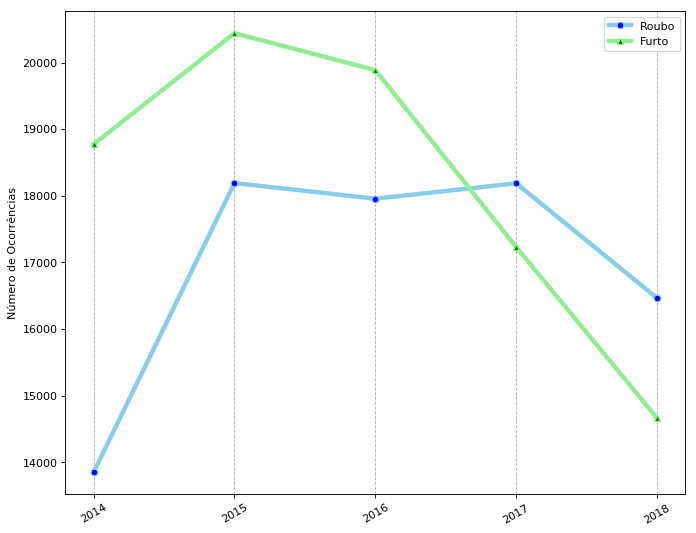

In [47]:
#Plot Graph
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('Roubo', data = Roubo_year, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot('Furto', data = Furto_year, marker='^', markerfacecolor='green', color='lightgreen', linewidth=4)
plt.ylabel('Número de Ocorrências')
plt.xticks(Roubo_year.index, fontsize=10, rotation=30)
ax = plt.gca()
# ax.xaxis.grid(True)
ax.grid(which='major', axis='x', linestyle='--')
plt.legend()
plt.savefig("Graficos/Tipo_Ocorrência_Ano.png")

(array([0.02682286, 0.01922962, 0.01171035, 0.00939293, 0.00792606,
        0.00959016, 0.01580281, 0.0311865 , 0.03384907, 0.0335409 ,
        0.03436679, 0.03386139, 0.03134675, 0.03269036, 0.03875509,
        0.04649624, 0.0522528 , 0.05586452, 0.06406176, 0.09402793,
        0.10799406, 0.10824059, 0.08659494, 0.05787377]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

(array([0.04689081, 0.04042311, 0.035515  , 0.03339351, 0.02710929,
        0.02064159, 0.02115763, 0.03224675, 0.03834749, 0.0350907 ,
        0.04281983, 0.04205151, 0.05781939, 0.04296891, 0.04554911,
        0.04831279, 0.04693668, 0.04515921, 0.05401216, 0.06219999,
        0.06307153, 0.0548837 , 0.05548001, 0.05139756]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

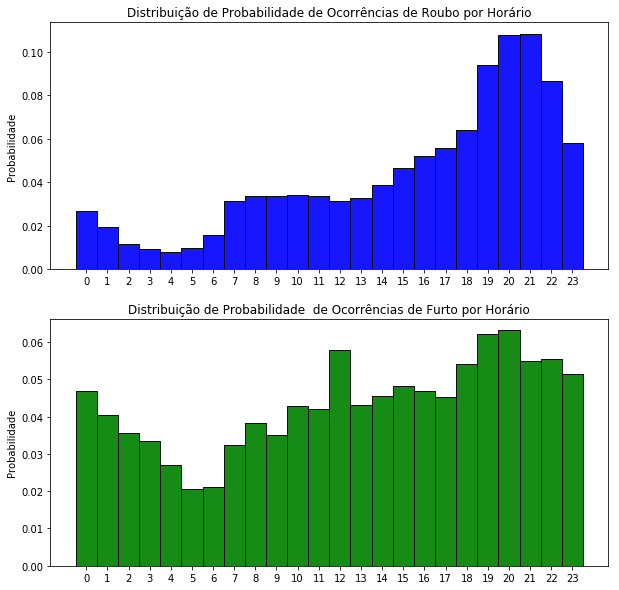

In [48]:

#Histograma dos ocorrências por horário
#display(np.arange(0,24))
bins = np.arange(0,24)
bin_w = (max(bins) - min(bins)) / (len(bins))
    
fig, ax = plt.subplots(2, figsize=(10,10))
fig.subplots_adjust(hspace=.2)

ax[0].set(title='Distribuição de Probabilidade de Ocorrências de Roubo por Horário', ylabel = 'Probabilidade')
ax[0].set_xticklabels(np.arange(0,24))
ax[0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
# ax[0].hist(Roubo['Hora'], 24, normed=True, histtype='bar', colors= ['blue'], label=['blue'], alpha=0.70, edgecolor='black')
ax[0].hist(Roubo['Hora'], 24, normed=True, histtype='bar', color= ['blue'], alpha=0.70, edgecolor='black')

ax[1].set(title='Distribuição de Probabilidade  de Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[1].set_xticklabels(np.arange(0,24))
ax[1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1].hist(Furto['Hora'], 24, normed=True, histtype='bar', color= ['green'], label= ['blue'], alpha=0.70, edgecolor='black')
fig.savefig("Graficos/Probabilidade_Ocorrencia_Hora.png")
display(ax[0].hist(Roubo['Hora'], 24, normed=True, histtype='bar', color= ['blue'], alpha=0.70, edgecolor='black'))
display(ax[1].hist(Furto['Hora'], 24, normed=True, histtype='bar', color= ['green'], label= ['blue'], alpha=0.70, edgecolor='black'))

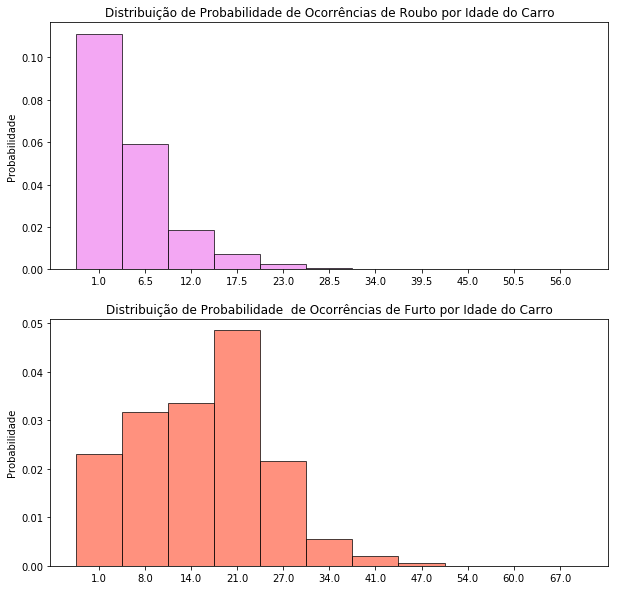

In [49]:
#Histograma Ocorrências por idade do carro
Roubo['Idade'] = Roubo['year'] - Roubo['Ano Fabricação']
Furto['Idade'] = Furto['year'] - Furto['Ano Fabricação']

Roubo_Idade = Roubo['Idade'].loc[(Roubo['Idade']>0) & (Roubo['Idade']<100)] #max 56
Furto_Idade = Furto['Idade'].loc[(Furto['Idade']>0) & (Furto['Idade']<100)] #max 56

max_bins = len(np.histogram_bin_edges(Roubo_Idade))
bins = np.histogram_bin_edges(Roubo_Idade)
bin_w = (max(bins) - min(bins)) / (len(bins))
    
fig, ax = plt.subplots(2, figsize=(10,10))
fig.subplots_adjust(hspace=.2)

ax[0].set(title='Distribuição de Probabilidade de Ocorrências de Roubo por Idade do Carro', ylabel = 'Probabilidade')
ax[0].set_xticklabels(np.histogram_bin_edges(Roubo_Idade))
ax[0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[0].hist(Roubo_Idade, max_bins, normed=True, histtype='bar', color= ['violet'], label=['violet'], alpha=0.70, edgecolor='black')

max_bins = len(np.histogram_bin_edges(Furto_Idade))
bins = np.histogram_bin_edges(Furto_Idade)
bin_w = (max(bins) - min(bins)) / (len(bins))

ax[1].set(title='Distribuição de Probabilidade  de Ocorrências de Furto por Idade do Carro', ylabel = 'Probabilidade')
ax[1].set_xticklabels(np.round(np.histogram_bin_edges(Furto_Idade)))
ax[1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1].hist(Furto_Idade, max_bins, normed=True, histtype='bar', color= ['tomato'], label= ['blue'], alpha=0.70, edgecolor='black');
fig.savefig("Graficos/Idade.png")

# Análise para cidades com mais de 100.000 habitantes

In [50]:
#Lendo as populações de cada município
numHabitantes = pd.read_csv('Population_City_2015.csv', index_col=0)
numHabitantes = numHabitantes.reset_index()
numHabitantes = numHabitantes[numHabitantes['UF']=='RS']
numHabitantes = numHabitantes.set_index('UF')
pd.Series(['f.o', 'fuz', np.nan]).str.replace('f.', 'ba', regex=False)
numHabitantes['POPULAÇÃO ESTIMADA'] = numHabitantes['POPULAÇÃO ESTIMADA'].str.replace(',', '', regex=False)
numHabitantes.loc[numHabitantes['NOME DO MUNICÍPIO'] == 'Jacareacanga', 'POPULAÇÃO ESTIMADA'] = '41487'
numHabitantes['POPULAÇÃO ESTIMADA'] = numHabitantes['POPULAÇÃO ESTIMADA'].map(int)
numHabitantes = numHabitantes.drop(['COD. UF', 'COD. MUNIC'], axis=1)
numHabitantes.columns = ['Município', 'População']
numHabitantes['Município'] = numHabitantes['Município'].map(str.upper)
numHabitantes['Município'] = numHabitantes['Município'].map(unidecode.unidecode)

df2 = pd.merge(Municipio, numHabitantes, how='left', right_on='Município', left_on=Municipio.index)
Municipio = df2
# display(Municipio.head())

In [51]:
#Calculando ocorrências por 100.000 habitantes
Municipio['Ocorrencia_100k'] = 1
Municipio.loc[Municipio['População']>=100000, 'Ocorrencia_100k'] = ((Municipio.loc[Municipio['População']>=100000, 'População'])/100000)
Municipio['Ocorrencia_100k'] = ((Municipio['Ocorrencias']/5) / Municipio['Ocorrencia_100k'])
Municipio_100k = Municipio[Municipio['População']>=100000]
Municipio_100k = Municipio_100k.set_index('Município')
Municipio_100k = Municipio_100k.drop(['Cum_Freq'], axis=1)
Municipio_100k = Municipio_100k.sort_values('Ocorrencia_100k', ascending=False)

#Média ocorrencia anual

#Tempo entre cada ocorrencia
# - 1 Carro roubado a cada 45 minutos
Municipio_100k['Minuto_Ocorrencia'] = 525600*5/Municipio_100k['Ocorrencias']
display(Municipio_100k)

,Ocorrencias,Freq,População,Ocorrencia_100k,Minuto_Ocorrencia
Município,,,,,
PORTO ALEGRE,58555,0.333369,1476867,792.962399,44.880881
NOVO HAMBURGO,8765,0.049902,248694,704.882305,299.828865
CAXIAS DO SUL,15445,0.087933,474853,650.517107,170.152153
SAO LEOPOLDO,6837,0.038925,228370,598.765162,384.379114
CACHOEIRINHA,3170,0.018048,125975,503.274459,829.022082
CANOAS,8460,0.048165,341343,495.689087,310.638298
PASSO FUNDO,4731,0.026935,196739,480.941755,555.485098
ALVORADA,4853,0.027629,206561,469.885409,541.520709
VIAMAO,5746,0.032714,251978,456.071562,457.361643


# Análise por Categoria de Veiculo

## Representatividade das Ocorrências por Categoria

,Ocorrencias,Repres(%)
Categoria,,
Carros,138018,0.785774
Motos,31761,0.180824
Caminhões,4621,0.026309
Outros,1247,0.007100


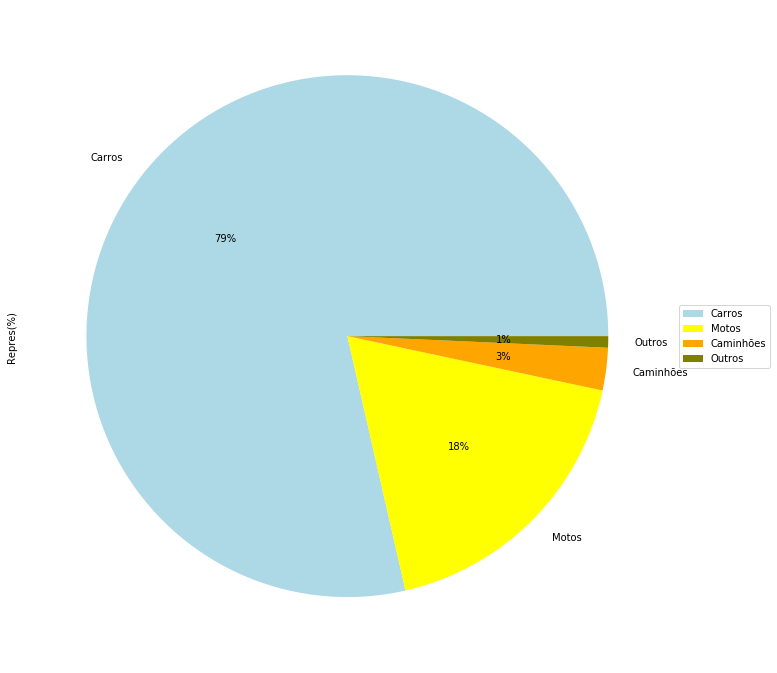

In [52]:
categoria_list = [{'Categoria':'Carros', 'Ocorrencias': len(Carros), 'Repres(%)':len(Carros)/len(df)}]
categoria_list.append({'Categoria':'Motos', 'Ocorrencias': len(Motos), 'Repres(%)':len(Motos)/len(df)})
categoria_list.append({'Categoria':'Caminhões', 'Ocorrencias': len(Caminhoes), 'Repres(%)':len(Caminhoes)/len(df)})
categoria_list.append({'Categoria':'Outros', 'Ocorrencias': len(Outros), 'Repres(%)':len(Outros)/len(df)})
Categoria_pie=pd.DataFrame(categoria_list)
Categoria_pie=Categoria_pie.set_index('Categoria')
display(Categoria_pie)

plot = Categoria_pie.plot.pie(y='Repres(%)', figsize=(12, 12), colors = ['lightblue', 'yellow', 'orange', 'olive'], autopct='%1.0f%%')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# print(type(plot))
fig = plot.get_figure()
fig.savefig("Graficos/Categoria_Ocorrencias_PieChart.png",bbox_inches="tight")

## Histograma de Roubo e Furto por Hora por Categoria do Veículo

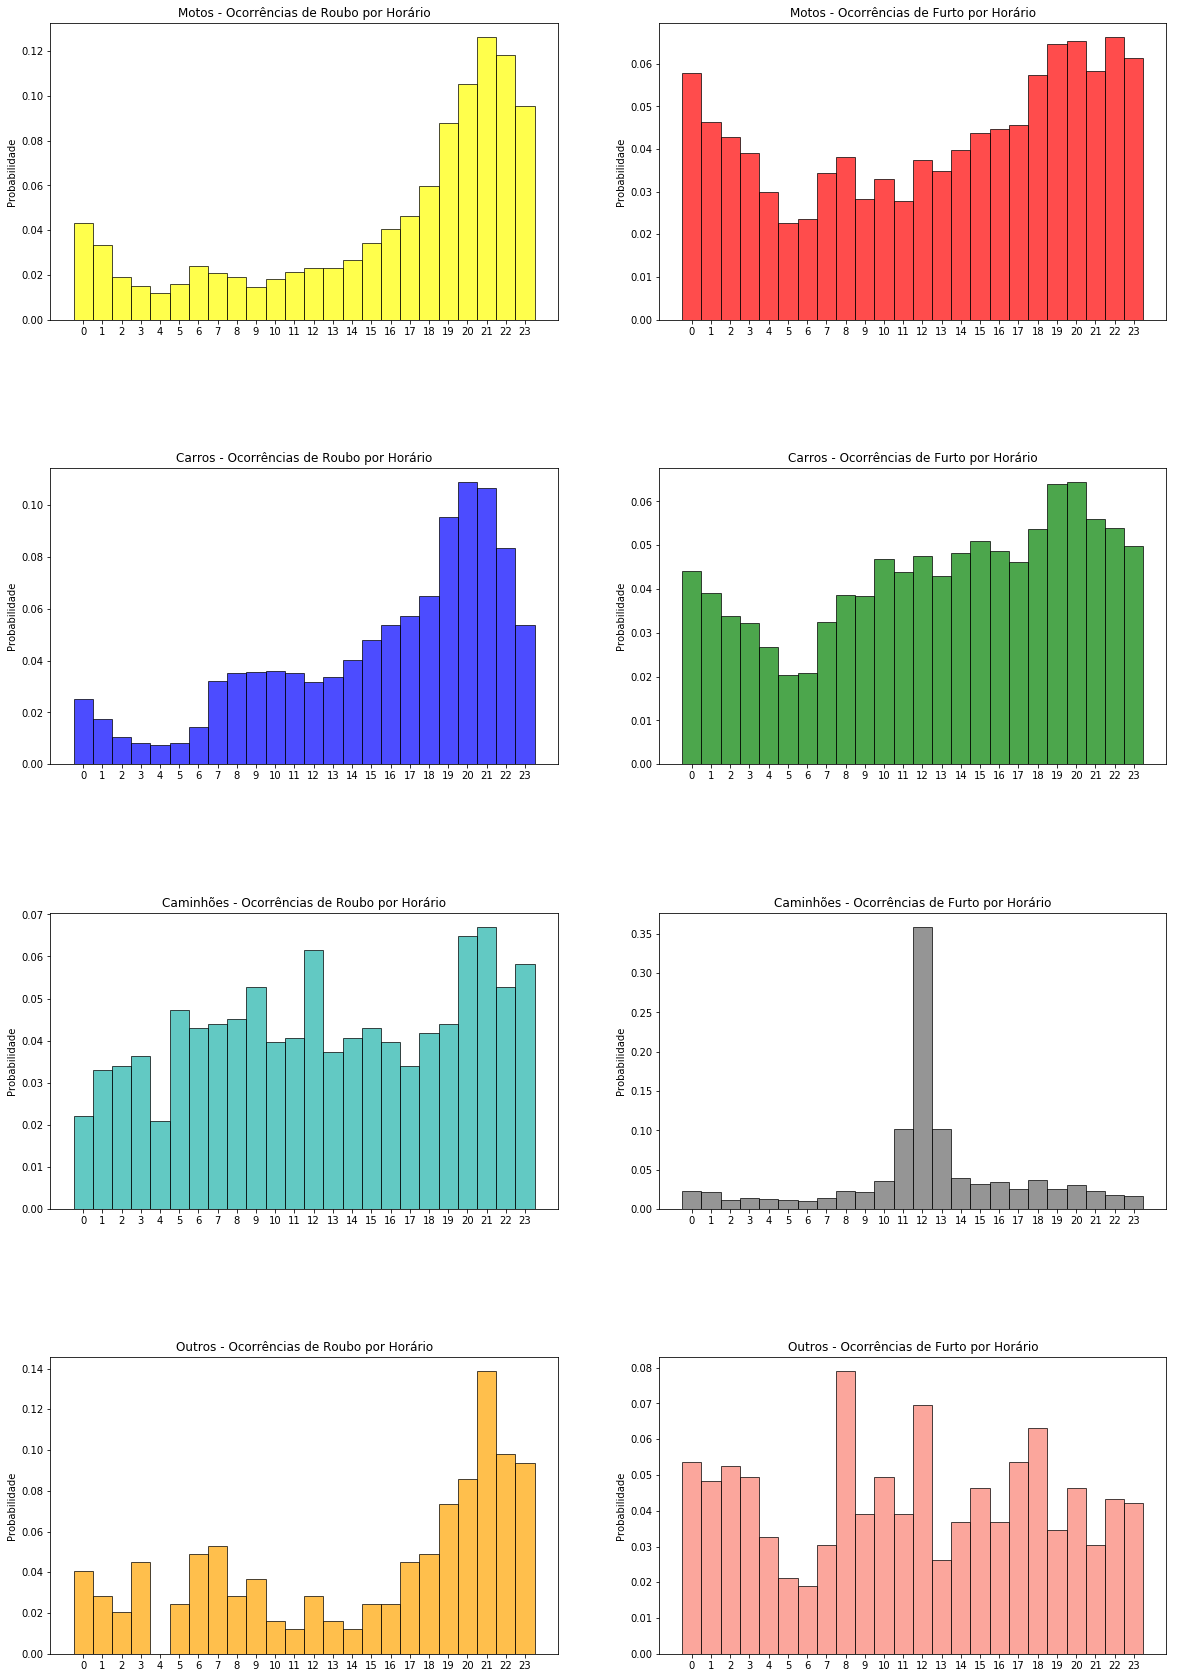

In [53]:
#Histograma dos ocorrências por horário
#Annual time series occurrences
Roubo_Motos  = Motos[Motos['Fato'] == 'Roubo']
Furto_Motos  = Motos[Motos['Fato'] == 'Furto']

Roubo_Motos['Hora'] = Roubo_Motos['Time'].dt.hour
Furto_Motos['Hora'] = Furto_Motos['Time'].dt.hour

Roubo_Carro  = Carros[Carros['Fato'] == 'Roubo']
Furto_Carro  = Carros[Carros['Fato'] == 'Furto']

Roubo_Carro['Hora'] = Roubo_Carro['Time'].dt.hour
Furto_Carro['Hora'] = Furto_Carro['Time'].dt.hour

Roubo_Caminhoes  = Caminhoes[Caminhoes['Fato'] == 'Roubo']
Furto_Caminhoes  = Caminhoes[Caminhoes['Fato'] == 'Furto']

Roubo_Caminhoes['Hora'] = Roubo_Caminhoes['Time'].dt.hour
Furto_Caminhoes['Hora'] = Furto_Caminhoes['Time'].dt.hour

Roubo_Outros  = Outros[Outros['Fato'] == 'Roubo']
Furto_Outros  = Outros[Outros['Fato'] == 'Furto']

Roubo_Outros['Hora'] = Roubo_Outros['Time'].dt.hour
Furto_Outros['Hora'] = Furto_Outros['Time'].dt.hour

bins = np.arange(0,24)
bin_w = (max(bins) - min(bins)) / (len(bins))
    
fig, ax = plt.subplots(4,2, figsize=(20,30))
fig.subplots_adjust(hspace=.5)

### MOTOS
ax[0][0].set(title='Motos - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[0][0].set_xticklabels(np.arange(0,24))
ax[0][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[0][0].hist(Roubo_Motos['Hora'], 24, normed=True, histtype='bar', color= ['yellow'], label=['yellow'], alpha=0.70, edgecolor='black')

ax[0][1].set(title='Motos - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[0][1].set_xticklabels(np.arange(0,24))
ax[0][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[0][1].hist(Furto_Motos['Hora'], 24, normed=True, histtype='bar', color= ['red'], label= ['blue'], alpha=0.70, edgecolor='black')    

### CARROS
ax[1][0].set(title='Carros - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[1][0].set_xticklabels(np.arange(0,24))
ax[1][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1][0].hist(Roubo_Carro['Hora'], 24, normed=True, histtype='bar', color= ['blue'], label=['blue'], alpha=0.70, edgecolor='black')

ax[1][1].set(title='Carros - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[1][1].set_xticklabels(np.arange(0,24))
ax[1][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1][1].hist(Furto_Carro['Hora'], 24, normed=True, histtype='bar', color= ['green'], label= ['blue'], alpha=0.70, edgecolor='black')

### CAMINHÕES
ax[2][0].set(title='Caminhões - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[2][0].set_xticklabels(np.arange(0,24))
ax[2][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[2][0].hist(Roubo_Caminhoes['Hora'], 24, normed=True, histtype='bar', color= ['lightseagreen'], label=['lightseagreen'], alpha=0.70, edgecolor='black')

ax[2][1].set(title='Caminhões - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[2][1].set_xticklabels(np.arange(0,24))
ax[2][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[2][1].hist(Furto_Caminhoes['Hora'], 24, normed=True, histtype='bar', color= ['dimgrey'], label= ['blue'], alpha=0.70, edgecolor='black')

### OUTROS
ax[3][0].set(title='Outros - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[3][0].set_xticklabels(np.arange(0,24))
ax[3][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[3][0].hist(Roubo_Outros['Hora'], 24, normed=True, histtype='bar', color= ['orange'], label=['orange'], alpha=0.70, edgecolor='black')

ax[3][1].set(title='Outros - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[3][1].set_xticklabels(np.arange(0,24))
ax[3][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[3][1].hist(Furto_Outros['Hora'], 24, normed=True, histtype='bar', color= ['salmon'], label= ['blue'], alpha=0.70, edgecolor='black')
fig.savefig("Graficos/Probabilidade_Ocorrencia_Hora_Categorias.png")

## Análise temporal por categoria

In [54]:
Carros['year'] = Carros['Time'].dt.year
Motos['year'] = Motos['Time'].dt.year
Caminhoes['year'] = Caminhoes['Time'].dt.year
Outros['year'] = Outros['Time'].dt.year

Roubo_Carros_year = year_series(Carros[Carros['Fato']=='Roubo'])
Furto_Carros_year = year_series(Carros[Carros['Fato']=='Furto'])

Roubo_Carros_year = Roubo_Carros_year.to_frame('Roubo_Carros').sort_index()
Furto_Carros_year = Furto_Carros_year.to_frame('Furto_Carros').sort_index()

Roubo_Motos_year = year_series(Motos[Motos['Fato']=='Roubo'])
Furto_Motos_year = year_series(Motos[Motos['Fato']=='Furto'])

Roubo_Motos_year = Roubo_Motos_year.to_frame('Roubo_Motos').sort_index()
Furto_Motos_year = Furto_Motos_year.to_frame('Furto_Motos').sort_index()

Roubo_Caminhoes_year = year_series(Caminhoes[Caminhoes['Fato']=='Roubo'])
Furto_Caminhoes_year = year_series(Caminhoes[Caminhoes['Fato']=='Furto'])

Roubo_Caminhoes_year = Roubo_Caminhoes_year.to_frame('Roubo_Caminhoes').sort_index()
Furto_Caminhoes_year = Furto_Caminhoes_year.to_frame('Furto_Caminhoes').sort_index()

Roubo_Outros_year = year_series(Outros[Outros['Fato']=='Roubo'])
Furto_Outros_year = year_series(Outros[Outros['Fato']=='Furto'])

Roubo_Outros_year = Roubo_Outros_year.to_frame('Roubo_Outros').sort_index()
Furto_Outros_year = Furto_Outros_year.to_frame('Furto_Outros').sort_index()

,Roubo_Caminhoes
2014,141
2015,175
2016,250
2017,190
2018,193


,Furto_Caminhoes
2014,794
2015,724
2016,760
2017,770
2018,624


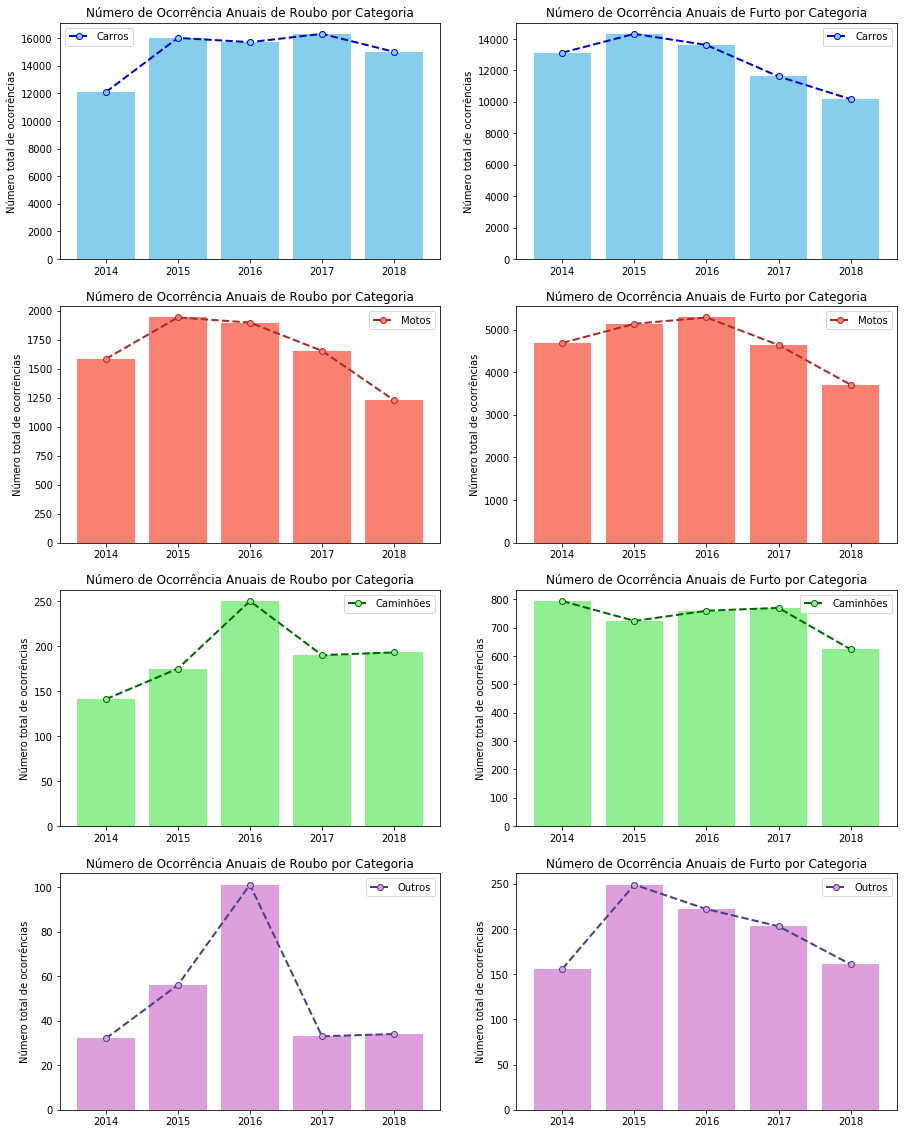

In [82]:
fig, ax = plt.subplots(4,2, figsize=(15,20))
fig.subplots_adjust(hspace=.2)

display(Roubo_Caminhoes_year)
display(Furto_Caminhoes_year)
#Carros
ax[0][0].set(title='Número de Ocorrência Anuais de Roubo por Categoria', ylabel = 'Número total de ocorrências')
ax[0][0].bar(Roubo_Carros_year.index, Roubo_Carros_year['Roubo_Carros'], color='skyblue')
ax[0][0].plot(Roubo_Carros_year.index, Roubo_Carros_year, marker='o', markerfacecolor='skyblue', color='mediumblue', linewidth=2, linestyle='--')

ax[0][1].set(title='Número de Ocorrência Anuais de Furto por Categoria', ylabel = 'Número total de ocorrências')
ax[0][1].bar(Furto_Carros_year.index, Furto_Carros_year['Furto_Carros'], color='skyblue')
ax[0][1].plot(Furto_Carros_year.index, Furto_Carros_year, marker='o', markerfacecolor='skyblue', color='mediumblue', linewidth=2, linestyle='--')

#Motos
ax[1][0].set(title='Número de Ocorrência Anuais de Roubo por Categoria', ylabel = 'Número total de ocorrências')
ax[1][0].bar(Roubo_Motos_year.index, Roubo_Motos_year['Roubo_Motos'], color='salmon')
ax[1][0].plot(Roubo_Motos_year.index, Roubo_Motos_year, marker='o', markerfacecolor='salmon', color='brown', linewidth=2, linestyle='--')

ax[1][1].set(title='Número de Ocorrência Anuais de Furto por Categoria', ylabel = 'Número total de ocorrências')
ax[1][1].bar(Furto_Motos_year.index, Furto_Motos_year['Furto_Motos'],color='salmon')
ax[1][1].plot(Furto_Motos_year.index, Furto_Motos_year, marker='o', markerfacecolor='salmon', color='brown', linewidth=2, linestyle='--')

#Caminhoes
ax[2][0].set(title='Número de Ocorrência Anuais de Roubo por Categoria', ylabel = 'Número total de ocorrências')
ax[2][0].bar(Roubo_Caminhoes_year.index, Roubo_Caminhoes_year['Roubo_Caminhoes'], color='lightgreen')
ax[2][0].plot(Roubo_Caminhoes_year.index, Roubo_Caminhoes_year, marker='o', markerfacecolor='lightgreen', color='darkgreen', linewidth=2, linestyle='--')

ax[2][1].set(title='Número de Ocorrência Anuais de Furto por Categoria', ylabel = 'Número total de ocorrências')
ax[2][1].bar(Furto_Caminhoes_year.index, Furto_Caminhoes_year['Furto_Caminhoes'],color='lightgreen')
ax[2][1].plot(Furto_Caminhoes_year.index, Furto_Caminhoes_year, marker='o', markerfacecolor='lightgreen', color='darkgreen', linewidth=2, linestyle='--')

#Outros
ax[3][0].set(title='Número de Ocorrência Anuais de Roubo por Categoria', ylabel = 'Número total de ocorrências')
ax[3][0].bar(Roubo_Outros_year.index, Roubo_Outros_year['Roubo_Outros'], color='plum')
ax[3][0].plot(Roubo_Outros_year.index, Roubo_Outros_year, marker='o', markerfacecolor='plum', color='darkslateblue', linewidth=2, linestyle='--')

ax[3][1].set(title='Número de Ocorrência Anuais de Furto por Categoria', ylabel = 'Número total de ocorrências')
ax[3][1].bar(Furto_Outros_year.index, Furto_Outros_year['Furto_Outros'],color='plum')
ax[3][1].plot(Furto_Outros_year.index, Furto_Outros_year, marker='o', markerfacecolor='plum', color='darkslateblue', linewidth=2, linestyle='--')


ax[0][0].legend(labels = ['Carros'])
ax[0][1].legend(labels = ['Carros'])
ax[1][0].legend(labels = ['Motos'])
ax[1][1].legend(labels = ['Motos'])
ax[2][0].legend(labels = ['Caminhões'])
ax[2][1].legend(labels = ['Caminhões'])
ax[3][0].legend(labels = ['Outros'])
ax[3][1].legend(labels = ['Outros'])

fig.savefig("Graficos/Ocorrencia_Anual_Categorias.png")

# ax[1].legend(labels = ['Carros', 'Motos', 'Caminhões'])

# Análise por Região

## Representatividade das Ocorrências por Região

,Ocorrencias,Repres(%)
Regiao,,
Porto Alegre,58555,0.333369
Região Metropolitana,57239,0.325877
Interior,59852,0.340754


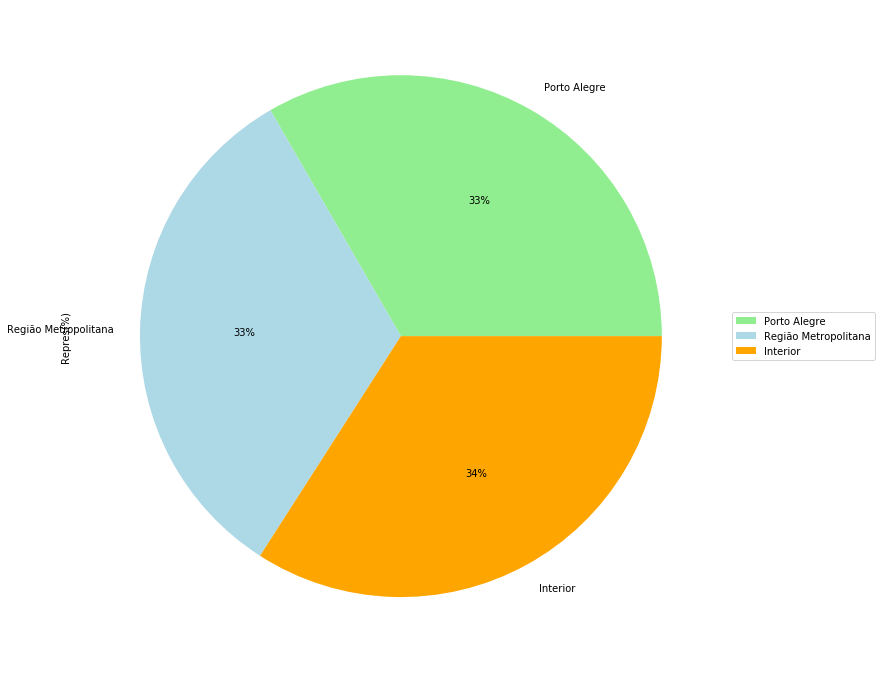

In [56]:
regiao_list = [{'Regiao':'Porto Alegre', 'Ocorrencias': len(POA), 'Repres(%)':len(POA)/len(df)}]
regiao_list.append({'Regiao':'Região Metropolitana', 'Ocorrencias': len(RMP), 'Repres(%)':len(RMP)/len(df)})
regiao_list.append({'Regiao':'Interior', 'Ocorrencias': len(Interior), 'Repres(%)':len(Interior)/len(df)})

Regiao_pie=pd.DataFrame(regiao_list)
Regiao_pie=Regiao_pie.set_index('Regiao')
display(Regiao_pie)

plot = Regiao_pie.plot.pie(y='Repres(%)', figsize=(12, 12), colors = ['lightgreen', 'lightblue', 'orange'], autopct='%1.0f%%')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# print(type(plot))
fig = plot.get_figure()
fig.savefig("Graficos/Regiao_Ocorrencias_PieChart.png",bbox_inches="tight")

## Distribuição Categoria e Tipo de Ocorrência por Região 

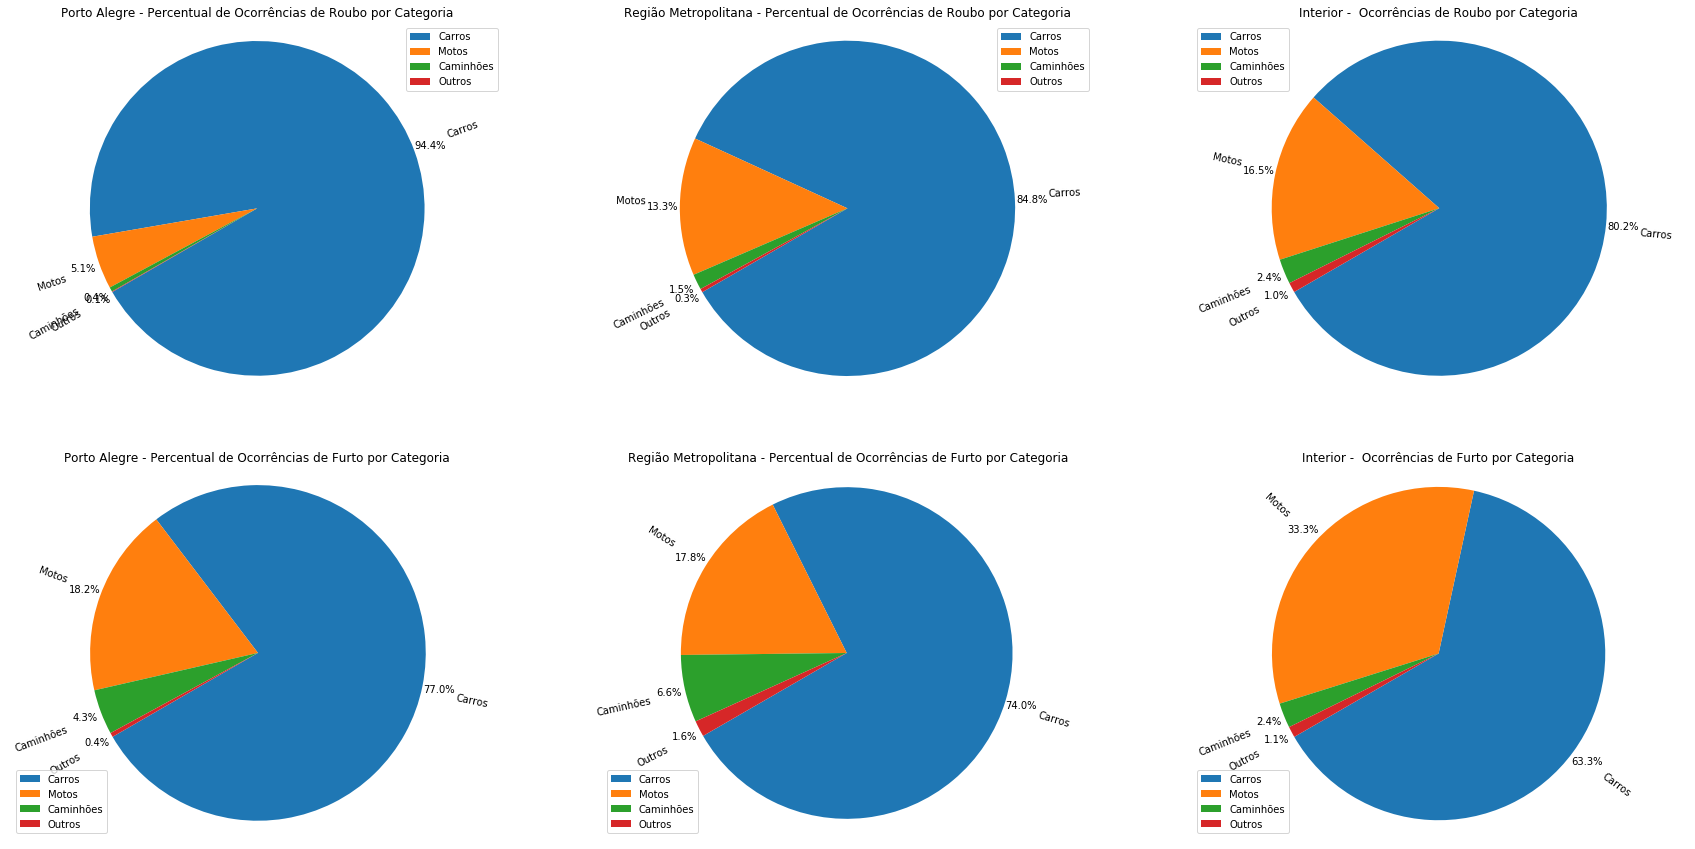

In [57]:
#Porto Alegre
POA_Carros = Carros[Carros['index'].isin(POA['index'])]
POA_Motos = Motos[Motos['index'].isin(POA['index'])]
POA_Caminhoes = Caminhoes[Caminhoes['index'].isin(POA['index'])]
POA_Outros = Outros[Outros['index'].isin(POA['index'])]
POA_Categoria_list = [{'Categoria':'Carros', 'Fato': 'Roubo','Ocorrencias': len(POA_Carros[POA_Carros['Fato'] == 'Roubo']), 'Repres(%)':len(POA_Carros[POA_Carros['Fato'] == 'Roubo'])/len(POA[POA['Fato']=='Roubo'])},\
                      {'Categoria':'Carros', 'Fato': 'Furto','Ocorrencias': len(POA_Carros[POA_Carros['Fato'] == 'Furto']), 'Repres(%)':len(POA_Carros[POA_Carros['Fato'] == 'Furto'])/len(POA[POA['Fato']=='Furto'])},\
                      {'Categoria':'Motos', 'Fato': 'Roubo','Ocorrencias': len(POA_Motos[POA_Motos['Fato'] == 'Roubo']), 'Repres(%)':len(POA_Motos[POA_Motos['Fato'] == 'Roubo'])/len(POA[POA['Fato']=='Roubo'])},\
                      {'Categoria':'Motos', 'Fato': 'Furto','Ocorrencias': len(POA_Motos[POA_Motos['Fato'] == 'Furto']), 'Repres(%)':len(POA_Motos[POA_Motos['Fato'] == 'Furto'])/len(POA[POA['Fato']=='Furto'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Roubo','Ocorrencias': len(POA_Caminhoes[POA_Caminhoes['Fato'] == 'Roubo']), 'Repres(%)':len(POA_Caminhoes[POA_Caminhoes['Fato'] == 'Roubo'])/len(POA[POA['Fato']=='Roubo'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Furto','Ocorrencias': len(POA_Caminhoes[POA_Caminhoes['Fato'] == 'Furto']), 'Repres(%)':len(POA_Caminhoes[POA_Caminhoes['Fato'] == 'Furto'])/len(POA[POA['Fato']=='Furto'])},\
                      {'Categoria':'Outros', 'Fato': 'Roubo','Ocorrencias': len(POA_Outros[POA_Outros['Fato'] == 'Roubo']), 'Repres(%)':len(POA_Outros[POA_Outros['Fato'] == 'Roubo'])/len(POA[POA['Fato']=='Roubo'])},\
                      {'Categoria':'Outros', 'Fato': 'Furto','Ocorrencias': len(POA_Outros[POA_Outros['Fato'] == 'Furto']), 'Repres(%)':len(POA_Outros[POA_Outros['Fato'] == 'Furto'])/len(POA[POA['Fato']=='Furto'])}]

POA_Categoria_pie=pd.DataFrame(POA_Categoria_list)
# display(POA_Categoria_pie['Repres(%)'].sum())

#Região Metropolitana
RMP_Carros = Carros[Carros['index'].isin(RMP['index'])]
RMP_Motos = Motos[Motos['index'].isin(RMP['index'])]
RMP_Caminhoes = Caminhoes[Caminhoes['index'].isin(RMP['index'])]
RMP_Outros = Outros[Outros['index'].isin(RMP['index'])]

RMP_Categoria_list = [{'Categoria':'Carros', 'Fato': 'Roubo','Ocorrencias': len(RMP_Carros[RMP_Carros['Fato'] == 'Roubo']), 'Repres(%)':len(RMP_Carros[RMP_Carros['Fato'] == 'Roubo'])/len(RMP[RMP['Fato']=='Roubo'])},\
                      {'Categoria':'Carros', 'Fato': 'Furto','Ocorrencias': len(RMP_Carros[RMP_Carros['Fato'] == 'Furto']), 'Repres(%)':len(RMP_Carros[RMP_Carros['Fato'] == 'Furto'])/len(RMP[RMP['Fato']=='Furto'])},\
                      {'Categoria':'Motos', 'Fato': 'Roubo','Ocorrencias': len(RMP_Motos[RMP_Motos['Fato'] == 'Roubo']), 'Repres(%)':len(RMP_Motos[RMP_Motos['Fato'] == 'Roubo'])/len(RMP[RMP['Fato']=='Roubo'])},\
                      {'Categoria':'Motos', 'Fato': 'Furto','Ocorrencias': len(RMP_Motos[RMP_Motos['Fato'] == 'Furto']), 'Repres(%)':len(RMP_Motos[RMP_Motos['Fato'] == 'Furto'])/len(RMP[RMP['Fato']=='Furto'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Roubo','Ocorrencias': len(RMP_Caminhoes[RMP_Caminhoes['Fato'] == 'Roubo']), 'Repres(%)':len(RMP_Caminhoes[RMP_Caminhoes['Fato'] == 'Roubo'])/len(RMP[RMP['Fato']=='Roubo'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Furto','Ocorrencias': len(RMP_Caminhoes[RMP_Caminhoes['Fato'] == 'Furto']), 'Repres(%)':len(RMP_Caminhoes[RMP_Caminhoes['Fato'] == 'Furto'])/len(RMP[RMP['Fato']=='Furto'])},\
                      {'Categoria':'Outros', 'Fato': 'Roubo','Ocorrencias': len(RMP_Outros[RMP_Outros['Fato'] == 'Roubo']), 'Repres(%)':len(RMP_Outros[RMP_Outros['Fato'] == 'Roubo'])/len(RMP[RMP['Fato']=='Roubo'])},\
                      {'Categoria':'Outros', 'Fato': 'Furto','Ocorrencias': len(RMP_Outros[RMP_Outros['Fato'] == 'Furto']), 'Repres(%)':len(RMP_Outros[RMP_Outros['Fato'] == 'Furto'])/len(RMP[RMP['Fato']=='Furto'])}]

RMP_Categoria_pie=pd.DataFrame(RMP_Categoria_list)
# display(RMP_Categoria_pie['Repres(%)'].sum())

#Interior
Interior_Carros = Carros[Carros['index'].isin(Interior['index'])]
Interior_Motos = Motos[Motos['index'].isin(Interior['index'])]
Interior_Caminhoes = Caminhoes[Caminhoes['index'].isin(Interior['index'])]
Interior_Outros = Outros[Outros['index'].isin(Interior['index'])]

Interior_Categoria_list = [{'Categoria':'Carros', 'Fato': 'Roubo','Ocorrencias': len(Interior_Carros[Interior_Carros['Fato'] == 'Roubo']), 'Repres(%)':len(Interior_Carros[Interior_Carros['Fato'] == 'Roubo'])/len(Interior[Interior['Fato']=='Roubo'])},\
                      {'Categoria':'Carros', 'Fato': 'Furto','Ocorrencias': len(Interior_Carros[Interior_Carros['Fato'] == 'Furto']), 'Repres(%)':len(Interior_Carros[Interior_Carros['Fato'] == 'Furto'])/len(Interior[Interior['Fato']=='Furto'])},\
                      {'Categoria':'Motos', 'Fato': 'Roubo','Ocorrencias': len(Interior_Motos[Interior_Motos['Fato'] == 'Roubo']), 'Repres(%)':len(Interior_Motos[Interior_Motos['Fato'] == 'Roubo'])/len(Interior[Interior['Fato']=='Roubo'])},\
                      {'Categoria':'Motos', 'Fato': 'Furto','Ocorrencias': len(Interior_Motos[Interior_Motos['Fato'] == 'Furto']), 'Repres(%)':len(Interior_Motos[Interior_Motos['Fato'] == 'Furto'])/len(Interior[Interior['Fato']=='Furto'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Roubo','Ocorrencias': len(Interior_Caminhoes[Interior_Caminhoes['Fato'] == 'Roubo']), 'Repres(%)':len(Interior_Caminhoes[Interior_Caminhoes['Fato'] == 'Roubo'])/len(Interior[Interior['Fato']=='Roubo'])},\
                      {'Categoria':'Caminhoes', 'Fato': 'Furto','Ocorrencias': len(Interior_Caminhoes[Interior_Caminhoes['Fato'] == 'Furto']), 'Repres(%)':len(Interior_Caminhoes[Interior_Caminhoes['Fato'] == 'Furto'])/len(Interior[Interior['Fato']=='Furto'])},\
                      {'Categoria':'Outros', 'Fato': 'Roubo','Ocorrencias': len(Interior_Outros[Interior_Outros['Fato'] == 'Roubo']), 'Repres(%)':len(Interior_Outros[Interior_Outros['Fato'] == 'Roubo'])/len(Interior[Interior['Fato']=='Roubo'])},\
                      {'Categoria':'Outros', 'Fato': 'Furto','Ocorrencias': len(Interior_Outros[Interior_Outros['Fato'] == 'Furto']), 'Repres(%)':len(Interior_Outros[Interior_Outros['Fato'] == 'Furto'])/len(Interior[Interior['Fato']=='Furto'])}]

Interior_Categoria_pie=pd.DataFrame(Interior_Categoria_list)



# display(Interior_Categoria_pie['Repres(%)'].sum())
fig, ax = plt.subplots(2,3, figsize=(30,15))
fig.subplots_adjust(hspace=.2)

#Roubo
labels = 'Carros', 'Motos', 'Caminhões', 'Outros'
ax[0][0].set(title='Porto Alegre - Percentual de Ocorrências de Roubo por Categoria')
ax[0][0].pie(POA_Categoria_pie.loc[POA_Categoria_pie['Fato']=='Roubo','Repres(%)'], labels=labels, autopct='%1.1f%%', shadow=False, startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[0][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0][0].legend()

ax[0][1].set(title='Região Metropolitana - Percentual de Ocorrências de Roubo por Categoria')
ax[0][1].pie(RMP_Categoria_pie.loc[RMP_Categoria_pie['Fato']=='Roubo','Repres(%)'], labels=labels, autopct='%1.1f%%', startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[0][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0][1].legend()

ax[0][2].set(title='Interior -  Ocorrências de Roubo por Categoria')
ax[0][2].pie(Interior_Categoria_pie.loc[Interior_Categoria_pie['Fato']=='Roubo','Repres(%)'], labels=labels, autopct='%1.1f%%', shadow=False, startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[0][2].axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0][2].legend();

#Furto
ax[1][0].set(title='Porto Alegre - Percentual de Ocorrências de Furto por Categoria')
ax[1][0].pie(POA_Categoria_pie.loc[POA_Categoria_pie['Fato']=='Furto','Repres(%)'], labels=labels, autopct='%1.1f%%', shadow=False, startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[1][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1][0].legend()

ax[1][1].set(title='Região Metropolitana - Percentual de Ocorrências de Furto por Categoria')
ax[1][1].pie(RMP_Categoria_pie.loc[RMP_Categoria_pie['Fato']=='Furto','Repres(%)'], labels=labels, autopct='%1.1f%%', startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[1][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1][1].legend()

ax[1][2].set(title='Interior -  Ocorrências de Furto por Categoria')
ax[1][2].pie(Interior_Categoria_pie.loc[Interior_Categoria_pie['Fato']=='Furto','Repres(%)'], labels=labels, autopct='%1.1f%%', shadow=False, startangle=210,pctdistance = 1.1, rotatelabels=45, labeldistance =1.2);
ax[1][2].axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1][2].legend();

fig.savefig("Graficos/Categorias_Tipo_Regiao_Ocorrencias_PieChart.png",bbox_inches="tight")

## Análise de Ocorrências por Bairros

In [58]:
## Distribuição de Ocorrências por Bairro e Região
POA = POA[~(POA.Bairro.str.match(r'\s+'))]
POA = POA[POA['Bairro']!="-"]
POA = POA[(POA['Bairro']!='')]
RMP_Bairros = RMP[RMP['Bairro']!=""]
Interior_Bairros = Interior[Interior['Bairro']!=""]

POA.loc[((POA['Bairro'].str.contains('STA M GORETTI')) \
            | (POA['Bairro'].str.contains('MARIA GORETTI')) \
            | (POA['Bairro'].str.contains('S M GORETTI')) ) , 'Bairro'] = 'STA M GORETTI'

POA.loc[((POA['Bairro'].str.contains('BOM JESUS')) \
            | (POA['Bairro'].str.contains('B JESUS')) \
            | (POA['Bairro'].str.contains('VL B JESUS')) \
            | (POA['Bairro'].str.contains('B JESUS-S JOSE')) ) , 'Bairro'] = 'BOM JESUS'

POA.loc[((POA['Bairro'].str.contains('VILA CONCEICAO')) \
            | (POA['Bairro'].str.contains('VL CONCEICAO-CAVALHA')) ) , 'Bairro'] = 'VILA CONCEICAO'

POA.loc[(POA['Bairro'].str.contains('SAO JOSE')), 'Bairro'] = 'SAO JOSE'

POA.loc[((POA['Bairro'].str.contains('LOMBA')) \
            | (POA['Bairro'].str.contains('L.PINHEIRO PD 13')) \
            | (POA['Bairro'].str.contains('PINHEIRO-CASCATA')) \
            | (POA['Bairro'].str.contains('LOMBA DO PINHEI RO')) ) , 'Bairro'] = 'LOMBA DO PINHEIRO'

POA.loc[((POA['Bairro'].str.contains('SALS')) \
            | (POA['Bairro'].str.contains('SAUS')) ) , 'Bairro'] = 'JARDIM DO SALSO'

POA.loc[(POA['Bairro'].str.contains('PETROPOLIS')), 'Bairro'] = 'PETROPOLIS'

POA.loc[((POA['Bairro'].str.contains('CHACARA DAS PEDRAS')) \
            | (POA['Bairro'].str.contains('CHAC PEDRAS')) ) , 'Bairro'] = 'CHACARA DAS PEDRAS'

POA.loc[((POA['Bairro'].str.contains('PASSO DAS PEDRAS')) \
            | (POA['Bairro'].str.contains('P PEDRAS')) ) , 'Bairro'] = 'PASSO DAS PEDRAS'


POA.loc[((POA['Bairro'].str.contains('JARDIM ITU-SABARA')) \
            | (POA['Bairro'].str.contains('JD ITU SABARA')) \
            | (POA['Bairro'].str.contains('ITU SABARA')) \
            | (POA['Bairro'].str.contains('RUA ARI TARRAGO ITU')) \
            | (POA['Bairro'].str.contains('JARDIM ITU')) \
            | (POA['Bairro'].str.contains('JD ITU-SABARA')) ) , 'Bairro'] = 'JARDIM ITU-SABARA'

POA.loc[((POA['Bairro'].str.contains('MOINHOS DE VENTO')) \
            | (POA['Bairro'].str.contains('M. DE VENTO')) \
            | (POA['Bairro'].str.contains('MOINHOS DE VEN')) \
            | (POA['Bairro'].str.contains('MOINHO DOS VENTOS')) ) , 'Bairro'] = 'MOINHOS DE VENTO'

POA.loc[((POA['Bairro'].str.contains('SAO GERALDO')) \
            | (POA['Bairro'].str.contains('SAO GERALDO/SAO JOAO')) \
            | (POA['Bairro'].str.contains('S GERALDO')) ) , 'Bairro'] = 'SAO GERALDO'

POA.loc[((POA['Bairro'].str.contains('SAO JOAO')) \
            | (POA['Bairro'].str.contains('S JOAO-SARANDI')) \
            | (POA['Bairro'].str.contains('S JOAO')) \
            | (POA['Bairro'].str.contains('S JOAO-ANCHIET')) ) , 'Bairro'] = 'SAO JOAO'

POA.loc[((POA['Bairro'].str.contains('JARDIM LEOPOLDINA')) \
            | (POA['Bairro'].str.contains('JARDIM DONA LEOPOLDINA')) \
            | (POA['Bairro'].str.contains('LEOPOLDINA')) \
            | (POA['Bairro'].str.contains('JD LEOPOLDINA')) \
            | (POA['Bairro'].str.contains('J LEOPOLDINA')) ) , 'Bairro'] = 'JARDIM LEOPOLDINA'

POA.loc[((POA['Bairro'].str.contains('JARDIM FLORESTA')) \
            | (POA['Bairro'].str.contains('JD FLORESTA')) ) , 'Bairro'] = 'JARDIM FLORESTA'

POA.loc[((POA['Bairro'].str.contains('MARIO QUI')) \
            | (POA['Bairro'].str.contains('R BERTA - M QUINTANA')) ) , 'Bairro'] = 'MARIO QUINTANA'

POA.loc[((POA['Bairro'].str.contains('FARROUPILHA')) \
            | (POA['Bairro'].str.contains('FARROUPILHA / SANTANA')) ) , 'Bairro'] = 'FARROUPILHA'

POA.loc[((POA['Bairro'].str.contains('JD INGA')) \
            | (POA['Bairro'].str.contains('JD. INGA')) ) , 'Bairro'] = 'JD. INGA'

POA.loc[((POA['Bairro'].str.contains('PARQUE DOS MAIAS')) \
            | (POA['Bairro'].str.contains('P MAIAS')) \
            | (POA['Bairro'].str.contains('PQ MAIAS')) ) , 'Bairro'] = 'PARQUE DOS MAIAS'

POA.loc[((POA['Bairro'].str.contains('RUBEM BERTA')) \
            | (POA['Bairro'].str.contains('R BERTA')) \
            | (POA['Bairro'].str.contains('R. BERTA')) \
            | (POA['Bairro'].str.contains('R BERTA - STA MARIA')) ) , 'Bairro'] = 'RUBEM BERTA'

POA.loc[(POA['Bairro'].str.contains('SEBAST')), 'Bairro'] = 'SAO SEBASTIAO'

POA.loc[((POA['Bairro'].str.contains('B NOVO')) \
            | (POA['Bairro'].str.contains('BELEM NOVO')) ) , 'Bairro'] = 'BELEM NOVO'

POA.loc[(POA['Bairro'].str.contains('BORGES')), 'Bairro'] = 'CORONEL APARICIO BORGES'

POA.loc[(POA['Bairro'].str.contains('SERRAT')), 'Bairro'] = 'MONT\'SERRAT'

POA.loc[(POA['Bairro'].str.contains('AREIA')), 'Bairro'] = 'PASSO DA AREIA'

POA.loc[((POA['Bairro'].str.contains('JARDIM YPU')) \
            | (POA['Bairro'].str.contains('JARDIM IPU')) ) , 'Bairro'] = 'JARDIM YPU'

POA.loc[((POA['Bairro'].str.contains('ESPIRITO SANTO')) \
            | (POA['Bairro'].str.contains('E SANTO')) ) , 'Bairro'] = 'ESPIRITO SANTO'

POA.loc[((POA['Bairro'].str.contains('COSTA')) \
            & (POA['Bairro'].str.contains('SILVA')) ) , 'Bairro'] = 'COSTA E SILVA'

POA.loc[(POA['Bairro'].str.contains('REDENTOR')), 'Bairro'] = 'CRISTO REDENTOR'
POA.loc[(POA['Bairro'].str.contains('SOL')), 'Bairro'] = 'CHAPEU DO SOL'
POA.loc[(POA['Bairro'].str.contains('VELHO')), 'Bairro'] = 'BELEM VELHO'
POA.loc[(POA['Bairro'].str.contains('IPIRANGA')), 'Bairro'] = 'VILA IPIRANGA'
POA.loc[(POA['Bairro'].str.contains('BRANCO')), 'Bairro'] = 'RIO BRANCO'
POA.loc[(POA['Bairro'].str.contains('MORROS')), 'Bairro'] = 'ABERTA DOS MORROS'
POA.loc[(POA['Bairro'].str.contains('ALVES')), 'Bairro'] = 'PROTASIO ALVES'
POA.loc[(POA['Bairro'].str.contains('FIM')), 'Bairro'] = 'BOM FIM'
POA.loc[(POA['Bairro'].str.contains('SARA')), 'Bairro'] = 'SARANDI'
POA.loc[(POA['Bairro'].str.contains('HIGI')), 'Bairro'] = 'HIGIENOPOLIS'
POA.loc[(POA['Bairro'].str.contains('LINDOIA')), 'Bairro'] = 'JARDIM LINDOIA'
POA.loc[(POA['Bairro'].str.contains('PESSOA')), 'Bairro'] = 'VILA JOAO PESSOA'
POA.loc[(POA['Bairro'].str.contains('SETIMO')), 'Bairro'] = 'SETMIO CEU'
POA.loc[(POA['Bairro'].str.contains('NOVA')) & ~(POA['Bairro'].str.contains('RESTINGA')), 'Bairro'] = 'VILA NOVA'


display(POA.head())

,Ano Fabricação,Bairro,CEP,Endereço,Estado,Fato,index,Latitude,Logradouro,Longitude,Marca Veículo,Municipio,Município,Número,País,Time,geocode,year
17062,2012,BOA VISTA,NaN,AV DR NILO PECANHA PETROPOLIS-BOA VISTA PORT...,Rio Grande do Sul,Furto,17063,-30.028031,AV DR NILO PECANHA,-51.171334,HONDA/CB 300R,PORTO ALEGRE,PORTO ALEGRE,,Brazil,2014-06-09 22:40:00,[{'address_components': [{'long_name': 'Avenid...,2014
17063,2001,FLORESTA,90560-002,AV CRISTOVAO COLOMBO FLORESTA/P DAREIA POR...,Rio Grande do Sul,Furto,17064,-30.017998,AV CRISTOVAO COLOMBO,-51.201710,HONDA/CG 125 TITAN KS,PORTO ALEGRE,PORTO ALEGRE,,Brazil,2014-12-20 16:30:00,"[{'address_components': [{'long_name': '1930',...",2014
17065,1991,SAO GERALDO,90240-020,AV VIENA 300 S GERALDO PORTO ALEGRE Brasil,Rio Grande do Sul,Furto,17066,-30.014223,AV VIENA,-51.199384,M.BENZ/709,PORTO ALEGRE,PORTO ALEGRE,300,Brazil,2014-11-24 12:30:00,"[{'address_components': [{'long_name': '300', ...",2014
17066,2011,AUXILIADORA,90540-100,RUA CORCOVADO 80 AUXILIADORA PORTO ALEGRE Br...,Rio Grande do Sul,Roubo,17067,-30.020640,RUA CORCOVADO,-51.188509,VW/GOL 1.0,PORTO ALEGRE,PORTO ALEGRE,80,Brazil,2014-01-10 22:00:00,"[{'address_components': [{'long_name': '80', '...",2014
17068,2014,RUBEM BERTA,NaN,PORTO ALEGRE RS 108 RUBEM BERTA PORTO ALEG...,State of Rio Grande do Sul,Roubo,17069,-29.998175,PORTO ALEGRE RS,-51.097797,VW/NOVO CROSSFOX MA,PORTO ALEGRE,PORTO ALEGRE,108,Brazil,2014-12-20 18:30:00,[{'address_components': [{'long_name': 'Rubem ...,2014


In [59]:
POA_Bairros = POA[['index', 'Bairro','Fato', 'year']].groupby(['Bairro','Fato', 'year']).agg(['count'])

# Bairros = [for Bairro in POA_Bairros['Bairro'].unique():]
# for Bairro in POA_Bairros['Bairro'].unique():
#     print("%s\n" % Bairro)=
# print(len(POA_Bairros['Bairro'].unique()))
# print(POA_Bairros['Bairro'].unique())

POA_Bairros = POA_Bairros.reset_index()
POA_Bairros.columns = ['Bairro', 'Fato', 'year', 'ocorrencias']
# display(POA_Bairros)
def Bairro_Fato(df, fato, year):
    df2 = df[(df['Fato']==fato) & (df['year'] == year)].sort_values(by=['ocorrencias'], ascending=True)
    df2['Repres(%)'] = df2['ocorrencias']/df2['ocorrencias'].sum()
    df2['Cum_Repre'] = df2['Repres(%)'].cumsum()
    df2 = df2.set_index('Bairro')
    return df2[df2['Cum_Repre']>= 0.20]

Bairro_Fato(POA_Bairros, 'Furto', 2018)

,Fato,year,ocorrencias,Repres(%),Cum_Repre
Bairro,,,,,
JARDIM BOTANICO,Furto,2018,20,0.007701,0.204467
JARDIM EUROPA,Furto,2018,22,0.008471,0.212938
BOM JESUS,Furto,2018,25,0.009626,0.222564
HUMAITA,Furto,2018,26,0.010012,0.232576
LOMBA DO PINHEIRO,Furto,2018,26,0.010012,0.242588
VILA NOVA,Furto,2018,27,0.010397,0.252984
CRISTAL,Furto,2018,29,0.011167,0.264151
AUXILIADORA,Furto,2018,31,0.011937,0.276088
FARROUPILHA,Furto,2018,32,0.012322,0.288410


In [60]:
# display(POA_Bairros[POA_Bairros['year']==2018].head())
POA_Bairros2018 = POA_Bairros[POA_Bairros['year']==2018].copy()
POA_Bairros2018= POA_Bairros2018[['Bairro', 'ocorrencias']].groupby(['Bairro']).agg(['sum'])
POA_Bairros2018 = POA_Bairros2018.reset_index()
# POA_Bairros2018.to_csv("BairrosOcorrencias2018.csv" index=True, header=True)

POA_Bairros2018.columns = ['bairros','ocorrencias']
display(POA_Bairros2018)
POA_Bairros2018.to_csv("BairrosOcorrencias2018.csv")


,bairros,ocorrencias
0,ABERTA DOS MORROS,19
1,AGRONOMIA,42
2,ALTO TERESOPOLIS,2
3,ANCHIETA,63
4,ARQUIPELAGO,7
5,AUXILIADORA,140
6,AZENHA,134
7,BAIRRO MORRO SANTANA,1
8,BELA VISTA,60
9,BELEM NOVO,32


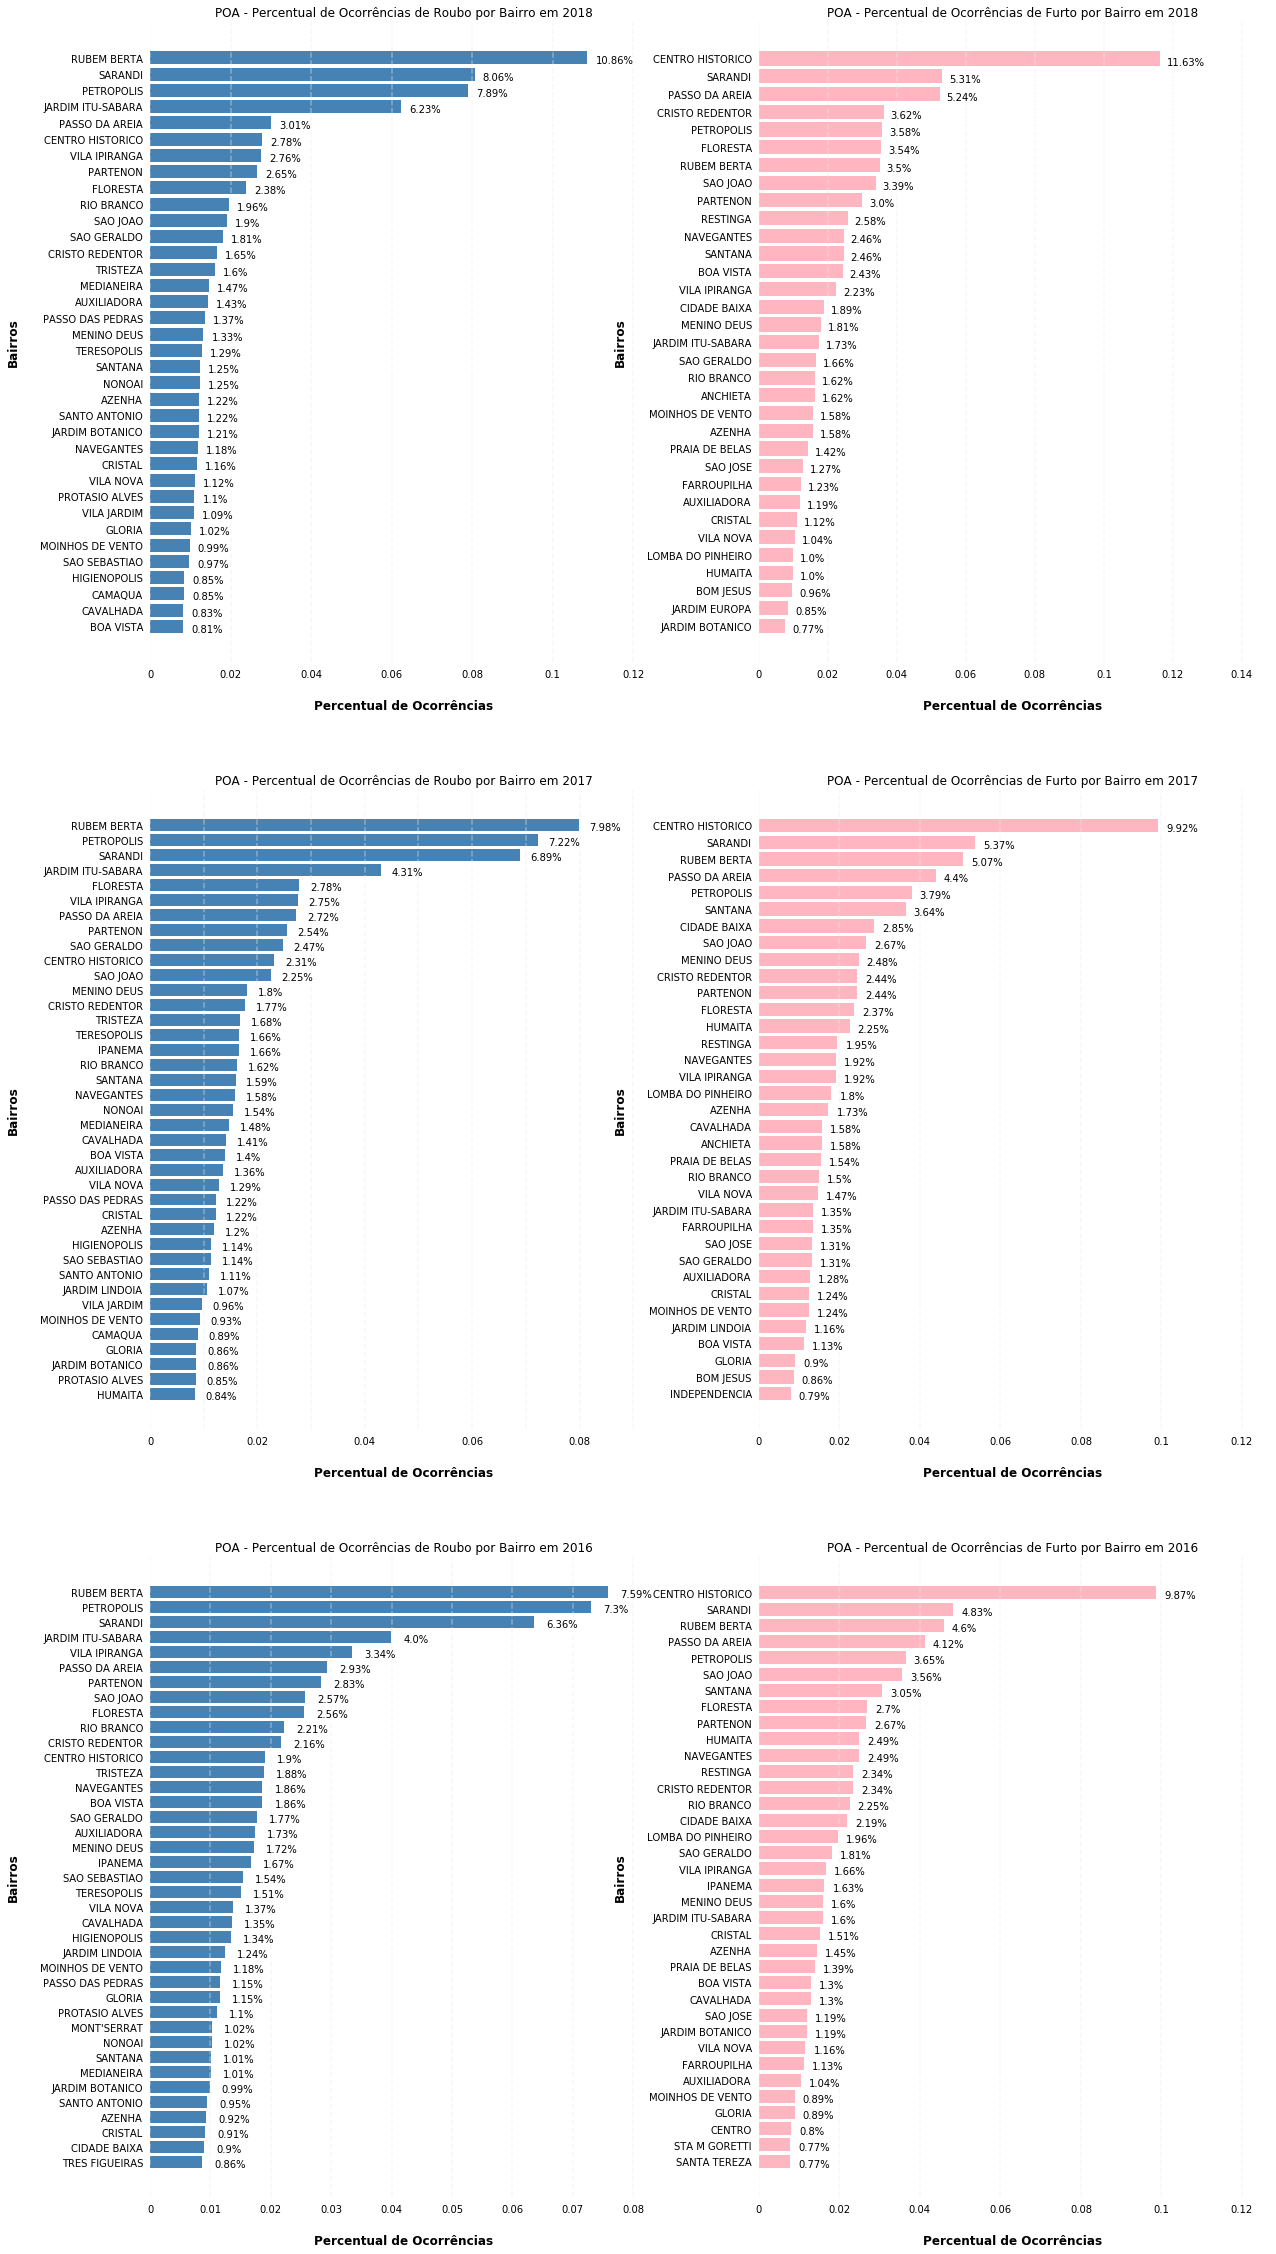

In [61]:
fig, ax = plt.subplots(3,2, figsize=(20,40))
## Porto Alegre ################################################
## 2018 ################################################
#Roubo
ax[0][0].set(title='POA - Percentual de Ocorrências de Roubo por Bairro em 2018')
bar1 = ax[0][0].barh(Bairro_Fato(POA_Bairros, 'Roubo', 2018).index, Bairro_Fato(POA_Bairros, 'Roubo', 2018)['Repres(%)'], color='steelblue')

# Despine
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][0].get_xticks()
for tick in vals:
    ax[0][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][0].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Roubo', 2018)['Repres(%)']):
    ax[0][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[0][1].set(title='POA - Percentual de Ocorrências de Furto por Bairro em 2018')
bar1 = ax[0][1].barh(Bairro_Fato(POA_Bairros, 'Furto', 2018).index, Bairro_Fato(POA_Bairros, 'Furto', 2018)['Repres(%)'], color='lightpink')

# Despine
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][1].get_xticks()
for tick in vals:
    ax[0][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][1].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Furto', 2018)['Repres(%)']):
    ax[0][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
## Porto Alegre ################################################
## 2017 ################################################
#Roubo
ax[1][0].set(title='POA - Percentual de Ocorrências de Roubo por Bairro em 2017')
bar1 = ax[1][0].barh(Bairro_Fato(POA_Bairros, 'Roubo', 2017).index, Bairro_Fato(POA_Bairros, 'Roubo', 2017)['Repres(%)'], color='steelblue')

# Despine
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][0].get_xticks()
for tick in vals:
    ax[1][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][0].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Roubo', 2017)['Repres(%)']):
    ax[1][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[1][1].set(title='POA - Percentual de Ocorrências de Furto por Bairro em 2017')
bar1 = ax[1][1].barh(Bairro_Fato(POA_Bairros, 'Furto', 2017).index, Bairro_Fato(POA_Bairros, 'Furto', 2017)['Repres(%)'], color='lightpink')

# Despine
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][1].get_xticks()
for tick in vals:
    ax[1][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][1].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Furto', 2017)['Repres(%)']):
    ax[1][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
##  Porto Alegre ################################################
## 2016 ################################################
#Roubo
ax[2][0].set(title='POA - Percentual de Ocorrências de Roubo por Bairro em 2016')
bar1 = ax[2][0].barh(Bairro_Fato(POA_Bairros, 'Roubo', 2016).index, Bairro_Fato(POA_Bairros, 'Roubo', 2016)['Repres(%)'], color='steelblue')

# Despine
ax[2][0].spines['right'].set_visible(False)
ax[2][0].spines['top'].set_visible(False)
ax[2][0].spines['left'].set_visible(False)
ax[2][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][0].get_xticks()
for tick in vals:
    ax[2][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][0].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Roubo', 2016)['Repres(%)']):
    ax[2][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[2][1].set(title='POA - Percentual de Ocorrências de Furto por Bairro em 2016')
bar1 = ax[2][1].barh(Bairro_Fato(POA_Bairros, 'Furto', 2016).index, Bairro_Fato(POA_Bairros, 'Furto', 2016)['Repres(%)'], color='lightpink')

# Despine
ax[2][1].spines['right'].set_visible(False)
ax[2][1].spines['top'].set_visible(False)
ax[2][1].spines['left'].set_visible(False)
ax[2][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][1].get_xticks()
for tick in vals:
    ax[2][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][1].set_ylabel("Bairros", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Bairro_Fato(POA_Bairros, 'Furto', 2016)['Repres(%)']):
    ax[2][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
    
fig.savefig("Graficos/Ocorrencias_por_Bairro_POA.png",bbox_inches="tight")

## Análise de Ocorrências por Marca

### Classificação Carros por Marca

In [62]:
Carros['Fabricante'] = np.nan
Carros.loc[(Carros['Marca Veículo'].str.contains('HONDA')), 'Fabricante'] = 'HONDA'
Carros.loc[((Carros['Marca Veículo'].str.contains('GM')) \
            | (Carros['Marca Veículo'].str.contains('CHEV')) ) , 'Fabricante'] = 'CHEVROLET'
Carros.loc[(Carros['Marca Veículo'].str.contains('FORD')), 'Fabricante'] = 'FORD'

Carros.loc[(Carros['Marca Veículo'].str.contains('FIAT')), 'Fabricante'] = 'FIAT'
Carros.loc[(Carros['Marca Veículo'].str.contains('RENAULT')), 'Fabricante'] = 'RENAULT'
Carros.loc[(Carros['Marca Veículo'].str.contains('TOYOTA')), 'Fabricante'] = 'TOYOTA'
Carros.loc[(Carros['Marca Veículo'].str.contains('PEUGEOT')), 'Fabricante'] = 'PEUGEOT'
Carros.loc[(Carros['Marca Veículo'].str.contains('CITROEN')), 'Fabricante'] = 'CITROEN'
Carros.loc[(Carros['Marca Veículo'].str.contains('HYUNDAI')), 'Fabricante'] = 'HYUNDAI'
Carros.loc[(Carros['Marca Veículo'].str.contains('CHERY')), 'Fabricante'] = 'CHERY'
Carros.loc[(Carros['Marca Veículo'].str.contains('NISSAN')), 'Fabricante'] = 'NISSAN'
Carros.loc[(Carros['Marca Veículo'].str.contains('VOLVO')), 'Fabricante'] = 'VOLVO'
Carros.loc[(Carros['Marca Veículo'].str.contains('SUZUKI')), 'Fabricante'] = 'SUZUKI'
Carros.loc[(Carros['Marca Veículo'].str.contains('BMW')), 'Fabricante'] = 'BMW'
Carros.loc[(Carros['Marca Veículo'].str.contains('AUDI')), 'Fabricante'] = 'AUDI'
Carros.loc[(Carros['Marca Veículo'].str.contains('LEXUS')), 'Fabricante'] = 'LEXUS'
Carros.loc[(Carros['Marca Veículo'].str.contains('JAC')), 'Fabricante'] = 'JAC'
Carros.loc[(Carros['Marca Veículo'].str.contains('KIA')), 'Fabricante'] = 'KIA'

Carros.loc[((Carros['Marca Veículo'].str.contains('M.BENZ')) \
            | (Carros['Marca Veículo'].str.contains('MBENZ')) \
            | (Carros['Marca Veículo'].str.contains('MERCEDES BENZ')) ) , 'Fabricante'] = 'MERCEDES BENZ'

Carros.loc[(Carros['Marca Veículo'].str.contains('DODGE')), 'Fabricante'] = 'DODGE'
Carros.loc[(Carros['Marca Veículo'].str.contains('SSANGYONG')), 'Fabricante'] = 'SSANGYONG'

Carros.loc[(Carros['Marca Veículo'].str.contains('HAFEI')), 'Fabricante'] = 'HAFEI'

Carros.loc[(Carros['Marca Veículo'].str.contains('JEEP')) & ~(Carros['Marca Veículo'].str.contains('FORD')), 'Fabricante'] = 'JEEP'




Carros.loc[(Carros['Marca Veículo'].str.contains('CHRYSLER')), 'Fabricante'] = 'CHRYSLER'
Carros.loc[(Carros['Marca Veículo'].str.contains('TROLLER')), 'Fabricante'] = 'TROLLER'
Carros.loc[(Carros['Marca Veículo'].str.contains('LIFAN')), 'Fabricante'] = 'LIFAN'
Carros.loc[(Carros['Marca Veículo'].str.contains('GEELY')), 'Fabricante'] = 'GEELY'
Carros.loc[(Carros['Marca Veículo'].str.contains('SUBARU')), 'Fabricante'] = 'SUBARU'

Carros.loc[(Carros['Marca Veículo'].str.contains('MINI ')), 'Fabricante'] = 'MINI'
Carros.loc[(Carros['Marca Veículo'].str.contains('RAM')), 'Fabricante'] = 'RAM' 

Carros.loc[(Carros['Marca Veículo'].str.contains('SEAT')), 'Fabricante'] = 'SEAT' 
Carros.loc[(Carros['Marca Veículo'].str.contains('INFINITI')), 'Fabricante'] = 'INFINITI' 

Carros.loc[(Carros['Marca Veículo'].str.contains('LADA')), 'Fabricante'] = 'LADA' 
Carros.loc[(Carros['Marca Veículo'].str.contains('DAEWOO')), 'Fabricante'] = 'DAEWOO' 

Carros.loc[((Carros['Marca Veículo'].str.contains('MMC')) \
            | (Carros['Marca Veículo'].str.contains('MITSUBISHI')) ) , 'Fabricante'] = 'MITSUBISHI'


Carros.loc[(Carros['Marca Veículo'].str.contains('DAIHATSU')), 'Fabricante'] = 'DAIHATSU' 

Carros.loc[((Carros['Marca Veículo'].str.contains('MAZDA')) \
            | (Carros['Marca Veículo'].str.contains('ACURA')) ) , 'Fabricante'] = 'MAZDA'

Carros.loc[((Carros['Marca Veículo'].str.contains('M.BENZ')) \
            | (Carros['Marca Veículo'].str.contains('MBENZ')) \
            | (Carros['Marca Veículo'].str.contains('MERCEDES')) \
            | (Carros['Marca Veículo'].str.contains('MERCEDES BENZ')) ) , 'Fabricante'] = 'MERCEDES BENZ'
 

Carros.loc[((Carros['Marca Veículo'].str.contains('VW')) \
            | (Carros['Marca Veículo'].str.contains('VOLKS')) \
            | (Carros['Marca Veículo'].str.contains('VOLKSWAGEN')) ) , 'Fabricante'] = 'VOLKSWAGEN'

Carros.loc[((Carros['Marca Veículo'].str.contains('LR FREELANDER')) \
            | (Carros['Marca Veículo'].str.contains('LR DISCOVERY')) \
            | (Carros['Marca Veículo'].str.contains('ROVER')) \
            | (Carros['Marca Veículo'].str.contains('LR/')) \
            | (Carros['Marca Veículo'].str.contains('LR R.R')) \
            | (Carros['Marca Veículo'].str.contains('LR DISC ')) \
            | (Carros['Marca Veículo'].str.contains('EVOQUE')) ) , 'Fabricante'] = 'LAND ROVER'

Carros.loc[((Carros['Marca Veículo'].str.contains('JAG XE')) \
            | (Carros['Marca Veículo'].str.contains('JAGUAR')) ) , 'Fabricante'] = 'JAGUAR'

Carros.loc[((Carros['Marca Veículo'].str.contains('ASIA TOWNER')) \
            | (Carros['Marca Veículo'].str.contains('TOPIC')) ) , 'Fabricante'] = 'ASIA TOWNER'

Carros.loc[(Carros['Marca Veículo'].str.contains('PORSCHE')), 'Fabricante'] = 'PORSCHE'
Carros.loc[(Carros['Marca Veículo'].str.contains('ALFA ROMEO')), 'Fabricante'] = 'ALFA ROMEO'
Carros.loc[Carros['Fabricante'].isna(), 'Fabricante'] = 'OUTROS'

# for marca in Carros['Marca Veículo'].unique():
#      print("%s\n" % marca)

### Classificação Motos por Marca

In [63]:
Motos['Fabricante'] = np.nan
Motos.loc[((Motos['Marca Veículo'].str.contains('HONDA')) \
            | (Motos['Marca Veículo'].str.contains('TITAN')) ) , 'Fabricante'] = 'HONDA'

Motos.loc[(Motos['Marca Veículo'].str.contains('YAMAHA')), 'Fabricante'] = 'YAMAHA'
Motos.loc[(Motos['Marca Veículo'].str.contains('SUNDOWN')), 'Fabricante'] = 'SUNDOWN'
Motos.loc[(Motos['Marca Veículo'].str.contains('TRAXX')), 'Fabricante'] = 'TRAXX'
Motos.loc[(Motos['Marca Veículo'].str.contains('WUYANG')), 'Fabricante'] = 'WUYANG'
Motos.loc[(Motos['Marca Veículo'].str.contains('DAYANG')), 'Fabricante'] = 'DAYANG'
Motos.loc[(Motos['Marca Veículo'].str.contains('FYM')), 'Fabricante'] = 'FYM'
Motos.loc[(Motos['Marca Veículo'].str.contains('KASINSKI')), 'Fabricante'] = 'KASINSKI'
Motos.loc[(Motos['Marca Veículo'].str.contains('SHINERAY')), 'Fabricante'] = 'SHINERAY'
Motos.loc[(Motos['Marca Veículo'].str.contains('DAELIM')), 'Fabricante'] = 'DAELIM'
Motos.loc[(Motos['Marca Veículo'].str.contains('IROS')), 'Fabricante'] = 'IROS'
Motos.loc[(Motos['Marca Veículo'].str.contains('KAWASAKI')), 'Fabricante'] = 'KAWASAKI'
Motos.loc[(Motos['Marca Veículo'].str.contains('KTM')), 'Fabricante'] = 'KTM'
Motos.loc[(Motos['Marca Veículo'].str.contains('DAVIDSON')), 'Fabricante'] = 'DAVIDSON'
Motos.loc[(Motos['Marca Veículo'].str.contains('HYOSUNG')), 'Fabricante'] = 'HYOSUNG'
Motos.loc[(Motos['Marca Veículo'].str.contains('KIN MOTORS')), 'Fabricante'] = 'KIN MOTORS'
Motos.loc[(Motos['Marca Veículo'].str.contains('DUCATI')), 'Fabricante'] = 'DUCATI'
Motos.loc[(Motos['Marca Veículo'].str.contains('TRIUMPH')), 'Fabricante'] = 'TRIUMPH'
Motos.loc[(Motos['Marca Veículo'].str.contains('DAFRA')), 'Fabricante'] = 'DAFRA'
Motos.loc[(Motos['Marca Veículo'].str.contains('BMW')), 'Fabricante'] = 'BMW'
Motos.loc[(Motos['Marca Veículo'].str.contains('ZONGSHEN')), 'Fabricante'] = 'ZONGSHEN'
Motos.loc[(Motos['Marca Veículo'].str.contains('HAOBAO')), 'Fabricante'] = 'HAOBAO'
Motos.loc[(Motos['Marca Veículo'].str.contains('BRAMONT')), 'Fabricante'] = 'BRAMONT'
Motos.loc[(Motos['Marca Veículo'].str.contains('DAYUN')), 'Fabricante'] = 'DAYUN'
Motos.loc[(Motos['Marca Veículo'].str.contains('AGRALE')), 'Fabricante'] = 'AGRALE'
Motos.loc[(Motos['Marca Veículo'].str.contains('FBM')), 'Fabricante'] = 'FBM'
Motos.loc[(Motos['Marca Veículo'].str.contains('SUZUKI')), 'Fabricante'] = 'SUZUKI'
Motos.loc[(Motos['Marca Veículo'].str.contains('XINLING')), 'Fabricante'] = 'XINLING'
Motos.loc[(Motos['Marca Veículo'].str.contains('AVA/')), 'Fabricante'] = 'AVA'
Motos.loc[Motos['Fabricante'].isna()] = 'OUTROS'

### Classificação Caminhões e Ônibus por Marca

In [64]:
Caminhoes['Fabricantes'] = np.nan
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('SCANIA')), 'Fabricante'] = 'SCANIA'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('CHANA')), 'Fabricante'] = 'CHANA'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('MAN/')), 'Fabricante'] = 'MAN'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('IVECO')), 'Fabricante'] = 'IVECO'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('FORD')), 'Fabricante'] = 'FORD'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('M.BENZ')), 'Fabricante'] = 'MERCEDES BENZ'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('HAFEI')), 'Fabricante'] = 'HAFEI'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('KIA')), 'Fabricante'] = 'KIA'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('SINOTRUK')), 'Fabricante'] = 'SINOTRUK'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('SHINERAY')), 'Fabricante'] = 'SHINERAY'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('VOLVO')), 'Fabricante'] = 'VOLVO'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('FOTON')), 'Fabricante'] = 'FOTON'

Caminhoes.loc[((Caminhoes['Marca Veículo'].str.contains('VW')) \
            | (Caminhoes['Marca Veículo'].str.contains('VOLKS')) ) , 'Fabricante'] = 'VOLKSWAGEN'

Caminhoes.loc[((Caminhoes['Marca Veículo'].str.contains('MARCO M.BUS')) \
            | (Caminhoes['Marca Veículo'].str.contains('MPOLO')) \
            | (Caminhoes['Marca Veículo'].str.contains('MARCOPOLO')) ) , 'Fabricante'] = 'MARCOPOLO'

Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('ITAPEMIRIM')), 'Fabricante'] = 'ITAPEMIRIM'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('GMC')), 'Fabricante'] = 'GMC'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('GM')), 'Fabricante'] = 'GM'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('DAF')), 'Fabricante'] = 'DAF'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('JMC')), 'Fabricante'] = 'JMC'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('INTERNATIONAL')), 'Fabricante'] = 'INTERNATIONAL'
Caminhoes.loc[(Caminhoes['Marca Veículo'].str.contains('MOTOR-CASA')), 'Fabricante'] = 'MOTOR-CASA'
# display(Caminhoes.loc[Caminhoes['Fabricante'].isna()])

### Representatividade por Marcas de Carros

In [65]:
Carros_Marcas = Carros[['index','Fabricante', 'Fato']].groupby(['Fabricante', 'Fato']).agg(['count'])
Carros_Marcas = Carros_Marcas.reset_index()
Carros_Marcas.columns = ['Fabricante', 'Fato','Ocorrencias']
Carros_Marcas = Carros_Marcas.sort_values(by=['Ocorrencias'], ascending=True)
Carros_Marcas_Roubo = Carros_Marcas[Carros_Marcas['Fato']=='Roubo']
Carros_Marcas_Roubo = Carros_Marcas_Roubo.set_index('Fabricante')
Carros_Marcas_Roubo['Repres(%)'] = Carros_Marcas_Roubo['Ocorrencias']/Carros_Marcas_Roubo['Ocorrencias'].sum()

Carros_Marcas_Furto = Carros_Marcas[Carros_Marcas['Fato']=='Furto']
Carros_Marcas_Furto['Repres(%)'] = Carros_Marcas_Furto['Ocorrencias']/Carros_Marcas_Furto['Ocorrencias'].sum()
Carros_Marcas_Furto = Carros_Marcas_Furto.set_index('Fabricante')

### Representatividade por Marcas de Motos

In [66]:
Motos_Marcas = Motos[['index','Fabricante', 'Fato']].groupby(['Fabricante', 'Fato']).agg(['count'])
Motos_Marcas = Motos_Marcas.reset_index()
Motos_Marcas.columns = ['Fabricante', 'Fato','Ocorrencias']
Motos_Marcas = Motos_Marcas.sort_values(by=['Ocorrencias'], ascending=True)
Motos_Marcas_Roubo = Motos_Marcas[Carros_Marcas['Fato']=='Roubo']
Motos_Marcas_Roubo = Motos_Marcas_Roubo.set_index('Fabricante')
Motos_Marcas_Roubo['Repres(%)'] = Motos_Marcas_Roubo['Ocorrencias']/Motos_Marcas_Roubo['Ocorrencias'].sum()

Motos_Marcas_Furto = Motos_Marcas[Motos_Marcas['Fato']=='Furto']
Motos_Marcas_Furto['Repres(%)'] = Motos_Marcas_Furto['Ocorrencias']/Motos_Marcas_Furto['Ocorrencias'].sum()
Motos_Marcas_Furto = Motos_Marcas_Furto.set_index('Fabricante')

### Representatividade por Marcas de Caminhões

In [67]:
Caminhoes_Marcas = Caminhoes[['index','Fabricante', 'Fato']].groupby(['Fabricante', 'Fato']).agg(['count'])
Caminhoes_Marcas = Caminhoes_Marcas.reset_index()
Caminhoes_Marcas.columns = ['Fabricante', 'Fato','Ocorrencias']
Caminhoes_Marcas = Caminhoes_Marcas.sort_values(by=['Ocorrencias'], ascending=True)
Caminhoes_Marcas_Roubo = Caminhoes_Marcas[Carros_Marcas['Fato']=='Roubo']
Caminhoes_Marcas_Roubo = Caminhoes_Marcas_Roubo.set_index('Fabricante')
Caminhoes_Marcas_Roubo['Repres(%)'] = Caminhoes_Marcas_Roubo['Ocorrencias']/Caminhoes_Marcas_Roubo['Ocorrencias'].sum()

Caminhoes_Marcas_Furto = Caminhoes_Marcas[Caminhoes_Marcas['Fato']=='Furto']
Caminhoes_Marcas_Furto['Repres(%)'] = Caminhoes_Marcas_Furto['Ocorrencias']/Caminhoes_Marcas_Furto['Ocorrencias'].sum()
Caminhoes_Marcas_Furto = Caminhoes_Marcas_Furto.set_index('Fabricante')

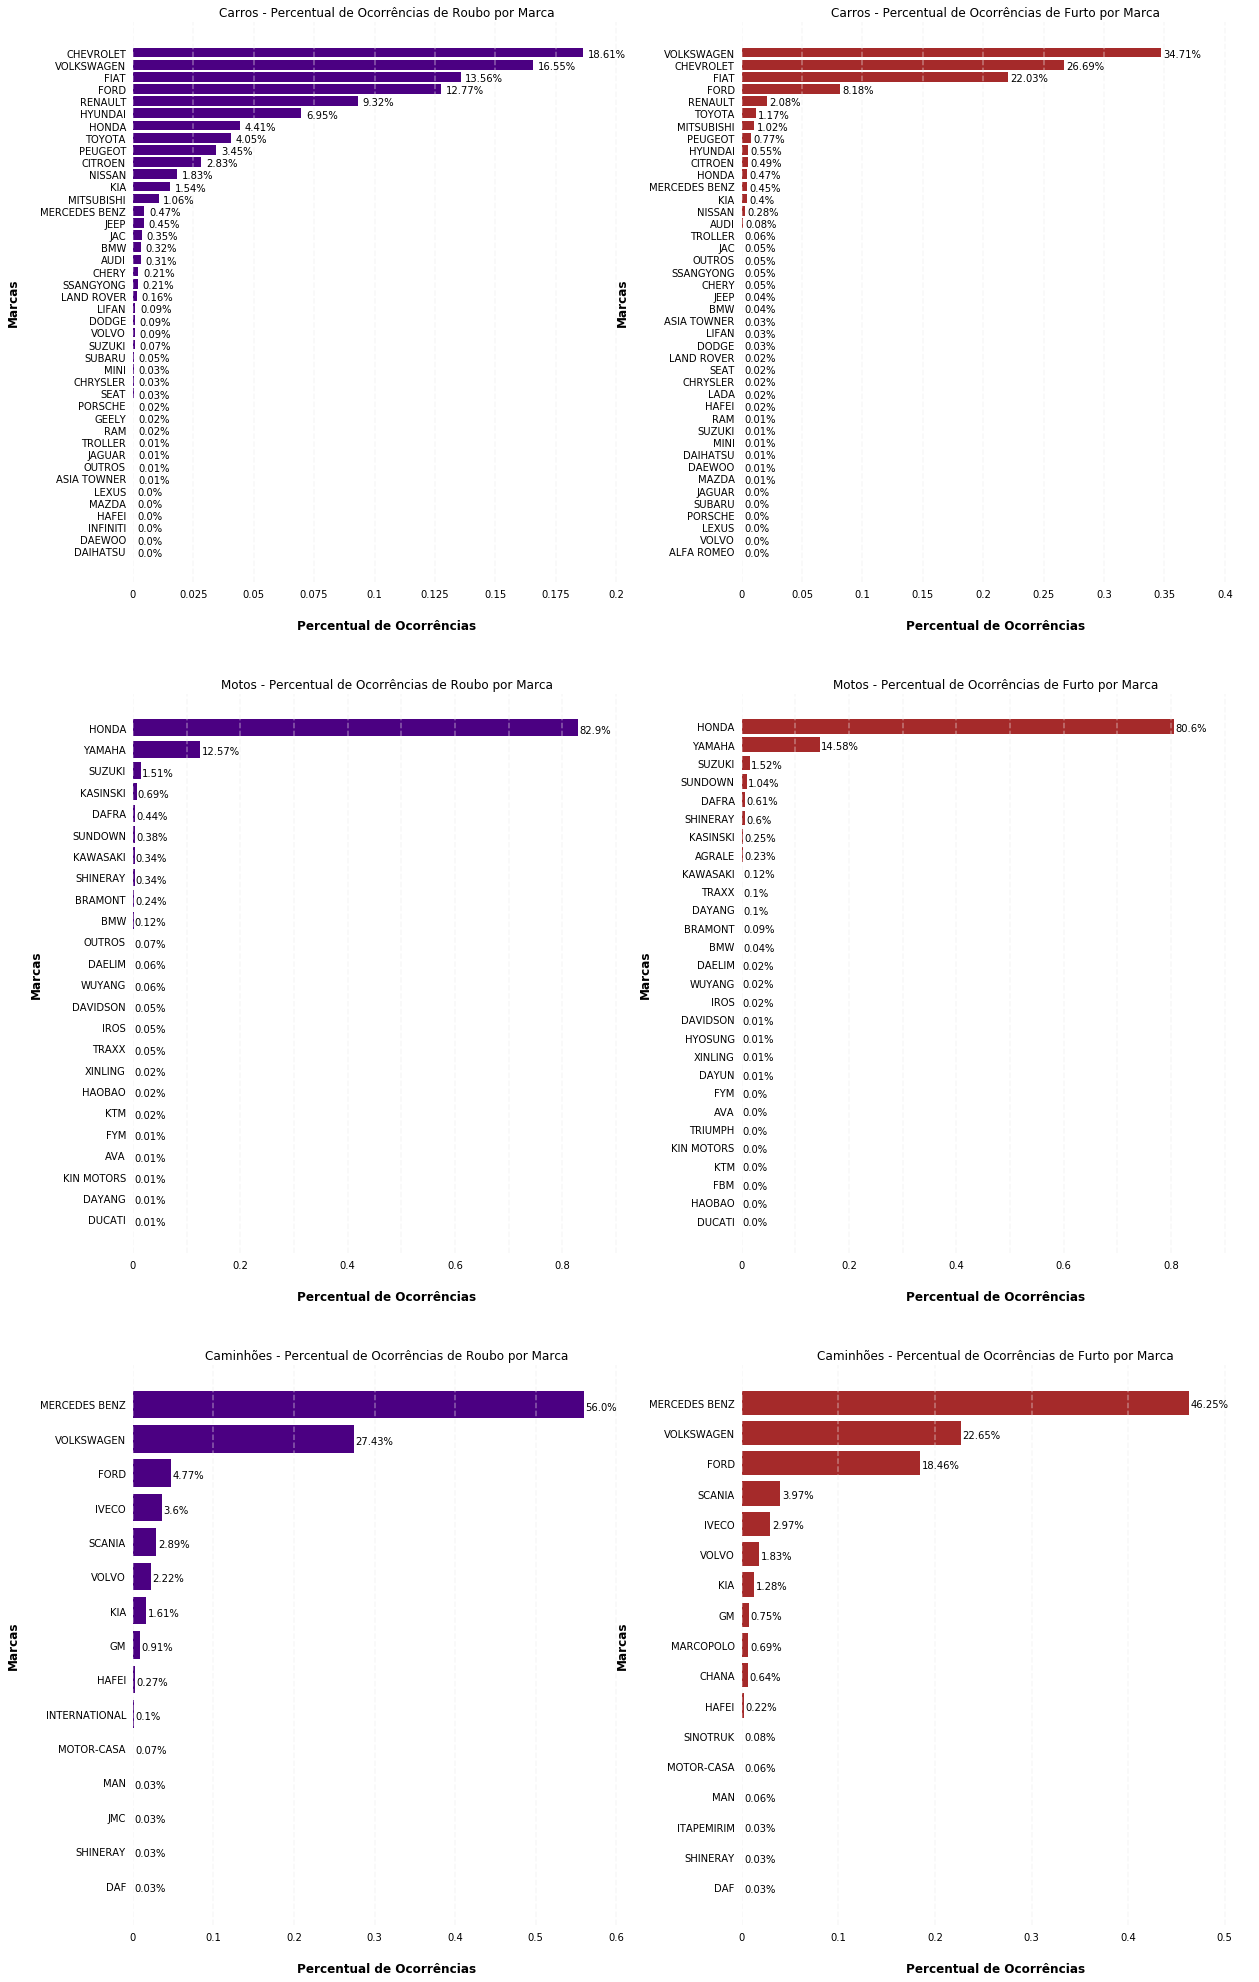

In [68]:
#https://g1.globo.com/carros/noticia/fiat-foi-a-marca-de-carros-que-mais-perdeu-espaco-com-a-crise.ghtml
fig, ax = plt.subplots(3,2, figsize=(20,35))
# fig.subplots_adjust(hspace=.2, wspace=0.4)

## Carros################################################
#Roubo
ax[0][0].set(title='Carros - Percentual de Ocorrências de Roubo por Marca')
bar1 = ax[0][0].barh(Carros_Marcas_Roubo.index, Carros_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][0].get_xticks()
for tick in vals:
    ax[0][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carros_Marcas_Roubo['Repres(%)']):
    ax[0][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[0][1].set(title='Carros - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[0][1].barh(Carros_Marcas_Furto.index, Carros_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][1].get_xticks()
for tick in vals:
    ax[0][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carros_Marcas_Furto['Repres(%)']):
    ax[0][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')

## Motos ################################################

#Roubo
ax[1][0].set(title='Motos - Percentual de Ocorrências de Roubo por Marca')
bar1 = ax[1][0].barh(Motos_Marcas_Roubo.index, Motos_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][0].get_xticks()
for tick in vals:
    ax[1][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Motos_Marcas_Roubo['Repres(%)']):
    ax[1][0].text(v+0.002, i -0.25, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[1][1].set(title='Motos - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[1][1].barh(Motos_Marcas_Furto.index, Motos_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][1].get_xticks()
for tick in vals:
    ax[1][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Motos_Marcas_Furto['Repres(%)']):
    ax[1][1].text(v+0.002, i -0.25, str(np.round(v*100,2))+"%", color='black')
    
## Camimhoes ################################################
#Roubo
ax[2][0].set(title='Caminhões - Percentual de Ocorrências de Roubo por Marca')
bar1 = ax[2][0].barh(Caminhoes_Marcas_Roubo.index, Caminhoes_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[2][0].spines['right'].set_visible(False)
ax[2][0].spines['top'].set_visible(False)
ax[2][0].spines['left'].set_visible(False)
ax[2][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][0].get_xticks()
for tick in vals:
    ax[2][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Caminhoes_Marcas_Roubo['Repres(%)']):
    ax[2][0].text(v+0.002, i -0.15, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[2][1].set(title='Caminhões - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[2][1].barh(Caminhoes_Marcas_Furto.index, Caminhoes_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[2][1].spines['right'].set_visible(False)
ax[2][1].spines['top'].set_visible(False)
ax[2][1].spines['left'].set_visible(False)
ax[2][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][1].get_xticks()
for tick in vals:
    ax[2][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Caminhoes_Marcas_Furto['Repres(%)']):
    ax[2][1].text(v+0.002, i -0.15, str(np.round(v*100,2))+"%", color='black')
    
fig.savefig("Graficos/Ocorrencias_por_Marca.png",bbox_inches="tight")

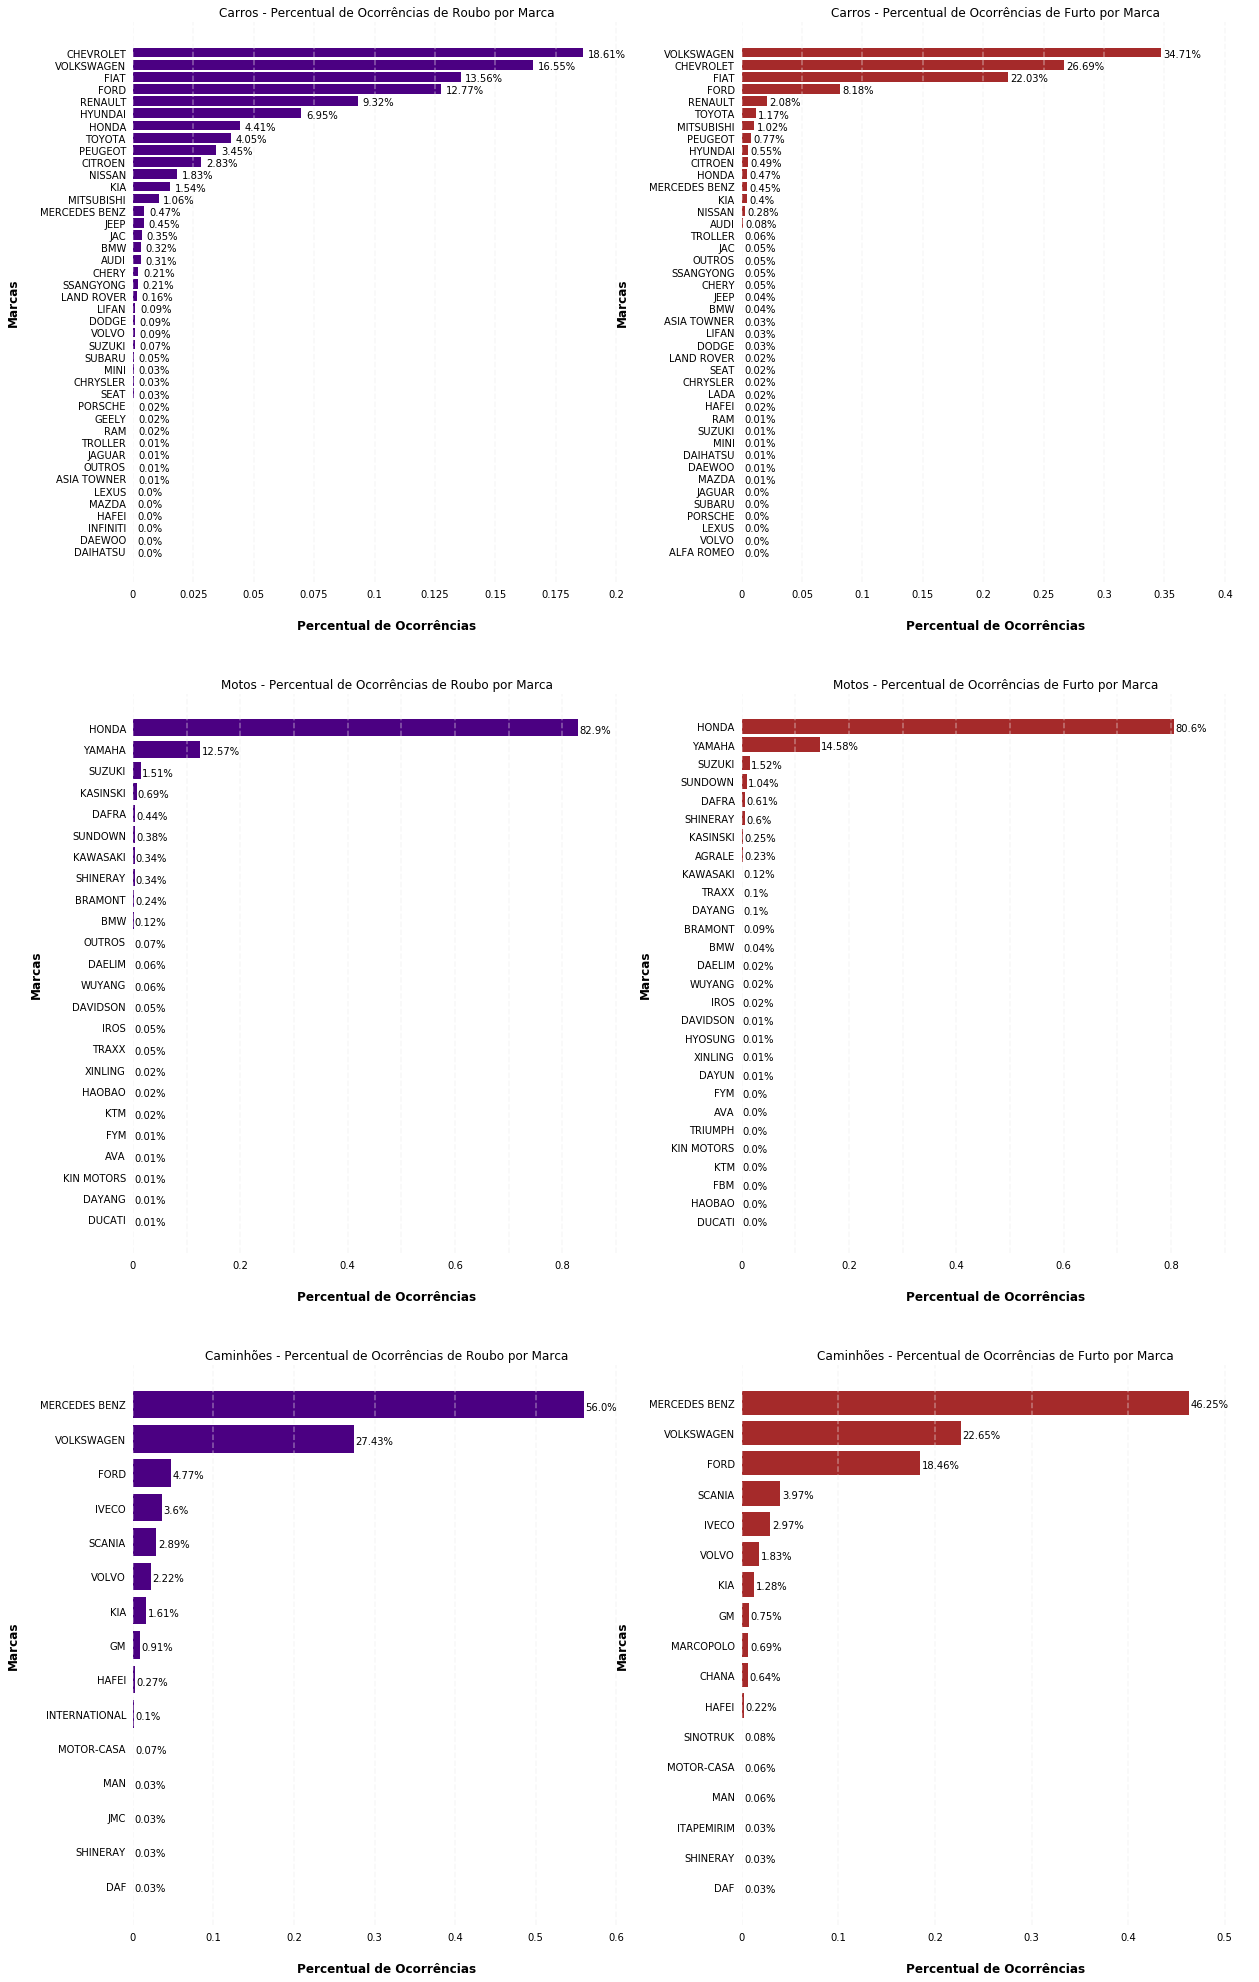

In [69]:
#https://g1.globo.com/carros/noticia/fiat-foi-a-marca-de-carros-que-mais-perdeu-espaco-com-a-crise.ghtml
fig, ax = plt.subplots(3,2, figsize=(20,35))
# fig.subplots_adjust(hspace=.2, wspace=0.4)

## Carros################################################
#Roubo
ax[0][0].set(title='Carros - Percentual de Ocorrências de Roubo por Marca')

bar1 = ax[0][0].barh(Carros_Marcas_Roubo.index, Carros_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][0].get_xticks()
for tick in vals:
    ax[0][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carros_Marcas_Roubo['Repres(%)']):
    ax[0][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[0][1].set(title='Carros - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[0][1].barh(Carros_Marcas_Furto.index, Carros_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][1].get_xticks()
for tick in vals:
    ax[0][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carros_Marcas_Furto['Repres(%)']):
    ax[0][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')

## Motos ################################################

#Roubo
ax[1][0].set(title='Motos - Percentual de Ocorrências de Roubo por Marca')
bar1 = ax[1][0].barh(Motos_Marcas_Roubo.index, Motos_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][0].get_xticks()
for tick in vals:
    ax[1][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Motos_Marcas_Roubo['Repres(%)']):
    ax[1][0].text(v+0.002, i -0.25, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[1][1].set(title='Motos - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[1][1].barh(Motos_Marcas_Furto.index, Motos_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][1].get_xticks()
for tick in vals:
    ax[1][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Motos_Marcas_Furto['Repres(%)']):
    ax[1][1].text(v+0.002, i -0.25, str(np.round(v*100,2))+"%", color='black')
    
## Camimhoes ################################################
#Roubo
ax[2][0].set(title='Caminhões - Percentual de Ocorrências de Roubo por Marca')
bar1 = ax[2][0].barh(Caminhoes_Marcas_Roubo.index, Caminhoes_Marcas_Roubo['Repres(%)'], color='indigo')

# Despine
ax[2][0].spines['right'].set_visible(False)
ax[2][0].spines['top'].set_visible(False)
ax[2][0].spines['left'].set_visible(False)
ax[2][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][0].get_xticks()
for tick in vals:
    ax[2][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][0].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Caminhoes_Marcas_Roubo['Repres(%)']):
    ax[2][0].text(v+0.002, i -0.15, str(np.round(v*100,2))+"%", color='black')
    
# #Roubo
ax[2][1].set(title='Caminhões - Percentual de Ocorrências de Furto por Marca')
bar1 = ax[2][1].barh(Caminhoes_Marcas_Furto.index, Caminhoes_Marcas_Furto['Repres(%)'], color='brown')

# Despine
ax[2][1].spines['right'].set_visible(False)
ax[2][1].spines['top'].set_visible(False)
ax[2][1].spines['left'].set_visible(False)
ax[2][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][1].get_xticks()
for tick in vals:
    ax[2][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][1].set_ylabel("Marcas", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Caminhoes_Marcas_Furto['Repres(%)']):
    ax[2][1].text(v+0.002, i -0.15, str(np.round(v*100,2))+"%", color='black')
    
fig.savefig("Graficos/Ocorrencias_por_Marca.png",bbox_inches="tight")

### Carros - Classificação por Marca e Modelo

In [70]:
Carros['Modelo'] = np.nan
# Motos.loc[(Motos['Marca Veículo'].str.contains('AVA/')), 'Fabricante'] = 'AVA'
# Motos.loc[Motos['Fabricante'].isna()] = 'OUTROS'


In [71]:
def showNaRows(Fabricante):
    display(Carros[(Carros['Fabricante'] == Fabricante) & (Carros['Modelo'].isna())])
    return len(Carros[(Carros['Fabricante'] == Fabricante) & (Carros['Modelo'].isna())])


def setFabModelo(df, Fabricante, Modelo):
    df.loc[(df['Fabricante'] == Fabricante) & (Carros['Marca Veículo'].str.contains(Modelo)) , 'Modelo'] = Modelo
    return df

In [72]:
#CHEVROLET
CHEV_MODELS = ['KADETT', 'ONIX', 'CORSA', 'CELTA', 'MONZA', 'PRISMA', 'CHEVETTE', 'S10', 'ZAFIRA', 'ASTRA', 'MERIVA', \
               'CLASSIC', 'SPIN', 'COBALT', 'AGILE', 'CRUZE', 'BLAZER', 'VECTRA','OPALA', 'D20', 'OMEGA', 'MONTANA','CAPTIVA', \
               'D10', 'D40', 'CHEVY', 'SONIC', 'CARAVAN', 'SILVERADO', 'TRACKER', 'C20', 'BOLT', 'BONANZA', 'CAMARO', 'EQUINOX', \
               'IPANEMA', 'IMPALA', 'VERANEIO', 'MALIBU', 'A10', 'A20', 'TIGRA', 'C10', 'C15', 'C14', 'CHEVROLET TRAFIC', 'CALIBRA',\
               'BRASINCA', 'CORVETTE']

for modelo in CHEV_MODELS:
    setFabModelo(Carros, 'CHEVROLET', modelo)


Carros[(Carros['Fabricante'] == 'CHEVROLET') & (Carros['Modelo'].isna())] = 'OUTROS'

#VOLKSWAGEN

VOLKS_MODELS = ['GOLF', 'GOL', 'PASSAT', 'SAVEIRO', 'POLO', 'AMAROK', 'JETTA', 'SANTANA', 'TIGUAN', 'KOMBI', 'UP', 'BORA', \
                'BRASILIA', 'FOX', 'FUSCA', 'VOYAGE', 'VIRTUS', 'PARATI', 'POINTER', 'LOGUS', 'APOLLO', 'QUANTUM', 'VARIANT',\
                'SPACECROSS', 'BEETLE', 'PUMA', 'BUGGY', 'TOUAREG', 'BUGRE', 'VAN', 'DACO', 'UGGY', 'TL']

for modelo in VOLKS_MODELS:
    setFabModelo(Carros, 'VOLKSWAGEN', modelo)
    
Carros[(Carros['Fabricante'] == 'VOLKSWAGEN') & (Carros['Modelo'].isna())] = 'OUTROS'

#FIAT
FIAT_MODELS = ['PALIO','ARGO','GRAN SIENA','SIENA','UNO','CRONOS','MOBI','DOBL', 'BRAVO','ELBA', 'PUNTO', \
               'TEMPRA', 'WEEKEND ', 'FIORINO', 'IDEA', 'TIPO', 'MAREA', 'STRADA', 'LINEA', 'PREMIO', 'FREEMONT', \
               'STILO', 'BRAVA', 'DUCATO', '500', '147', '190', 'TORO', 'FIAT/PICK-UP', 'OGGI', 'FIAT/PICK UP', 'DUNA']

for modelo in FIAT_MODELS:
    setFabModelo(Carros, 'FIAT', modelo)
    
Carros[(Carros['Fabricante'] == 'FIAT') & (Carros['Modelo'].isna())] = 'OUTROS'

#FORD
FORD_MODELS = ['KA', 'FIESTA', 'ECOSPORT', 'FOCUS', 'FUSION', 'EDGE', 'RANGER', 'ESCORT', 'BELINA', 'DEL REY', \
               'VERSAILLES', 'VERONA', 'CORCEL', 'EXPLORER', 'F350', 'F250', 'PAMPA', 'MONDEO', 'F1000', 'ROYALE', 'COURIER', 'F100', \
              'RURAL','DESERTER', 'F75', 'TRANSIT', 'ENGERAUTO', 'INDESTCAR', 'CHAPEMEC', 'DEMEC', 'MAVERICK', 'GALAXIE', \
              'TAURUS', 'AERO WILLYS', 'F 350']

for modelo in FORD_MODELS:
    setFabModelo(Carros, 'FORD', modelo)
    
Carros[(Carros['Fabricante'] == 'FORD') & (Carros['Modelo'].isna())] = 'OUTROS'

#RENAULT
RENAULT_MODELS = ['DUSTER', 'SANDERO','KWID', 'LOGAN', 'SANDERO','FLUENCE', 'CAPTUR', 'KANGOO', 'CLIO', 'SYMBOL', 'SCENIC', 'MEGANE', 'MASTER', \
                 'CLIO', 'SYMBOL', 'SCENIC', 'MEGANE', 'MASTER', 'OROCH', 'KGOO','WINGO', 'RENAULT TRAFIC', 'RENAULT 19', 'RENAULT EXPRESS' \
                 ]

for modelo in RENAULT_MODELS:
    setFabModelo(Carros, 'RENAULT', modelo)
    
Carros[(Carros['Fabricante'] == 'RENAULT') & (Carros['Modelo'].isna())] = 'OUTROS'

#HYUNDAI
HYUNDAI_MODELS = ['HB20', 'CRETA', 'TUCSON', 'AZERA', 'ELANTRA', 'IX35', 'SONATA', 'SANTA FE', 'I30', 'VELOSTER', 'VERACRUZ', 'ATOS',\
                  'SANTAFE', 'ACCENT', 'GENESIS', 'EXCEL', 'MATRIX']

for modelo in HYUNDAI_MODELS:
    setFabModelo(Carros, 'HYUNDAI', modelo)

Carros[(Carros['Fabricante'] == 'HYUNDAI') & (Carros['Modelo'].isna())] = 'OUTROS'

#HONDA
HONDA_MODELS = ['CIVIC', 'FIT', 'WR-V', 'CITY', 'HR-V', 'ACCORD', 'CR-V']

for modelo in HONDA_MODELS:
    setFabModelo(Carros, 'HONDA', modelo)
    
#TOYOTA
TOYOTA_MODELS = ['COROLLA', 'RAV4', 'CAMRY', 'PRIUS', 'YARIS', 'ETIOS', 'SW4', 'HILUX', 'FIELDER', 'BAND', 'LAND CRUISER', 'CORONA', 'PASEO']

for modelo in TOYOTA_MODELS:
    setFabModelo(Carros, 'TOYOTA', modelo)
    
Carros[(Carros['Fabricante'] == 'TOYOTA') & (Carros['Modelo'].isna())] = 'OUTROS'

#PEGEOUT
PEUGEOT_MODELS = ['308', '3008', '208', '207', '2008', '5008', '408','307','206', 'BOXER', '306', '508', \
                 '407', 'PART F 800K', '504', 'HOGGAR', 'PARTNER', '106', '607', '405',\
                 '205','PART F 625K', '406', 'EXPERT BUSINPK']

for modelo in PEUGEOT_MODELS:
     setFabModelo(Carros, 'PEUGEOT', modelo)
        
Carros[(Carros['Fabricante'] == 'PEGEOUT') & (Carros['Modelo'].isna())] = 'OUTROS'

#CITROEN
CITROEN_MODELS = ['GRAND PICASSO', 'PICASSO', 'CACTUS', 'LOUNGE', 'AIRCROSS', 'C3', 'C4', 'JUMPER', 'BERLINGO', 'C5', 'XSARA', 'DS4', 'DS3', 'ZX', 'DS5', 'XANT']

for modelo in CITROEN_MODELS:
     setFabModelo(Carros, 'CITROEN', modelo)

Carros[(Carros['Fabricante'] == 'CITROEN') & (Carros['Modelo'].isna())] = 'OUTROS'

#NISSAN
NISSAN_MODELS = ['MARCH', 'SENTRA', 'VERSA', 'KICKS', 'FRONTIER', 'LEAF', 'LIVINA', 'TIIDA', 'D21', 'PATHFINDER', 'XTRAIL', 'XTER', 'PRIMERA', 'MURANO']

for modelo in NISSAN_MODELS:
     setFabModelo(Carros, 'NISSAN', modelo)

Carros[(Carros['Fabricante'] == 'NISSAN') & (Carros['Modelo'].isna())] = 'OUTROS'

#KIA
KIA_MODELS = ['SPORTAGE', 'SORENTO', 'CERATO', 'STINGER', 'SOUL','CARNIVAL','PICANTO', 'CERES', 'BESTA', 'SEPHIA', 'CADENZA', 'CARENS', 'MAGENTIS','CLARUS', 'CLARUS', 'MOHAVE', 'OPTIMA', 'OPIRUS']

for modelo in KIA_MODELS:
     setFabModelo(Carros, 'KIA', modelo)

Carros[(Carros['Fabricante'] == 'KIA') & (Carros['Modelo'].isna())] = 'OUTROS'

#MITSUBISHI
MIT_MODELS = ['PAJERO', 'LANCER', 'ASX', 'OUTLANDER', 'ECLIPSE', 'L200', 'AIRTREK', 'L300', 'TRITON']

for modelo in MIT_MODELS:
     setFabModelo(Carros, 'MITSUBISHI', modelo)

Carros[(Carros['Fabricante'] == 'MITSUBISHI') & (Carros['Modelo'].isna())] = 'OUTROS'

#MERCEDEZ BENS
MERC_MODELS = ['CLA', 'GLS', 'ML', 'CLS', 'GLA', 'MB', 'SLK', 'GLC', 'GLE', 'GLK', '311CDI' ]


# # df.loc[(df['Fabricante'] == Fabricante) & (Carros['Marca Veículo'].str.contains(Modelo)) , 'Modelo'] = Modelo

Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('B 200')) \
           | (Carros['Marca Veículo'].str.contains('B 170')) \
           | (Carros['Marca Veículo'].str.contains('B170')) \
           | (Carros['Marca Veículo'].str.contains('B 180')) \
           | (Carros['Marca Veículo'].str.contains('B180')) \
           | (Carros['Marca Veículo'].str.contains('B200')) ) , 'Modelo'] = 'B'


Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('E250')) \
            | (Carros['Marca Veículo'].str.contains('E 320')) \
            | (Carros['Marca Veículo'].str.contains('E320')) \
            | (Carros['Marca Veículo'].str.contains('E 250')) ) , 'Modelo'] = 'E'

Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('C 180')) \
            | (Carros['Marca Veículo'].str.contains('C 200')) \
            | (Carros['Marca Veículo'].str.contains('C200')) \
            | (Carros['Marca Veículo'].str.contains('C230')) \
            | (Carros['Marca Veículo'].str.contains('C 230')) \
            | (Carros['Marca Veículo'].str.contains('C 250')) \
            | (Carros['Marca Veículo'].str.contains('C250')) \
            | (Carros['Marca Veículo'].str.contains('C450')) \
            | (Carros['Marca Veículo'].str.contains('C 450')) \
            | (Carros['Marca Veículo'].str.contains('C 320')) \
            | (Carros['Marca Veículo'].str.contains('C320')) \
            | (Carros['Marca Veículo'].str.contains('C280')) \
            | (Carros['Marca Veículo'].str.contains('C 280')) \
            | (Carros['Marca Veículo'].str.contains('C180')) ) , 'Modelo'] = 'C'

Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('SPR')) \
            | (Carros['Marca Veículo'].str.contains('SPRT')) ) , 'Modelo'] = 'SPRINTER'

Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('A 160')) \
            | (Carros['Marca Veículo'].str.contains('A 190')) \
            | (Carros['Marca Veículo'].str.contains('A 200')) \
            | (Carros['Marca Veículo'].str.contains('A200')) \
            | (Carros['Marca Veículo'].str.contains('A160')) \
            | (Carros['Marca Veículo'].str.contains('A190')) ) , 'Modelo'] = 'A'

for modelo in MERC_MODELS:
     setFabModelo(Carros, 'MERCEDES BENZ', modelo)

Carros.loc[(Carros['Fabricante'] == 'MERCEDES BENZ') &
           ((Carros['Marca Veículo'].str.contains('MERCEDES BENZ')) ), 'Modelo'] = 'OUTROS'

Carros[(Carros['Fabricante'] == 'MERCEDES BENZ') & (Carros['Modelo'].isna())] = 'OUTROS'

#JEEP
JEEP_MODELS = ['RENEGADE', 'COMPASS', 'CHEROKEE']

for modelo in JEEP_MODELS:
     setFabModelo(Carros, 'JEEP', modelo)

Carros[(Carros['Fabricante'] == 'JEEP') & (Carros['Modelo'].isna())] = 'OUTROS'

#JAC
#JAC
JAC_MODELS = ['J2', 'J3', 'J6', 'T5', 'J5', 'T6', 'T40']

for modelo in JAC_MODELS:
     setFabModelo(Carros, 'JAC', modelo)
        
#BMW
BMW_MODELS = ['X6', 'X3', 'X4', 'X1', 'Z4', 'X5', 'M6']

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('325')) \
            | (Carros['Marca Veículo'].str.contains('320')) \
            | (Carros['Marca Veículo'].str.contains('318')) \
            | (Carros['Marca Veículo'].str.contains('323')) \
            | (Carros['Marca Veículo'].str.contains('328')) \
            | (Carros['Marca Veículo'].str.contains('335')) \
            | (Carros['Marca Veículo'].str.contains('316')) \
            | (Carros['Marca Veículo'].str.contains('330')) ) , 'Modelo'] = 'SERIE 3'

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('116')) \
            | (Carros['Marca Veículo'].str.contains('118')) \
            | (Carros['Marca Veículo'].str.contains('135')) \
            | (Carros['Marca Veículo'].str.contains('125')) \
            | (Carros['Marca Veículo'].str.contains('130')) \
            | (Carros['Marca Veículo'].str.contains('120')) \
            ) , 'Modelo'] = 'SERIE 1'

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('550')) \
            | (Carros['Marca Veículo'].str.contains('530')) \
            | (Carros['Marca Veículo'].str.contains('535')) \
            | (Carros['Marca Veículo'].str.contains('528')) \
             ) , 'Modelo'] = 'SERIE 5'

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('640')) \
            | (Carros['Marca Veículo'].str.contains('645')) \
            | (Carros['Marca Veículo'].str.contains('650')) \
             ) , 'Modelo'] = 'SERIE 6'

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('225')) \
             ) , 'Modelo'] = 'SERIE 2'

Carros.loc[(Carros['Fabricante'] == 'BMW') &
           ((Carros['Marca Veículo'].str.contains('428')) \
             ) , 'Modelo'] = 'SERIE 4'

for modelo in BMW_MODELS:
     setFabModelo(Carros, 'BMW', modelo)
        
#AUDI
AUDI_MODELS = ['A4', 'A3', 'A6', 'Q3', 'Q5', 'R8', 'TT', 'A1', 'A5', 'Q7', 'A7', 'RS6', 'RS4', 'RS5', 'RS7', 'S3']

for modelo in AUDI_MODELS:
     setFabModelo(Carros, 'AUDI', modelo)

Carros[(Carros['Fabricante'] == 'AUDI') & (Carros['Modelo'].isna())] = 'OUTROS'

#SSANGYONG
SSAN_MODELS = ['ACTYON', 'KORANDO', 'TIVOLI', 'XLV', 'KYRONM', 'REXTON', 'MUSSO']

for modelo in SSAN_MODELS:
     setFabModelo(Carros, 'SSANGYONG', modelo)
        
#CHERY
CHERY_MODELS = ['QQ', 'TIGGO2', 'FACE', 'TIGGO', 'CIELO', 'CELER', 'S18', 'A316']

for modelo in CHERY_MODELS:
     setFabModelo(Carros, 'CHERY', modelo)

#LAND ROVER
LAND_MODELS = ['EVOQUE', 'DISC', 'FREELANDER', 'DEFENDER']

Carros.loc[(Carros['Fabricante'] == 'LAND ROVER') &
           ((Carros['Marca Veículo'].str.contains('ROVER')) \
            | (Carros['Marca Veículo'].str.contains('R.R.')) \
            | (Carros['Marca Veículo'].str.contains('R.R')) \
            ) , 'Modelo'] = 'ROVER'

for modelo in LAND_MODELS:
     setFabModelo(Carros, 'LAND ROVER', modelo)

#LIFAN
LIFAN_MODELS = ['X60', '320', '620', 'LF110', '530', 'FOISON']


for modelo in LIFAN_MODELS:
     setFabModelo(Carros, 'LIFAN', modelo)

#VOLVO
VOLVO_MODELS = ['S40', 'S60', 'V70', 'XC60', 'C30', 'XC70', 'V40', 'V60']


for modelo in VOLVO_MODELS:
     setFabModelo(Carros, 'VOLVO', modelo)
        
Carros[(Carros['Fabricante'] == 'VOLVO') & (Carros['Modelo'].isna())] = 'OUTROS'

Carros.loc[Carros['Modelo'].isna(), 'Modelo'] = 'OUTROS'
#display(showNaRows('VOLVO')/len(Carros[Carros['Fabricante']=='VOLVO']))

In [73]:
Carros_Ano_Modelo = Carros[['index', 'year','Fato','Fabricante', 'Modelo']].groupby(['year','Fabricante', 'Fato','Modelo']).agg(['count'])
Carros_Ano_Modelo = Carros_Ano_Modelo.reset_index()
Carros_Ano_Modelo.columns = ['Year', 'Fabricante', 'Fato','Modelo', 'Ocorrencia']

def Carro_Ano_Modelo_Oco(year, fato):
    df_buf = Carros_Ano_Modelo[(Carros_Ano_Modelo['Year'] == year) &(Carros_Ano_Modelo['Fato'] == fato)].sort_values(by=['Ocorrencia'], ascending=True)
    df_buf['Repres(%)'] = df_buf['Ocorrencia']/df_buf['Ocorrencia'].sum()
    df_buf['Cum_Repre'] = df_buf['Repres(%)'].cumsum()
    df_buf = df_buf.set_index('Modelo')
    return df_buf[df_buf['Cum_Repre']>= 0.20]

display(Carro_Ano_Modelo_Oco(2018, 'Roubo'))

,Year,Fabricante,Fato,Ocorrencia,Repres(%),Cum_Repre
Modelo,,,,,,
206,2018,PEUGEOT,Roubo,75,0.004998,0.204865
MERIVA,2018,CHEVROLET,Roubo,77,0.005132,0.209997
RANGER,2018,FORD,Roubo,81,0.005398,0.215395
SPORTAGE,2018,KIA,Roubo,84,0.005598,0.220993
I30,2018,HYUNDAI,Roubo,88,0.005865,0.226858
TUCSON,2018,HYUNDAI,Roubo,89,0.005931,0.232789
PUNTO,2018,FIAT,Roubo,90,0.005998,0.238787
SAVEIRO,2018,VOLKSWAGEN,Roubo,90,0.005998,0.244785
TORO,2018,FIAT,Roubo,91,0.006065,0.250850


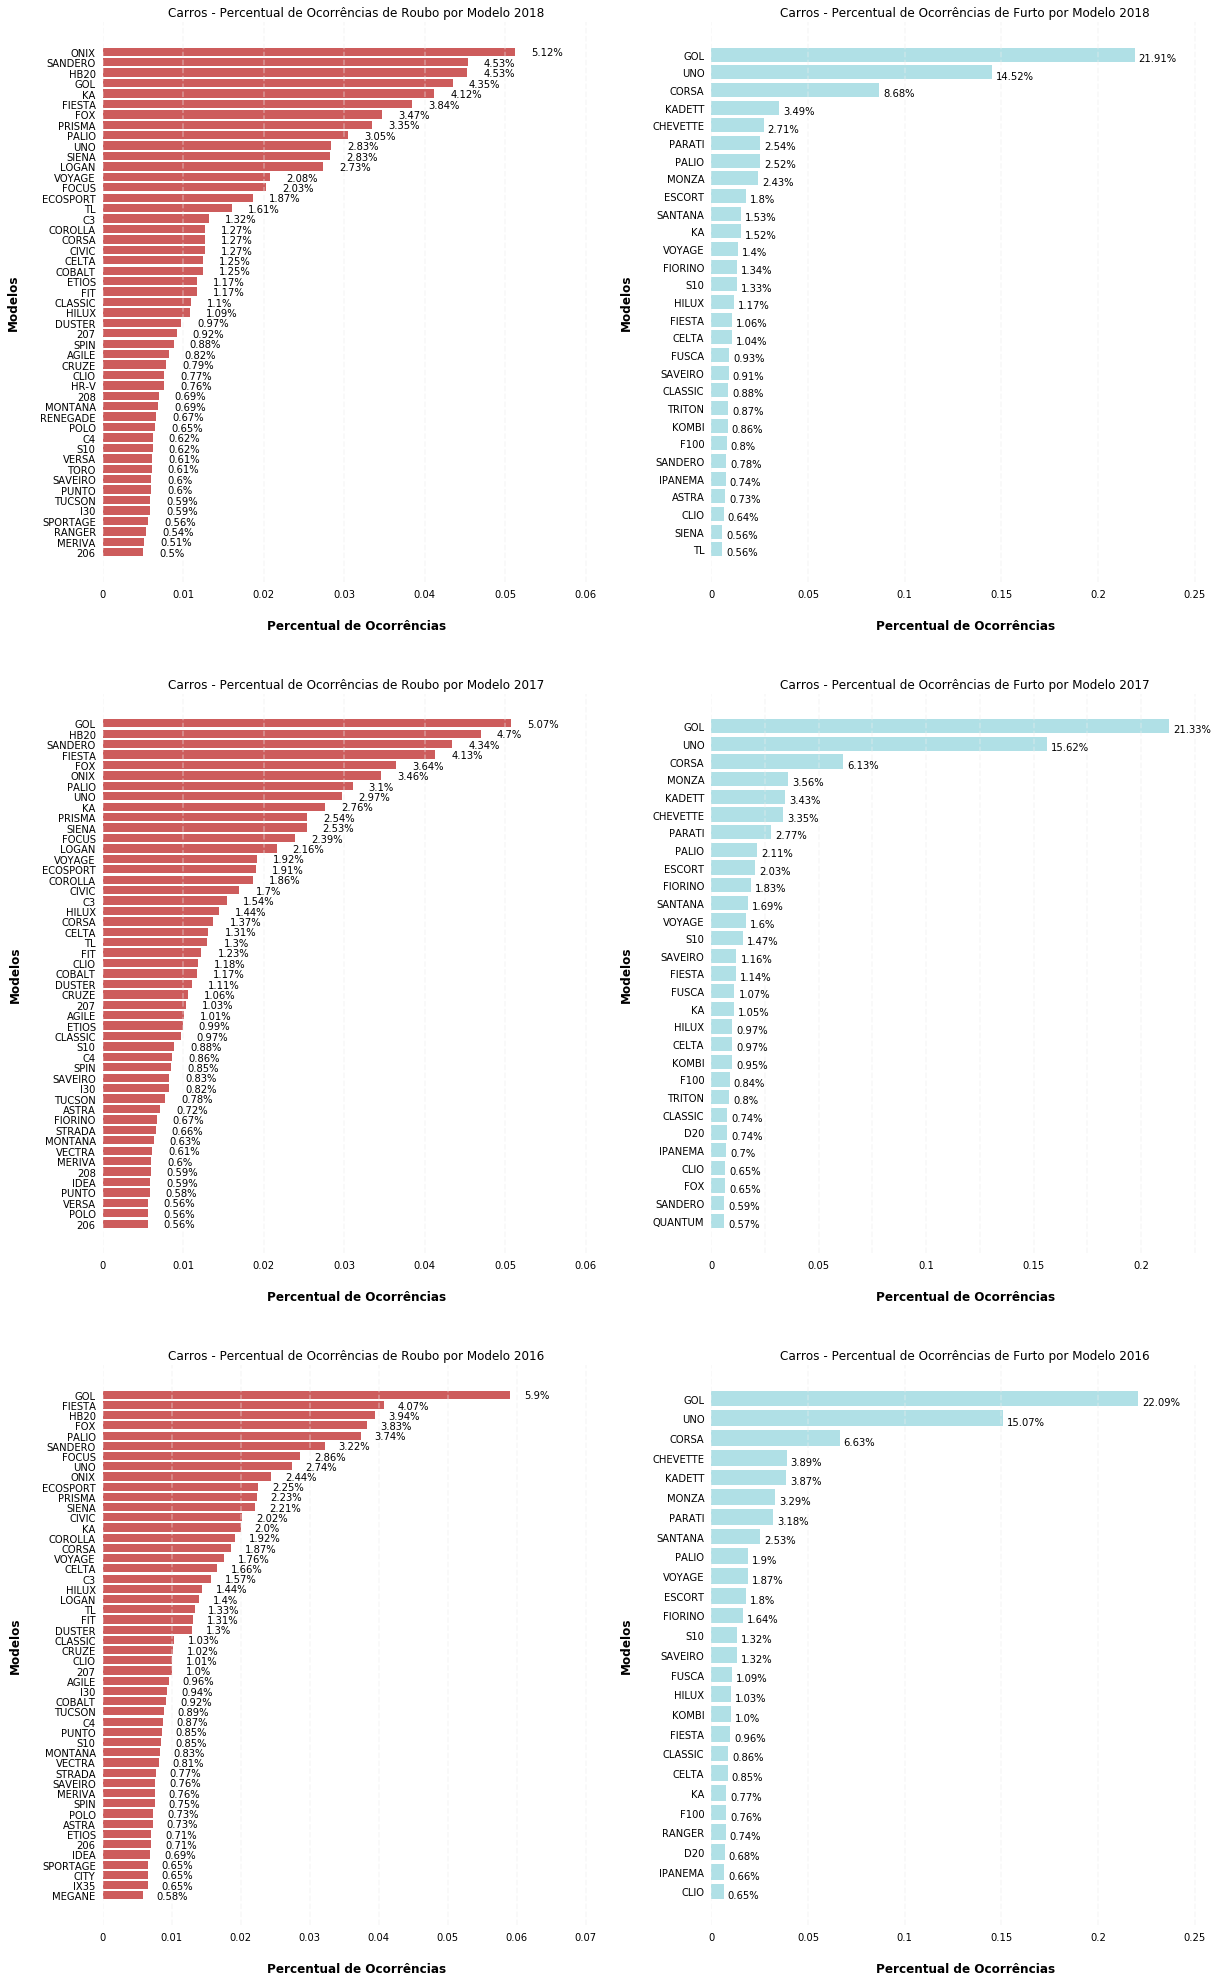

In [74]:
fig, ax = plt.subplots(3,2, figsize=(20,35))
## Carros################################################
## 2018 ################################################
#Roubo
ax[0][0].set(title='Carros - Percentual de Ocorrências de Roubo por Modelo 2018')
bar1 = ax[0][0].barh(Carro_Ano_Modelo_Oco(2018, 'Roubo').index, Carro_Ano_Modelo_Oco(2018, 'Roubo')['Repres(%)'], color='indianred')

# Despine
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][0].get_xticks()
for tick in vals:
    ax[0][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][0].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2018, 'Roubo')['Repres(%)']):
    ax[0][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[0][1].set(title='Carros - Percentual de Ocorrências de Furto por Modelo 2018')
bar1 = ax[0][1].barh(Carro_Ano_Modelo_Oco(2018, 'Furto').index, Carro_Ano_Modelo_Oco(2018, 'Furto')['Repres(%)'], color='powderblue')

# Despine
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0][1].get_xticks()
for tick in vals:
    ax[0][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0][1].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2018, 'Furto')['Repres(%)']):
    ax[0][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
## Carros################################################
## 2017 ################################################
#Roubo
ax[1][0].set(title='Carros - Percentual de Ocorrências de Roubo por Modelo 2017')
bar1 = ax[1][0].barh(Carro_Ano_Modelo_Oco(2017, 'Roubo').index, Carro_Ano_Modelo_Oco(2017, 'Roubo')['Repres(%)'], color='indianred')

# Despine
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][0].get_xticks()
for tick in vals:
    ax[1][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][0].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2017, 'Roubo')['Repres(%)']):
    ax[1][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[1][1].set(title='Carros - Percentual de Ocorrências de Furto por Modelo 2017')
bar1 = ax[1][1].barh(Carro_Ano_Modelo_Oco(2017, 'Furto').index, Carro_Ano_Modelo_Oco(2017, 'Furto')['Repres(%)'], color='powderblue')

# Despine
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1][1].get_xticks()
for tick in vals:
    ax[1][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1][1].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2017, 'Furto')['Repres(%)']):
    ax[1][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
## Carros################################################
## 2016 ################################################
#Roubo
ax[2][0].set(title='Carros - Percentual de Ocorrências de Roubo por Modelo 2016')
bar1 = ax[2][0].barh(Carro_Ano_Modelo_Oco(2016, 'Roubo').index, Carro_Ano_Modelo_Oco(2016, 'Roubo')['Repres(%)'], color='indianred')

# Despine
ax[2][0].spines['right'].set_visible(False)
ax[2][0].spines['top'].set_visible(False)
ax[2][0].spines['left'].set_visible(False)
ax[2][0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][0].get_xticks()
for tick in vals:
    ax[2][0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][0].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2016, 'Roubo')['Repres(%)']):
    ax[2][0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[2][1].set(title='Carros - Percentual de Ocorrências de Furto por Modelo 2016')
bar1 = ax[2][1].barh(Carro_Ano_Modelo_Oco(2016, 'Furto').index, Carro_Ano_Modelo_Oco(2016, 'Furto')['Repres(%)'], color='powderblue')

# Despine
ax[2][1].spines['right'].set_visible(False)
ax[2][1].spines['top'].set_visible(False)
ax[2][1].spines['left'].set_visible(False)
ax[2][1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[2][1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[2][1].get_xticks()
for tick in vals:
    ax[2][1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[2][1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[2][1].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[2][1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2016, 'Furto')['Repres(%)']):
    ax[2][1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
fig.savefig("Graficos/Ocorrencias_por_Modelo.png",bbox_inches="tight")

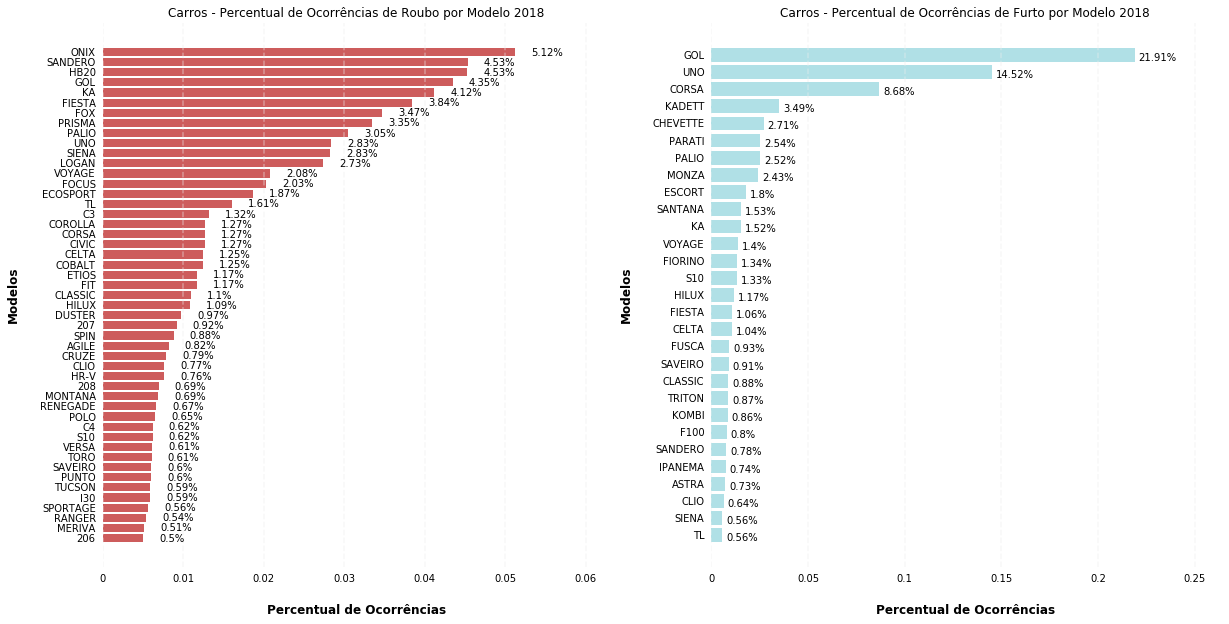

In [75]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
## Carros################################################
## 2018 ################################################
#Roubo
ax[0].set(title='Carros - Percentual de Ocorrências de Roubo por Modelo 2018')
bar1 = ax[0].barh(Carro_Ano_Modelo_Oco(2018, 'Roubo').index, Carro_Ano_Modelo_Oco(2018, 'Roubo')['Repres(%)'], color='indianred')

# Despine
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

# Switch off ticks
ax[0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[0].get_xticks()
for tick in vals:
    ax[0].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[0].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[0].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[0].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2018, 'Roubo')['Repres(%)']):
    ax[0].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')
    
# #Furto
ax[1].set(title='Carros - Percentual de Ocorrências de Furto por Modelo 2018')
bar1 = ax[1].barh(Carro_Ano_Modelo_Oco(2018, 'Furto').index, Carro_Ano_Modelo_Oco(2018, 'Furto')['Repres(%)'], color='powderblue')

# Despine
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

# Switch off ticks
ax[1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax[1].get_xticks()
for tick in vals:
    ax[1].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax[1].set_xlabel("Percentual de Ocorrências", labelpad=20, weight='bold', size=12)   
# autolabel(bar1, 0)

# Set y-axis label
ax[1].set_ylabel("Modelos", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax[1].xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(Carro_Ano_Modelo_Oco(2018, 'Furto')['Repres(%)']):
    ax[1].text(v+0.002, i -0.35, str(np.round(v*100,2))+"%", color='black')

fig.savefig("Graficos/Ocorrencias_por_Modelo_2018.png",bbox_inches="tight")

In [76]:
# display(Carros.loc[Carros['Município']=="PORTO ALEGRE",['index','Ano Fabricação', 'Fabricante', 'Modelo']].head(100))
Carros.loc[Carros['Município']=="PORTO ALEGRE",['index','Ano Fabricação', 'Fabricante', 'Modelo']].to_csv("carros.csv",index=False)

### Análise Bairros de POA por Categoria de Veiculos

In [77]:
def Cat_Bairro_Fato(df, fato, year):
    df2 = df[(df['Fato']==fato) & (df['year'] == year)].sort_values(by=['ocorrencias'], ascending=True)
    df2['Repres(%)'] = df2['ocorrencias']/df2['ocorrencias'].sum()
    df2['Cum_Repre'] = df2['Repres(%)'].cumsum()
    df2 = df2.set_index('Bairro')
    return df2[df2['Cum_Repre']>= 0.20]


#Carros por Bairro
POA_Carros_Bairros = (POA[POA['index'].isin(Carros['index'])])[['index', 'Bairro','Fato', 'year']].groupby(['Bairro','Fato', 'year']).agg(['count'])
POA_Carros_Bairros = POA_Carros_Bairros.reset_index()
POA_Carros_Bairros.columns = ['Bairro', 'Fato', 'year', 'ocorrencias']

POA_Motos_Bairros = (POA[POA['index'].isin(Motos['index'])])[['index', 'Bairro','Fato', 'year']].groupby(['Bairro','Fato', 'year']).agg(['count'])
POA_Motos_Bairros = POA_Motos_Bairros.reset_index()
POA_Motos_Bairros.columns = ['Bairro', 'Fato', 'year', 'ocorrencias']

POA_Caminhoes_Bairros = (POA[POA['index'].isin(Caminhoes['index'])])[['index', 'Bairro','Fato', 'year']].groupby(['Bairro','Fato', 'year']).agg(['count'])
POA_Caminhoes_Bairros = POA_Caminhoes_Bairros.reset_index()
POA_Caminhoes_Bairros.columns = ['Bairro', 'Fato', 'year', 'ocorrencias']
# display(POA_Carros_Bairros)

Cat_Bairro_Fato(POA_Caminhoes_Bairros, 'Roubo', 2018)
#FAZER GRAFICOS
#VERIFICA

,Fato,year,ocorrencias,Repres(%),Cum_Repre
Bairro,,,,,
FARRAPOS,Roubo,2018,1,0.022727,0.204545
CRISTO REDENTOR,Roubo,2018,1,0.022727,0.227273
CASCATA,Roubo,2018,1,0.022727,0.250000
CAIS DO PORTO,Roubo,2018,1,0.022727,0.272727
HIGIENOPOLIS,Roubo,2018,1,0.022727,0.295455
VL STO AGOSTINHO,Roubo,2018,1,0.022727,0.318182
JARDIM SAO PEDRO,Roubo,2018,2,0.045455,0.363636
LOMBA DO PINHEIRO,Roubo,2018,2,0.045455,0.409091
PETROPOLIS,Roubo,2018,2,0.045455,0.454545


## Análise temporal por Região

In [78]:
Roubo_POA_year = year_series(POA[POA['Fato']=='Roubo'])
Furto_POA_year = year_series(POA[POA['Fato']=='Furto'])

Roubo_POA_year = Roubo_POA_year.to_frame('Roubo_POA').sort_index()
Furto_POA_year = Furto_POA_year.to_frame('Furto_POA').sort_index()

Roubo_RMP_year = year_series(RMP[RMP['Fato']=='Roubo'])
Furto_RMP_year = year_series(RMP[RMP['Fato']=='Furto'])

Roubo_RMP_year = Roubo_RMP_year.to_frame('Roubo_RMP').sort_index()
Furto_RMP_year = Furto_RMP_year.to_frame('Furto_RMP').sort_index()

Roubo_Interior_year = year_series(Interior[Interior['Fato']=='Roubo'])
Furto_Interior_year = year_series(Interior[Interior['Fato']=='Furto'])

Roubo_Interior_year = Roubo_Interior_year.to_frame('Roubo_Interior').sort_index()
Furto_Interior_year = Furto_Interior_year.to_frame('Furto_Interior').sort_index()

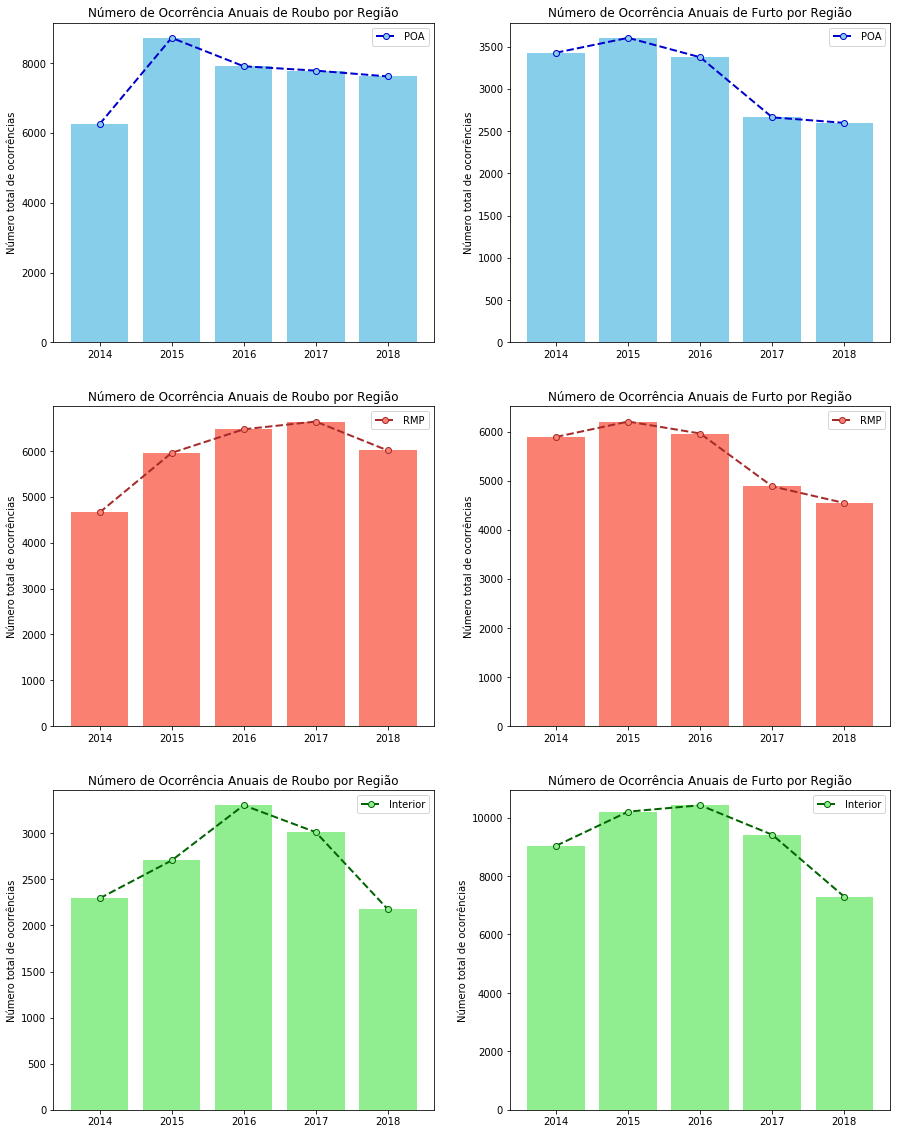

In [79]:
fig, ax = plt.subplots(3,2, figsize=(15,20))
fig.subplots_adjust(hspace=.2)

#POA
ax[0][0].set(title='Número de Ocorrência Anuais de Roubo por Região', ylabel = 'Número total de ocorrências')
ax[0][0].bar(Roubo_POA_year.index, Roubo_POA_year['Roubo_POA'], color='skyblue')
ax[0][0].plot(Roubo_POA_year.index, Roubo_POA_year, marker='o', markerfacecolor='skyblue', color='mediumblue', linewidth=2, linestyle='--')

ax[0][1].set(title='Número de Ocorrência Anuais de Furto por Região', ylabel = 'Número total de ocorrências')
ax[0][1].bar(Furto_POA_year.index, Furto_POA_year['Furto_POA'], color='skyblue')
ax[0][1].plot(Furto_POA_year.index, Furto_POA_year, marker='o', markerfacecolor='skyblue', color='mediumblue', linewidth=2, linestyle='--')

#RMP
ax[1][0].set(title='Número de Ocorrência Anuais de Roubo por Região', ylabel = 'Número total de ocorrências')
ax[1][0].bar(Roubo_RMP_year.index, Roubo_RMP_year['Roubo_RMP'], color='salmon')
ax[1][0].plot(Roubo_RMP_year.index, Roubo_RMP_year, marker='o', markerfacecolor='salmon', color='brown', linewidth=2, linestyle='--')

ax[1][1].set(title='Número de Ocorrência Anuais de Furto por Região', ylabel = 'Número total de ocorrências')
ax[1][1].bar(Furto_RMP_year.index, Furto_RMP_year['Furto_RMP'],color='salmon')
ax[1][1].plot(Furto_RMP_year.index, Furto_RMP_year, marker='o', markerfacecolor='salmon', color='brown', linewidth=2, linestyle='--')

#Interior
ax[2][0].set(title='Número de Ocorrência Anuais de Roubo por Região', ylabel = 'Número total de ocorrências')
ax[2][0].bar(Roubo_Interior_year.index, Roubo_Interior_year['Roubo_Interior'], color='lightgreen')
ax[2][0].plot(Roubo_Interior_year.index, Roubo_Interior_year, marker='o', markerfacecolor='lightgreen', color='darkgreen', linewidth=2, linestyle='--')

ax[2][1].set(title='Número de Ocorrência Anuais de Furto por Região', ylabel = 'Número total de ocorrências')
ax[2][1].bar(Furto_Interior_year.index, Furto_Interior_year['Furto_Interior'],color='lightgreen')
ax[2][1].plot(Furto_Interior_year.index, Furto_Interior_year, marker='o', markerfacecolor='lightgreen', color='darkgreen', linewidth=2, linestyle='--')


ax[0][0].legend(labels = ['POA'])
ax[0][1].legend(labels = ['POA'])
ax[1][0].legend(labels = ['RMP'])
ax[1][1].legend(labels = ['RMP'])
ax[2][0].legend(labels = ['Interior'])
ax[2][1].legend(labels = ['Interior'])

fig.savefig("Graficos/Ocorrencia_Anual_Regiao.png")

# ax[1].legend(labels = ['Carros', 'Motos', 'Caminhões'])

## Análise trimestral por Região

In [42]:
POA['trimestre'] = POA['Time'].dt.quarter
# display(POA.head())
POA_trimestral = POA[['index','trimestre', 'year','Fato']].groupby(['year','trimestre','Fato']).agg(['count'])
POA_trimestral = POA_trimestral.reset_index()
POA_trimestral.columns = ['year', 'trimestre', 'fato','ocorrencias']
# display(POA_trimestral[POA_trimestral['trimestre']==2])
# display(POA_trimestral.loc[(POA_trimestral['trimestre']==2) & (POA_trimestral['fato']=='Furto'),['year','ocorrencias']])

RMP['trimestre'] = RMP['Time'].dt.quarter
RMP_trimestral = RMP[['index','trimestre', 'year','Fato']].groupby(['year','trimestre','Fato']).agg(['count'])
RMP_trimestral = RMP_trimestral.reset_index()
RMP_trimestral.columns = ['year', 'trimestre', 'fato','ocorrencias']

Interior['trimestre'] = Interior['Time'].dt.quarter
Interior_trimestral = Interior[['index','trimestre', 'year','Fato']].groupby(['year','trimestre','Fato']).agg(['count'])
Interior_trimestral = Interior_trimestral.reset_index()
Interior_trimestral.columns = ['year', 'trimestre', 'fato','ocorrencias']

def ret_ocorrences_trim(df, trimestre, fato):
    return df.loc[(df['trimestre']==trimestre) & (df['fato']==fato),['year','ocorrencias']]
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])

In [43]:
display(ret_ocorrences_trim(POA_trimestral, 3, 'Roubo'))

,year,ocorrencias
5,2014,1620
13,2015,2669
21,2016,1601
29,2017,1611
37,2018,1745


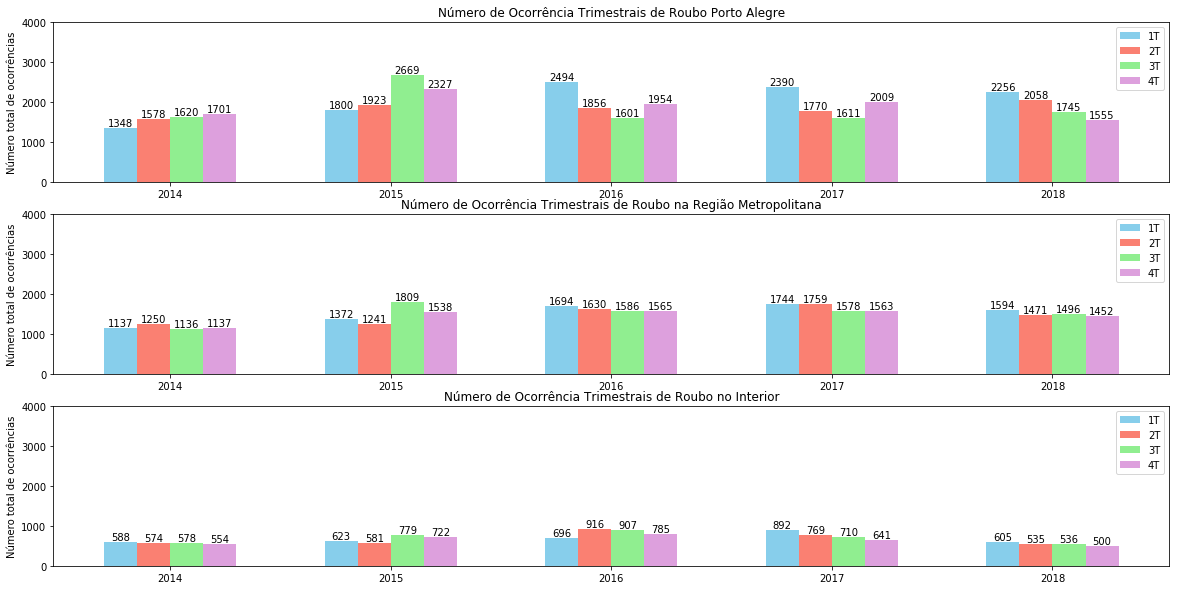

In [44]:
fig, ax = plt.subplots(3,1, figsize=(20,10))
fig.subplots_adjust(hspace=.2)

#POA
#ROUBO
width = 0.15
idx = ret_ocorrences_trim(POA_trimestral, 1, 'Roubo')['year']
ax[0].set(title='Número de Ocorrência Trimestrais de Roubo Porto Alegre', ylabel = 'Número total de ocorrências')
bar1 = ax[0].bar(idx, ret_ocorrences_trim(POA_trimestral, 1, 'Roubo')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[0].bar(idx+width, ret_ocorrences_trim(POA_trimestral, 2, 'Roubo')['ocorrencias'], color='salmon', width = width)
bar3 = ax[0].bar(idx+2*width, ret_ocorrences_trim(POA_trimestral, 3, 'Roubo')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[0].bar(idx+3*width, ret_ocorrences_trim(POA_trimestral, 4, 'Roubo')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY QUARTER
# x = np.concatenate([idx, idx+width, idx+width*2, idx+width*3])
# ax[0].set_xticks(x)
# labels = np.concatenate([['1T','1T','1T','1T','1T'], \
#                          ['2T','2T','2T','2T','2T'], \
#                          ['3T','3T','3T','3T','3T'], \
#                          ['4T','4T','4T','4T','4T']])
# ax[0].set_xticklabels(labels);

### SET LEGENDS BY YEAR
ax[0].set_xticks(idx+1.5*width)
ax[0].set_xticklabels(idx);
ax[0].set_ylim([0,4000])
ax[0].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,0); autolabel(bar2,0); autolabel(bar3,0); autolabel(bar4,0);

#RMP
#ROUBO
width = 0.15
idx = ret_ocorrences_trim(RMP_trimestral, 1, 'Roubo')['year']
ax[1].set(title='Número de Ocorrência Trimestrais de Roubo na Região Metropolitana', ylabel = 'Número total de ocorrências')
bar1 = ax[1].bar(idx, ret_ocorrences_trim(RMP_trimestral, 1, 'Roubo')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[1].bar(idx+width, ret_ocorrences_trim(RMP_trimestral, 2, 'Roubo')['ocorrencias'], color='salmon', width = width)
bar3 = ax[1].bar(idx+2*width, ret_ocorrences_trim(RMP_trimestral, 3, 'Roubo')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[1].bar(idx+3*width, ret_ocorrences_trim(RMP_trimestral, 4, 'Roubo')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY QUARTER
# x = np.concatenate([idx, idx+width, idx+width*2, idx+width*3])
# ax[0].set_xticks(x)
# labels = np.concatenate([['1T','1T','1T','1T','1T'], \
#                          ['2T','2T','2T','2T','2T'], \
#                          ['3T','3T','3T','3T','3T'], \
#                          ['4T','4T','4T','4T','4T']])
# ax[0].set_xticklabels(labels);

### SET LEGENDS BY YEAR
ax[1].set_xticks(idx+1.5*width)
ax[1].set_xticklabels(idx);
ax[1].set_ylim([0,4000])
ax[1].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,1); autolabel(bar2,1); autolabel(bar3,1); autolabel(bar4,1);

#Interior
#ROUBO
width = 0.15
idx = ret_ocorrences_trim(Interior_trimestral, 1, 'Roubo')['year']
ax[2].set(title='Número de Ocorrência Trimestrais de Roubo no Interior', ylabel = 'Número total de ocorrências')
bar1 = ax[2].bar(idx, ret_ocorrences_trim(Interior_trimestral, 1, 'Roubo')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[2].bar(idx+width, ret_ocorrences_trim(Interior_trimestral, 2, 'Roubo')['ocorrencias'], color='salmon', width = width)
bar3 = ax[2].bar(idx+2*width, ret_ocorrences_trim(Interior_trimestral, 3, 'Roubo')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[2].bar(idx+3*width, ret_ocorrences_trim(Interior_trimestral, 4, 'Roubo')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY QUARTER
# x = np.concatenate([idx, idx+width, idx+width*2, idx+width*3])
# ax[0].set_xticks(x)
# labels = np.concatenate([['1T','1T','1T','1T','1T'], \
#                          ['2T','2T','2T','2T','2T'], \
#                          ['3T','3T','3T','3T','3T'], \
#                          ['4T','4T','4T','4T','4T']])
# ax[0].set_xticklabels(labels);

### SET LEGENDS BY YEAR
ax[2].set_xticks(idx+1.5*width)
ax[2].set_xticklabels(idx);
ax[2].set_ylim([0,4000])
ax[2].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,2); autolabel(bar2,2); autolabel(bar3,2); autolabel(bar4,2);
fig.savefig("Graficos/Roubo_Semestral_Regiao.png")

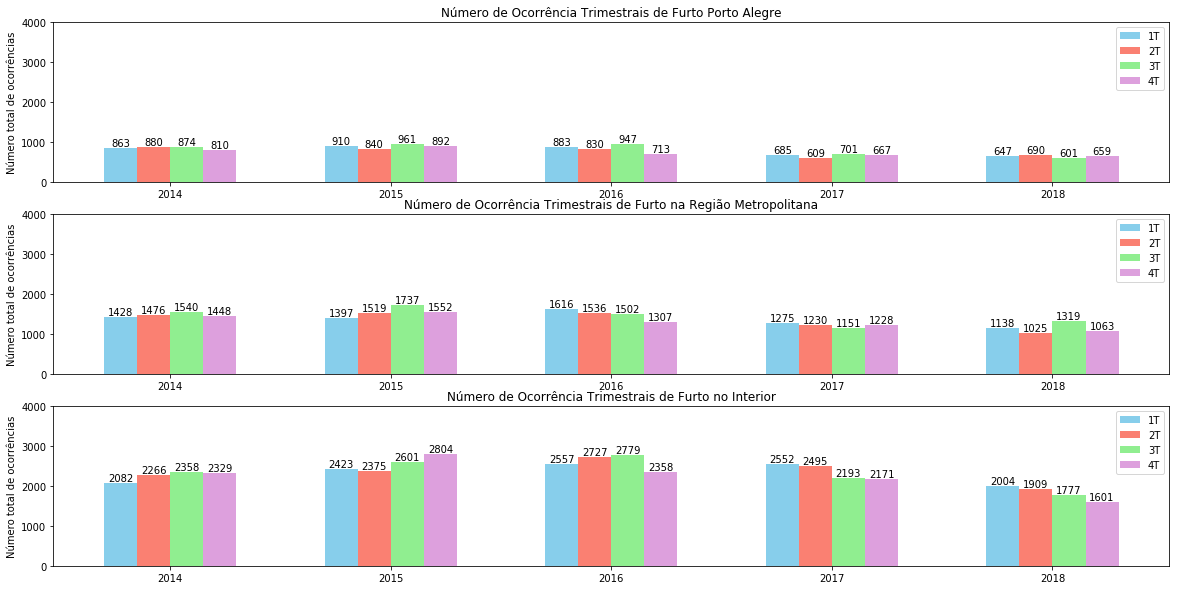

In [45]:
fig, ax = plt.subplots(3,1, figsize=(20,10))
fig.subplots_adjust(hspace=.2)

#FURTO
#POA
width = 0.15
idx = ret_ocorrences_trim(POA_trimestral, 1, 'Furto')['year']
ax[0].set(title='Número de Ocorrência Trimestrais de Furto Porto Alegre', ylabel = 'Número total de ocorrências')
bar1 = ax[0].bar(idx, ret_ocorrences_trim(POA_trimestral, 1, 'Furto')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[0].bar(idx+width, ret_ocorrences_trim(POA_trimestral, 2, 'Furto')['ocorrencias'], color='salmon', width = width)
bar3 = ax[0].bar(idx+2*width, ret_ocorrences_trim(POA_trimestral, 3, 'Furto')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[0].bar(idx+3*width, ret_ocorrences_trim(POA_trimestral, 4, 'Furto')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY YEAR
ax[0].set_xticks(idx+1.5*width)
ax[0].set_xticklabels(idx);
ax[0].set_ylim([0,4000])
ax[0].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,0); autolabel(bar2,0); autolabel(bar3,0); autolabel(bar4,0);

#RMP
width = 0.15
idx = ret_ocorrences_trim(RMP_trimestral, 1, 'Furto')['year']
ax[1].set(title='Número de Ocorrência Trimestrais de Furto na Região Metropolitana', ylabel = 'Número total de ocorrências')
bar1 = ax[1].bar(idx, ret_ocorrences_trim(RMP_trimestral, 1, 'Furto')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[1].bar(idx+width, ret_ocorrences_trim(RMP_trimestral, 2, 'Furto')['ocorrencias'], color='salmon', width = width)
bar3 = ax[1].bar(idx+2*width, ret_ocorrences_trim(RMP_trimestral, 3, 'Furto')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[1].bar(idx+3*width, ret_ocorrences_trim(RMP_trimestral, 4, 'Furto')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY YEAR
ax[1].set_xticks(idx+1.5*width)
ax[1].set_xticklabels(idx);
ax[1].set_ylim([0,4000])
ax[1].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,1); autolabel(bar2,1); autolabel(bar3,1); autolabel(bar4,1);

#RMP
width = 0.15
idx = ret_ocorrences_trim(Interior_trimestral, 1, 'Furto')['year']
ax[2].set(title='Número de Ocorrência Trimestrais de Furto no Interior', ylabel = 'Número total de ocorrências')
bar1 = ax[2].bar(idx, ret_ocorrences_trim(Interior_trimestral, 1, 'Furto')['ocorrencias'], color='skyblue', width = width)
bar2 = ax[2].bar(idx+width, ret_ocorrences_trim(Interior_trimestral, 2, 'Furto')['ocorrencias'], color='salmon', width = width)
bar3 = ax[2].bar(idx+2*width, ret_ocorrences_trim(Interior_trimestral, 3, 'Furto')['ocorrencias'], color='lightgreen', width = width)
bar4 = ax[2].bar(idx+3*width, ret_ocorrences_trim(Interior_trimestral, 4, 'Furto')['ocorrencias'], color='plum', width = width)

### SET LEGENDS BY YEAR
ax[2].set_xticks(idx+1.5*width)
ax[2].set_xticklabels(idx);
ax[2].set_ylim([0,4000])
ax[2].legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('1T', '2T', '3T', '4T'));

autolabel(bar1,2); autolabel(bar2,2); autolabel(bar3,2); autolabel(bar4,2);
fig.savefig("Graficos/Furto_Semestral_Regiao.png")

## Distribuição Probabilidade de Ocorrência por horário nas Regiões

In [46]:
#Histograma dos ocorrências por horário nas Regiões
Roubo_POA  = POA[POA['Fato'] == 'Roubo']
Furto_POA  = POA[POA['Fato'] == 'Furto']
Roubo_POA['Hora'] = Roubo_POA['Time'].dt.hour
Furto_POA['Hora'] = Furto_POA['Time'].dt.hour

Roubo_RMP  = RMP[RMP['Fato'] == 'Roubo']
Furto_RMP  = RMP[RMP['Fato'] == 'Furto']
Roubo_RMP['Hora'] = Roubo_RMP['Time'].dt.hour
Furto_RMP['Hora'] = Furto_RMP['Time'].dt.hour

Roubo_Interior  = Interior[Interior['Fato'] == 'Roubo']
Furto_Interior  = Interior[Interior['Fato'] == 'Furto']
Roubo_Interior['Hora'] = Roubo_Interior['Time'].dt.hour
Furto_Interior['Hora'] = Furto_Interior['Time'].dt.hour

bins = np.arange(0,24)
bin_w = (max(bins) - min(bins)) / (len(bins))
    
fig, ax = plt.subplots(3,2, figsize=(20,30))
fig.subplots_adjust(hspace=.5)

### POA
ax[0][0].set(title='Porto Alegre - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[0][0].set_xticklabels(np.arange(0,24))
ax[0][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[0][0].hist(Roubo_POA['Hora'], 24, normed=True, histtype='bar', color= ['yellow'], label=['blue'], alpha=0.70, edgecolor='black')

ax[0][1].set(title='Porto Alegre - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[0][1].set_xticklabels(np.arange(0,24))
ax[0][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[0][1].hist(Furto_POA['Hora'], 24, normed=True, histtype='bar', color= ['red'], label= ['blue'], alpha=0.70, edgecolor='black')
# display(Roubo.head())     

### RMP
ax[1][0].set(title='Região Metropolitana - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[1][0].set_xticklabels(np.arange(0,24))
ax[1][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1][0].hist(Roubo_RMP['Hora'], 24, normed=True, histtype='bar', color= ['blue'], label=['blue'], alpha=0.70, edgecolor='black')

ax[1][1].set(title='Região Metropolitana - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[1][1].set_xticklabels(np.arange(0,24))
ax[1][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[1][1].hist(Furto_RMP['Hora'], 24, normed=True, histtype='bar', color= ['green'], label= ['blue'], alpha=0.70, edgecolor='black')

### Interior
ax[2][0].set(title='Interior - Ocorrências de Roubo por Horário', ylabel = 'Probabilidade',  )
ax[2][0].set_xticklabels(np.arange(0,24))
ax[2][0].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[2][0].hist(Roubo_Interior['Hora'], 24, normed=True, histtype='bar', color= ['lightseagreen'], label=['blue'], alpha=0.70, edgecolor='black')

ax[2][1].set(title='Interior - Ocorrências de Furto por Horário', ylabel = 'Probabilidade')
ax[2][1].set_xticklabels(np.arange(0,24))
ax[2][1].set_xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w))
ax[2][1].hist(Furto_Interior['Hora'], 24, normed=True, histtype='bar', color= ['dimgrey'], label= ['blue'], alpha=0.70, edgecolor='black')


fig.savefig("Graficos/Ocorrencia_Horario_Regiao.png")

### Fazer Bairro x Hora POA

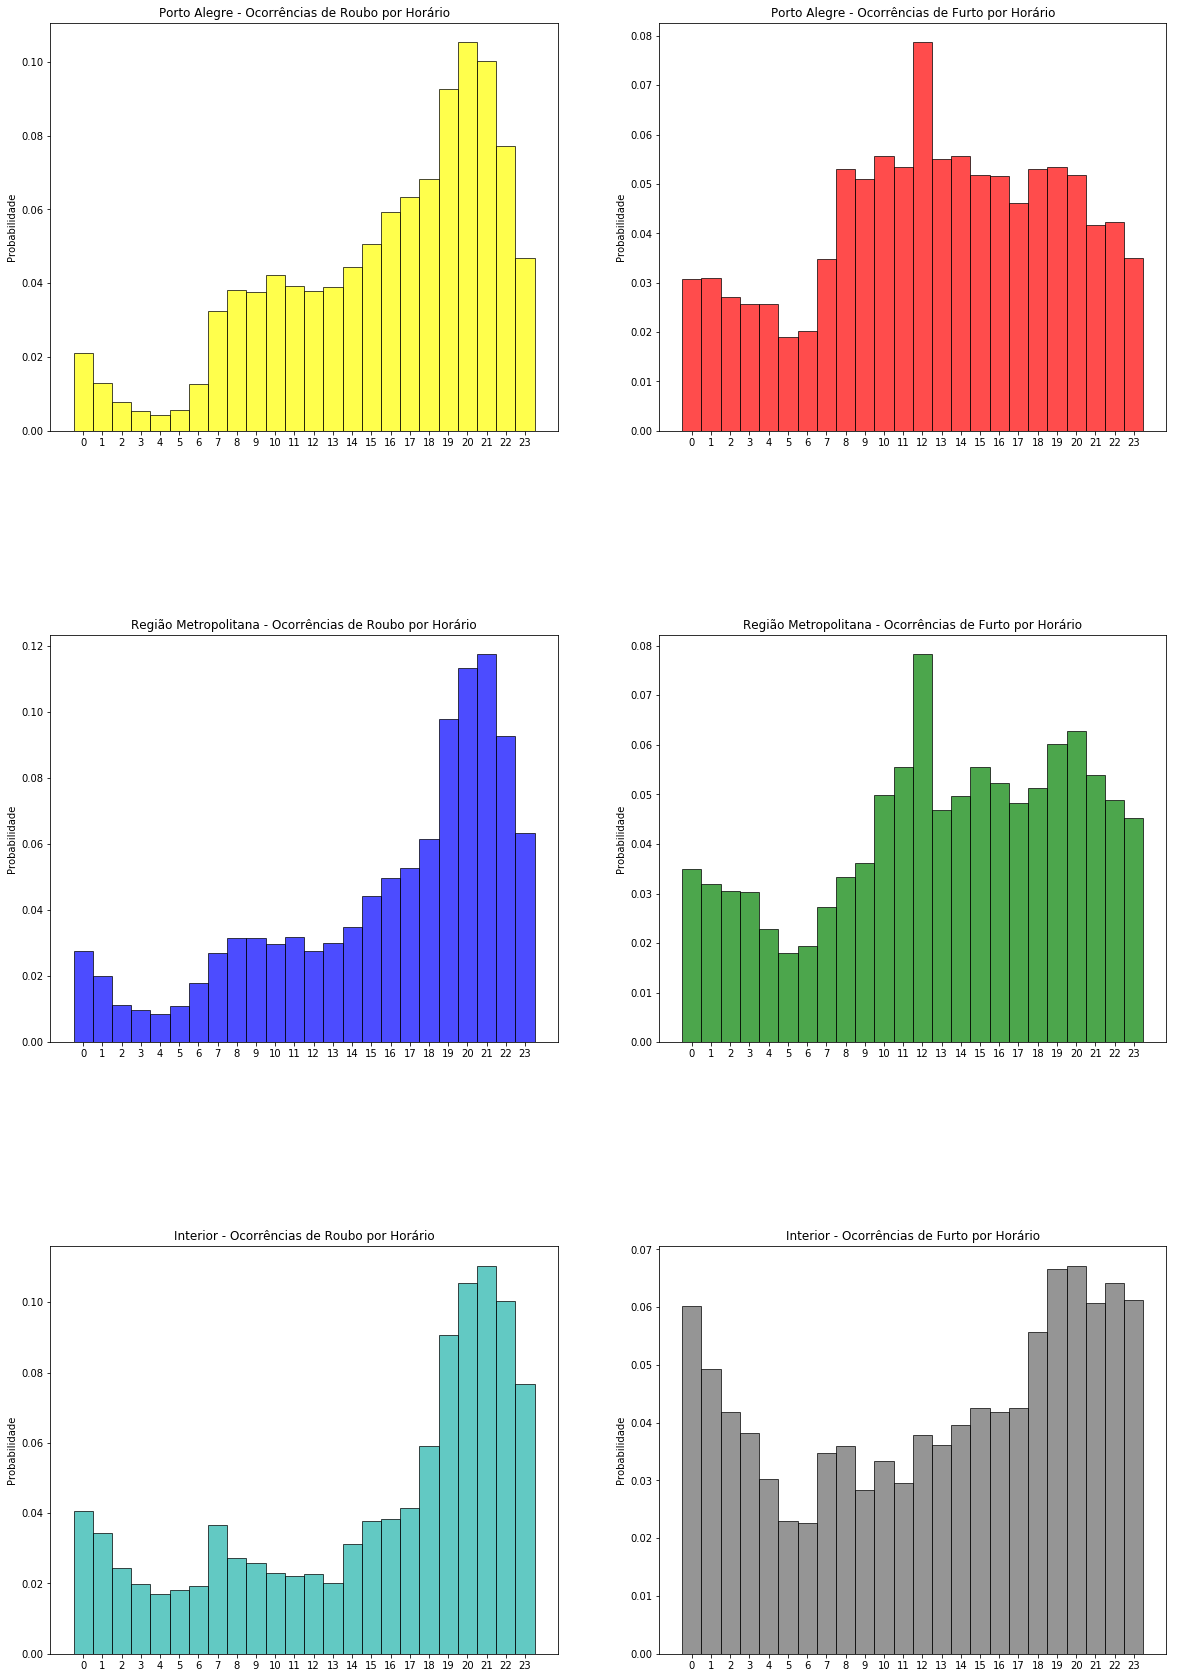